<a href="https://colab.research.google.com/github/joaquinhojman/Entrenamieto_ECI_2020/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
from plotly.offline import iplot

#Como levantar un archivo desde colab? https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#Repositorio: https://github.com/joaquinhojman/Entrenamieto_ECI_2020

# En el read_csv, castear las variables a los tipos que corresponden.
# En el usecols sacar: 
#     * 'Submitted_for_Approval' (Un solo valor: 0)
#     * 'Brand' (Muchos nulos: 15911)
#     * 'Product_Type' (Muchos nulos: 15935)
#     * 'Size' (Muchos nulos: 15967)
#     * 'Product_Category_B' (Muchos nulos: 15928)
#     * 'Price' (Muchos nulos; 15982)
#     * 'Currency' (Muchos nulos: 16052)
#     * 'Last_Activity' (Todos nulos)
#     * 'ASP_(converted)_Currency' (Un solo valor: 'USD')
#     * 'Actual_Delivery_Date' (Todos nulos)
#     * 'Prod_Category_A' (Un solo valor: 'Prod_Category_A_None')

url = 'https://raw.githubusercontent.com/joaquinhojman/Entrenamieto_ECI_2020/main/Entrenamieto_ECI_2020.csv'
df_frio_frio = pd.read_csv(url,\
                 usecols=['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',\
                        'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved',\
                        'Bureaucratic_Code', 'Account_Created_Date', 'Source ', 'Billing_Country',\
                        'Account_Name', 'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No', 'Account_Owner',\
                        'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',\
                        'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',\
                        'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP', 'ASP_(converted)',\
                        'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month', 'Delivery_Quarter',\
                        'Delivery_Year', 'TRF', 'Total_Amount_Currency', 'Total_Amount', 'Total_Taxable_Amount_Currency',\
                        'Total_Taxable_Amount', 'Stage'],\
                  dtype={
                        'Region' : 'category',
                        'Territory' : 'category',
                        'Bureaucratic_Code' : 'category',
                        'Source ' : 'category',
                        'Billing_Country' : 'category',
                        'Account_Name' : 'category',
                        'Opportunity_Name' : 'category',
                        'Account_Owner' : 'category',
                        'Opportunity_Owner' : 'category',
                        'Account_Type' : 'category',
                        'Opportunity_Type' : 'category',
                        'Quote_Type' : 'category',
                        'Delivery_Terms' : 'category',
                        'Last_Modified_By' : 'category',
                        'Product_Family' : 'category',
                        'Product_Name' : 'category',
                        'ASP_Currency' : 'category',
                        'Delivery_Quarter' : 'category',
                        'Total_Amount_Currency' : 'category',
                        'Total_Taxable_Amount_Currency' : 'category',
                        'Stage' : 'category'})
# Dataset is now stored in a Pandas Dataframe

df_frio_frio.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


In [ ]:
#cantidad de columnas de la abse
len(df_frio_frio.columns)

41

In [ ]:
#cantidad de filas de la base
len(df_frio_frio)

16947

In [ ]:
# Sacar espacio del nombre de la columna 'Source'
df_frio_frio.rename(columns={'Source ' : 'Source', 'ASP_(converted)' : 'ASP_(converted_USD)'}, inplace=True)

In [ ]:
# Poner en la columna Month sólo el mes (que no aparezca el año)
df_frio_frio['Month'] = pd.to_datetime(df_frio_frio['Month'], format='%Y - %m').dt.month

In [ ]:
# Pasar la columna 'Sales_Contract_No' a numérico (incluídos los nulos)
df_frio_frio['Sales_Contract_No'] = df_frio_frio['Sales_Contract_No'].replace('None', np.NaN)
df_frio_frio['Sales_Contract_No'] = df_frio_frio['Sales_Contract_No'].astype('float')

In [ ]:
# Pasar las columnas de fechas a formato datetime
formato_fecha = '%m/%d/%Y'
df_frio_frio['Account_Created_Date'] = pd.to_datetime(df_frio_frio['Account_Created_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Opportunity_Created_Date'] = pd.to_datetime(df_frio_frio['Opportunity_Created_Date'], format=formato_fecha) # ver fecha fila 77
df_frio_frio['Quote_Expiry_Date'] = pd.to_datetime(df_frio_frio['Quote_Expiry_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Last_Modified_Date'] = pd.to_datetime(df_frio_frio['Last_Modified_Date'], format=formato_fecha) # ver fecha fila 0
df_frio_frio['Planned_Delivery_Start_Date'] = pd.to_datetime(df_frio_frio['Planned_Delivery_Start_Date'], format=formato_fecha) # ver fechas filas 0 y 1, comparar el mes con month
df_frio_frio['Planned_Delivery_End_Date'] = pd.to_datetime(df_frio_frio['Planned_Delivery_End_Date'], format=formato_fecha) # ver fecha fila 0

Agregamos una columna con el Total_Amount convertido a USD

In [ ]:
# agregamos una columna inicializada en 0 que es donde colocaremos la conversión de Total_Amount
posicion_insercion = df_frio_frio.columns.get_loc('Total_Amount') + 1
df_frio_frio.insert(loc=posicion_insercion, column='USD_Total_Amount', value=0)

In [ ]:
#¿Qué monedas hay en el df?
df_frio_frio['Total_Amount_Currency'].values

['EUR', 'EUR', 'USD', 'USD', 'USD', ..., 'EUR', 'EUR', 'EUR', 'USD', 'USD']
Length: 16947
Categories (5, object): ['AUD', 'EUR', 'GBP', 'JPY', 'USD']

In [ ]:
# Vemos que las monedas son [AUD, EUR, GBP, JPY, USD]
# Vamos a trabajar en Dolares (USD), usando https://themoneyconverter.com/ES/ al 13/10/2020 obtenemos:
change_USD = 1 #1 dolar EEUU = 1 dolar EEUU
change_EUR = 1.1745 #1 euro = 1,1745 dolares EEUU
change_AUD = 0.71601 # 1 dolar australiano = 0.71601 dolar EEUU
change_JPY = 0.0094800 # 1 yen japones = 0,0094800 dolares EEUU
change_GBP = 1.935 # 1 libra esterlina = 1,2935 dolares EEUU
# Suponemos que la moneda de ninguno de estos paises o zonas (Estados Unidos, Japon, La Unión Europea, Gran Bretaña, 
# Australia) tuvo una inflación/deflación suficientemente significativa por lo cual el tipo de cambio utilizado es
# representativo a pesar de haber sufrido ligeras variaciones en los años que aparecen en la tabla.

In [ ]:
#filtramos los datos por moneda
filtro_USD = df_frio_frio['Total_Amount_Currency'] == 'USD'
filtro_EUR = df_frio_frio['Total_Amount_Currency'] == 'EUR'
filtro_AUD = df_frio_frio['Total_Amount_Currency'] == 'AUD'
filtro_JPY = df_frio_frio['Total_Amount_Currency'] == 'JPY'
filtro_GBP = df_frio_frio['Total_Amount_Currency'] == 'GBP'

In [ ]:
df_frio_frio.loc[filtro_USD, 'USD_Total_Amount'] = df_frio_frio.loc[filtro_USD, 'Total_Amount']*change_USD
df_frio_frio.loc[filtro_EUR, 'USD_Total_Amount'] = df_frio_frio.loc[filtro_EUR, 'Total_Amount']*change_EUR
df_frio_frio.loc[filtro_AUD, 'USD_Total_Amount'] = df_frio_frio.loc[filtro_AUD, 'Total_Amount']*change_AUD
df_frio_frio.loc[filtro_JPY, 'USD_Total_Amount'] = df_frio_frio.loc[filtro_JPY, 'Total_Amount']*change_JPY
df_frio_frio.loc[filtro_GBP, 'USD_Total_Amount'] = df_frio_frio.loc[filtro_GBP, 'Total_Amount']*change_GBP

In [ ]:
#Estadísticas de la base
df_frio_frio.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Opportunity_ID,Sales_Contract_No,ASP,ASP_(converted_USD),Month,Delivery_Year,TRF,Total_Amount,USD_Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,9974.000000,13738.000000,13738.000000,16947.000000,16947.000000,16947.000000,1.688800e+04,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,5335.940225,2725.414979,7.012128,0.432554,6.400897,2017.137428,2.338172,1.993659e+06,1.008566e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,3324.723809,1569.252469,18.858359,0.758659,3.379323,0.829603,12.169339,1.848426e+07,5.858269e+06,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,2448.500000,1396.500000,0.360000,0.373260,3.000000,2016.000000,0.000000,2.677500e+04,4.536000e+03,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,5306.000000,2801.500000,0.400000,0.412850,6.000000,2017.000000,0.000000,1.072500e+05,7.808001e+04,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,7698.000000,4009.000000,0.505000,0.476490,9.000000,2018.000000,1.000000,4.603898e+05,2.914321e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,12803.000000,6517.000000,80.000000,67.000000,12.000000,2020.000000,500.000000,1.320000e+09,3.150001e+08,1.356339e+09


In [ ]:
#información sobre las columnas de la base
df_frio_frio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Bureaucratic_Code                   16947 non-null  category      
 8   Account_Created_Date                16947 non-null  datetime64[ns]
 9   Source                              16947 non-null  category      
 10  Billing_Country       

Primero tendremos una aproximación a la variable Stage, viendo qué cantidad de oportunidades hay de cada una.

In [ ]:
# Aproximación a la variable Stage
cant_de_cada_stage = df_frio_frio.groupby('Opportunity_ID').agg({'Stage' : 'value_counts'})
cant_de_cada_stage.columns = ['Cant_productos']
cant_de_cada_stage.reset_index(inplace=True)
cant_de_cada_stage = cant_de_cada_stage.groupby('Stage').agg({'Opportunity_ID' : 'count'})
cant_de_cada_stage

# El gráfico se encuentra en: https://infogram.com/cant-oport-por-stage-1hzj4o31jenpp4p?live

,Opportunity_ID
Stage,
Closed Lost,4719
Closed Won,5072
Negotiation,11
Proposal,30
Qualification,9


In [ ]:
# Nos interesa ver la distribución de las ventas exitosas y fallidas en el tiempo
# empiezo con las ventas exitosas
df_exito = df_frio_frio[['Stage','Planned_Delivery_Start_Date']] # dejo solo las columas que me interesan
df_exito = df_exito[df_exito['Stage'] == 'Closed Won']  # dejo solo los closed won
df_exito

,Stage,Planned_Delivery_Start_Date
1,Closed Won,2016-01-18
2,Closed Won,2016-01-25
7,Closed Won,2016-01-25
23,Closed Won,2016-01-09
63,Closed Won,2016-01-18
...,...,...
16937,Closed Won,2016-02-01
16939,Closed Won,2016-04-01
16942,Closed Won,2016-03-21
16943,Closed Won,2016-04-04


Text(0, 0.5, 'Densidad')

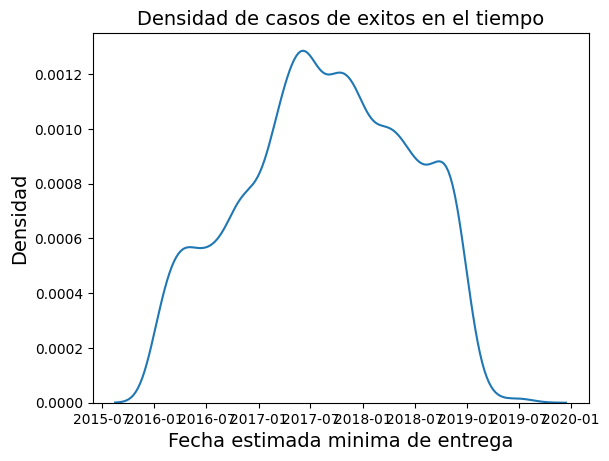

In [ ]:
#Grafico los exitos en el tiempo

g = sns.kdeplot(df_exito["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de exitos en el tiempo", fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

In [ ]:
#Ahora buscamos ver las ventas fallidas en función del tiempo
df_fracaso = df_frio_frio[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_fracaso = df_fracaso[df_fracaso['Stage'] == 'Closed Lost']  #dejo solo los closed won
df_fracaso

,Stage,Planned_Delivery_Start_Date
0,Closed Lost,2016-05-01
3,Closed Lost,2018-02-01
4,Closed Lost,2018-02-01
5,Closed Lost,2018-02-01
6,Closed Lost,2017-02-01
...,...,...
16938,Closed Lost,2016-08-15
16940,Closed Lost,2016-10-03
16941,Closed Lost,2016-10-03
16945,Closed Lost,2016-04-25


Text(0, 0.5, 'Densidad')

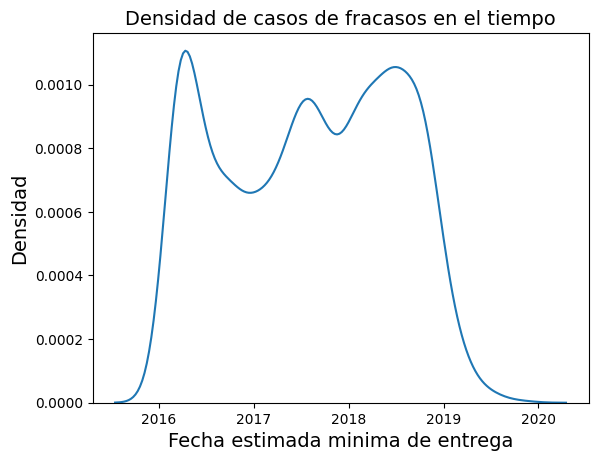

In [ ]:
#Gráfico de los fracasos en el tiempo

g = sns.kdeplot(df_fracaso["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de fracasos en el tiempo", fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

Ahora ubicaremos las regiones en un mapa mundial.

El gráfico de eso se encuentra en: https://infogram.com/mapa-de-regiones-1hkv2nz3j55xp2x?live

Exploraremos cómo se distribuyen los éxitos y los fracasos según cada Region.

In [ ]:
#Exploraremos cómo se distribuyen los éxitos por cada Region.

df_region = df_frio_frio[['Stage','Region']] #dejamos solo las columas que me interesan

exitos_region = df_region[df_region['Stage'] == 'Closed Won']  #dejamos sólo los closed won
exitos_region = exitos_region.groupby('Region').size() 
exitos_region

Region
APAC           1896
Americas       1793
EMEA           2471
Japan          3323
Middle East      50
dtype: int64

Text(0, 0.5, 'Cantidad éxitos')

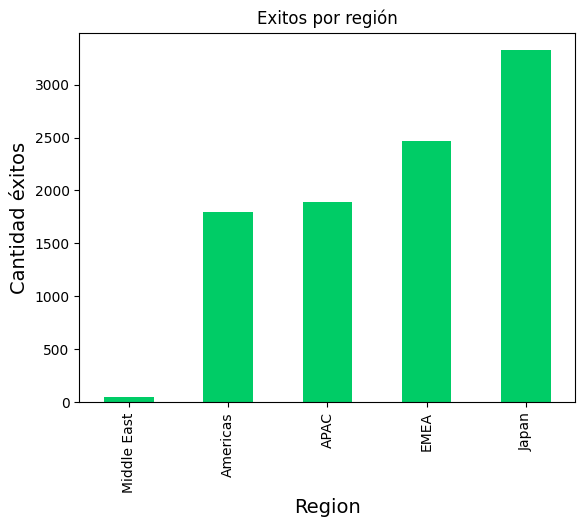

In [ ]:
g = exitos_region.nsmallest().plot.bar(color='#00cc66')
g.set_title("Exitos por región")
g.set_xlabel("Region", fontsize=14)
g.set_ylabel("Cantidad éxitos", fontsize=14)


In [ ]:
#Ahora hacemos lo mismo pero con los fracasos por cada Region.

fracasos_region = df_region[df_region['Stage'] == 'Closed Lost']  #dejamos sólo los closed lost
fracasos_region = fracasos_region.groupby('Region').size() 
fracasos_region

Region
APAC           1355
Americas       2140
EMEA           2189
Japan          1546
Middle East     120
dtype: int64

Text(0, 0.5, 'Cantidad fracasos')

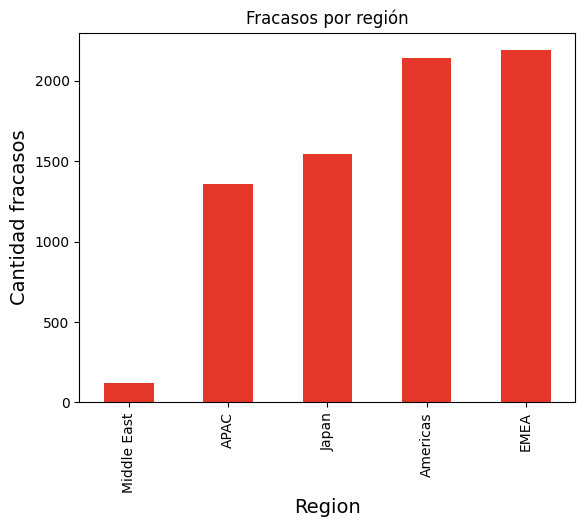

In [ ]:
g = fracasos_region.nsmallest().plot.bar(color='#e53729')
g.set_title("Fracasos por región")
g.set_xlabel("Region", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)


In [ ]:
exitos_fracasos_region = df_region[(df_region['Stage'] == 'Closed Won') | (df_region['Stage'] == 'Closed Lost')]
exitos_fracasos_region.groupby('Region').agg({'Stage' : 'value_counts'}).unstack()

Stage           
Stage       Closed Lost Closed Won
Region                            
APAC               1355       1896
Americas           2140       1793
EMEA               2189       2471
Japan              1546       3323
Middle East         120         50

Gráfico de lo anterior (con barras stackeadas): https://infogram.com/exitos-y-fracasos-por-region-1hkv2nz3j3qrp2x?live

Por los gráficos anteriores se puede ver que sólo en Japón se presentan más oportunidades ganadas y perdidas que en el resto de las regiones (que son conjuntos de países)

Por lo tanto a continuación se realiza un análisis sobre la región de Japón


Link de gráficos de Japón: https://infogram.com/japon-1hkv2nz3jz15n2x?live

In [ ]:
# obtenemos los datos que queremos de japon
japon = df_frio_frio.loc[df_frio_frio['Region'] == 'Japan', ['Stage', 'Opportunity_ID', 'Account_Name', 'Product_Name', 'USD_Total_Amount']]

In [ ]:
# Ahora vemos los estados de cada producto vendido en Japón (registos en general, NO agrupado por oportunidad)
estado_ventas_japon = japon['Stage'].value_counts()
estado_ventas_japon

# El gráfico de esto es el 1ero del link de Japón

Closed Won       3323
Closed Lost      1546
Proposal           14
Qualification       8
Negotiation         1
Name: Stage, dtype: int64

In [ ]:
# vemos la cantidad de oportunidades que maneja japon y sus estados (Stage)
estado_oportunidades_japon = japon.groupby('Opportunity_ID').agg({'Stage' : 'value_counts'})
estado_oportunidades_japon.columns = ['Cantidad_productos_de_la_oportunidad']
estado_oportunidades_japon.reset_index(inplace=True)
estado_oportunidades_japon.groupby('Stage').agg({'Opportunity_ID' : 'count'})

# El gráfico de esto es el 2do del link de Japón

,Opportunity_ID
Stage,
Closed Lost,595
Closed Won,1290
Negotiation,1
Proposal,13
Qualification,7


In [ ]:
# Ahora vemos la cantidad de clientes en Japón
cant_total_clientes_japon = len(japon['Account_Name'].unique())
cant_clientes_closed_won_japon = len(japon[japon['Stage'] == 'Closed Won']['Account_Name'].unique())
print("Cantidad total de clientes de Japón: ", cant_total_clientes_japon)
print("Cantidad de clientes con oportunidades Closed Won de Japón: ", cant_clientes_closed_won_japon)

# El gráfico de esto es el 3ero del link de Japón

Cantidad total de clientes de Japón:  96
Cantidad de clientes con oportunidades Closed Won de Japón:  58


In [ ]:
# Ahora calcularemos el promedio de gasto por cliente en Japón (teniendo en cuenta sólo los clientes cuyas oportunidades son Closed Won)
montos_oportunidades_won_japon = japon[japon['Stage'] == 'Closed Won']['USD_Total_Amount']
promedio_gasto_clientes_de_japon = montos_oportunidades_won_japon.sum() / cant_clientes_closed_won_japon
promedio_gasto_clientes_de_japon

2085818.3235551724

In [ ]:
# Ahora buscaremos el top 5 de productos más vendidos en Japón
top5_productos_japon = japon[japon['Stage'] == 'Closed Won']['Product_Name'].value_counts().nlargest(5)
top5_productos_japon

# El gráfico de esto es el 4to del link de Japón

Product_Name_491    351
Product_Name_4      307
Product_Name_495    279
Product_Name_100    279
Product_Name_20     246
Name: Product_Name, dtype: int64

Acá termina el análisis a Japón

In [ ]:
#Nos interesa saber si el precio es un factor determinante a la hora de cerrar una venta.
#Para eso analizaremos como se distribuyen los exitos y los fracasos en función de la variación de precio.


In [ ]:
df_changed = df_frio_frio.loc[:, ['Stage', 'Opportunity_ID', 'USD_Total_Amount']]
df_changed_exitos = df_changed[df_changed['Stage'] == 'Closed Won']
agrupado_por_op_ID = df_changed_exitos.groupby('Opportunity_ID').agg({'USD_Total_Amount' : 'sum'})
agrupado_por_op_ID = agrupado_por_op_ID.reset_index()

In [ ]:
agrupado_por_total_amount = agrupado_por_op_ID.groupby('USD_Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount = agrupado_por_total_amount.reset_index()
agrupado_por_total_amount

,USD_Total_Amount,Cantidad_de_ventas_por_precio
0,0.000000e+00,5
1,1.761750e-01,1
2,9.954000e+00,1
3,4.171200e+01,2
4,5.688000e+01,8
...,...,...
3971,2.362878e+07,1
3972,2.454489e+07,1
3973,3.105361e+07,1
3974,4.183522e+07,1


Text(0, 0.5, 'Ventas exitosas')

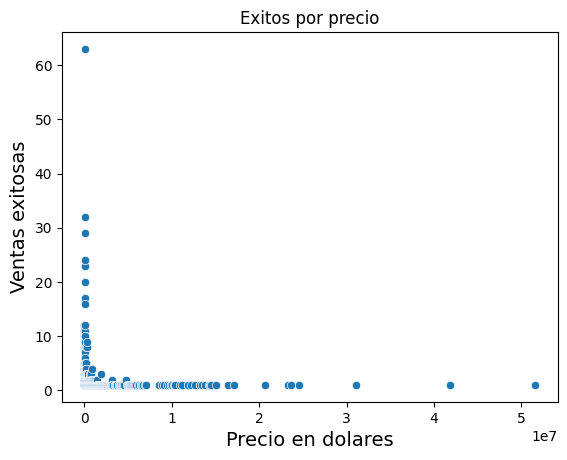

In [ ]:
# Finalmente obvtuvimos un data frame con los precios en dolares y el estado final de la ventas
# Ahora podemos observar si los precios mas altos tienen mas ventas fallidas.
# Primero graficamos las ventas exitosas y despues veremos las fallidas

# sns.set(rc={'figure.figsize':(11.7,8.27)})  #para cambiar el tamaño de los gráficos de seaborn. No lo hagan porque no queda bien la escala

g = sns.scatterplot(x="USD_Total_Amount", y="Cantidad_de_ventas_por_precio", data=agrupado_por_total_amount, sizes=(80, 400))
g.set_title("Exitos por precio")
g.set_xlabel("Precio en dolares", fontsize=14)
g.set_ylabel("Ventas exitosas", fontsize=14)

In [ ]:
df_changed[df_changed['Stage'] == 'Closed Won']

,Stage,Opportunity_ID,USD_Total_Amount
1,Closed Won,1,5.664614e+04
2,Closed Won,2,8.386560e+04
7,Closed Won,7,5.068800e+04
23,Closed Won,11,1.621851e+06
63,Closed Won,20,1.213846e+05
...,...,...,...
16937,Closed Won,12797,4.855383e+05
16939,Closed Won,12799,4.717967e+05
16942,Closed Won,12801,1.213846e+05
16943,Closed Won,12801,1.092461e+05


Text(0, 0.5, 'Ventas fracasadas')

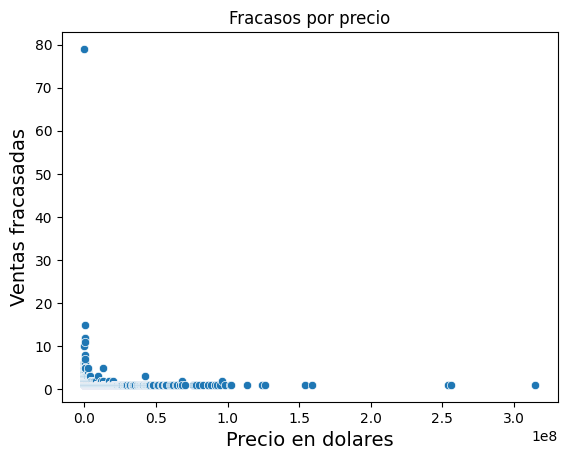

In [ ]:
#Ahora veremos las fallidas

precio_fracaso = df_changed[df_changed['Stage'] == 'Closed Lost']  #dejo solo los closed lost
agrupado_por_op_ID = precio_fracaso.groupby('Opportunity_ID').agg({'USD_Total_Amount' : 'sum'})
agrupado_por_op_ID = agrupado_por_op_ID.reset_index()

agrupado_por_total_amount = agrupado_por_op_ID.groupby('USD_Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount = agrupado_por_total_amount.reset_index()
agrupado_por_total_amount

#g = sns.scatterplot(x="ID", y="Total_Amount", data=precio_fracaso, color="Red")
#g.set_title("Fracaso por precio")
#g.set_xlabel("Ventas Fracasadas",fontsize=14)
#g.set_ylabel("Precio en dolares",fontsize=14)

g = sns.scatterplot(x="USD_Total_Amount", y="Cantidad_de_ventas_por_precio", data=agrupado_por_total_amount, sizes=(80, 400))
g.set_title("Fracasos por precio")
g.set_xlabel("Precio en dolares",fontsize=14)
g.set_ylabel("Ventas fracasadas",fontsize=14)

Se analizara la cantidad de ventas por rango de precios

In [ ]:
df_changed_exitos = df_changed[df_changed['Stage'] == 'Closed Won']
agrupado_por_op_ID_won = df_changed_exitos.groupby('Opportunity_ID').agg({'USD_Total_Amount' : 'sum'})
agrupado_por_op_ID_won = agrupado_por_op_ID_won.reset_index()

In [ ]:
agrupado_por_total_amount_won = agrupado_por_op_ID_won.groupby('USD_Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount_won.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount_won = agrupado_por_total_amount_won.reset_index()

In [ ]:
bins_won = pd.cut(agrupado_por_total_amount_won['USD_Total_Amount'], [-0.1, 1000,100000,500000,1000000,10000000,1000000000])

In [ ]:
cantidad_por_rango_won = agrupado_por_total_amount_won.groupby(bins_won)['Cantidad_de_ventas_por_precio'].agg(['sum'])\
.rename(columns={'sum':'Cantidad_Won'})
cantidad_por_rango_won

,Cantidad_Won
USD_Total_Amount,
"(-0.1, 1000.0]",130
"(1000.0, 100000.0]",2944
"(100000.0, 500000.0]",1527
"(500000.0, 1000000.0]",234
"(1000000.0, 10000000.0]",210
"(10000000.0, 1000000000.0]",27


In [ ]:
precio_fracaso = df_changed[df_changed['Stage'] == 'Closed Lost']  #dejo solo los closed lost
agrupado_por_op_ID_lost = precio_fracaso.groupby('Opportunity_ID').agg({'USD_Total_Amount' : 'sum'})
agrupado_por_op_ID_lost = agrupado_por_op_ID_lost.reset_index()

agrupado_por_total_amount_lost = agrupado_por_op_ID_lost.groupby('USD_Total_Amount').agg({'Opportunity_ID' : 'count'})
agrupado_por_total_amount_lost.columns = ['Cantidad_de_ventas_por_precio']
agrupado_por_total_amount_lost = agrupado_por_total_amount_lost.reset_index()

In [ ]:
bins_lost = pd.cut(agrupado_por_total_amount_lost['USD_Total_Amount'], [-0.1, 1000,100000,500000,1000000,10000000,1000000000])

In [ ]:
cantidad_por_rango_lost = agrupado_por_total_amount_lost.groupby(bins_lost)['Cantidad_de_ventas_por_precio'].agg(['sum'])\
.rename(columns={'sum':'Cantidad_Lost'})
cantidad_por_rango_lost

,Cantidad_Lost
USD_Total_Amount,
"(-0.1, 1000.0]",100
"(1000.0, 100000.0]",1049
"(100000.0, 500000.0]",1530
"(500000.0, 1000000.0]",527
"(1000000.0, 10000000.0]",1177
"(10000000.0, 1000000000.0]",336


In [ ]:
cantidad_por_rango_both = pd.merge(cantidad_por_rango_won, cantidad_por_rango_lost, on='USD_Total_Amount')
cantidad_por_rango_both['Win_Percentage'] = cantidad_por_rango_both['Cantidad_Won']/(cantidad_por_rango_both['Cantidad_Won']+cantidad_por_rango_both['Cantidad_Lost'])*100
cantidad_por_rango_both = cantidad_por_rango_both.reset_index()
cantidad_por_rango_both

,USD_Total_Amount,Cantidad_Won,Cantidad_Lost,Win_Percentage
0,"(-0.1, 1000.0]",130,100,56.521739
1,"(1000.0, 100000.0]",2944,1049,73.729026
2,"(100000.0, 500000.0]",1527,1530,49.950932
3,"(500000.0, 1000000.0]",234,527,30.749014
4,"(1000000.0, 10000000.0]",210,1177,15.140591
5,"(10000000.0, 1000000000.0]",27,336,7.438017


Text(0, 0.5, 'Intervalo de Monto')

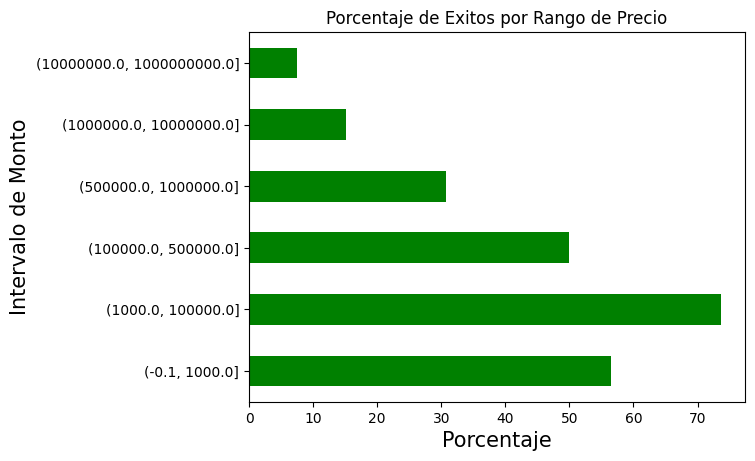

In [ ]:
ax = cantidad_por_rango_both.plot.barh(x='USD_Total_Amount', y='Win_Percentage', color='green', title='Porcentaje de Exitos por Rango de Precio',legend=False)
ax.set_xlabel("Porcentaje", fontsize = 15)
ax.set_ylabel("Intervalo de Monto", fontsize = 15)

In [ ]:
#Los graficos observados no son concluyentes, el exito de la venta no parece depender del precio.

In [ ]:
# Ver relación entre 'TRF' y 'Product_Name'
relacion_producto_potencia = df_frio_frio.groupby('Product_Name').agg({'TRF' : 'value_counts'})
relacion_producto_potencia = relacion_producto_potencia.unstack()   # en el índice queda solo el nombre del producto
aparece_cada_prod_una_vez = relacion_producto_potencia.index.is_unique
aparece_cada_prod_una_vez

True

In [ ]:
df_frio_frio.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted_USD),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,USD_Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,NaN,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,2016-05-01,2016-06-30,5,Q2,2016,10,EUR,5272800.0,6.192904e+06,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39.0,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,2016-01-18,2016-01-20,1,Q1,2016,0,EUR,48230.0,5.664614e+04,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760.0,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,2016-01-25,2016-01-25,1,Q1,2016,0,USD,83865.6,8.386560e+04,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-03-31,2,Q1,2018,14,USD,7421881.5,7.421882e+06,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,NaN,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-02-28,2,Q1,2018,25,USD,13357192.5,1.335719e+07,USD,13357192.5,Closed Lost


Nos interesa saber como estan relacionados el precio de un producto y su potencia. Ademas veremos algunos detalles particulares sobre la potencia de los productos mediante una serie de graficos y calculos.

In [ ]:

potenciaXprecio = df_frio_frio[['TRF','USD_Total_Amount']].rename(columns={'TRF': 'Total_Power'}) #Potencia por precio 
potenciaXprecio 

,Total_Power,USD_Total_Amount
0,10,6.192904e+06
1,0,5.664614e+04
2,0,8.386560e+04
3,14,7.421882e+06
4,25,1.335719e+07
...,...,...
16942,0,1.213846e+05
16943,0,1.092461e+05
16944,0,1.213846e+05
16945,4,2.346797e+06


In [ ]:
#Notamos que hay muchas filas que tienen potencia cero
#No suponemos esto un error, sino que se trata de productos en los que la potencia no aplica.
#Por ejemplo: Un aire acondicionado tiene potencia, un soporte para ponerlo en la pared no la tiene.
#Nos interesan todas las ventas de la empresa, por lo tanto no removemos aquellas sin potencia.

#Antes de graficar, hacemos algunos analisis de la potencia

max(potenciaXprecio['Total_Power']) #Potencia Maxima

500

In [ ]:
min(potenciaXprecio['Total_Power']) #Potencia Minima

0

In [ ]:
(potenciaXprecio['Total_Power']).count() #cantidad de potencias, vemos que no hay nulos

16947

In [ ]:
sum(potenciaXprecio['Total_Power'])/(potenciaXprecio['Total_Power']).count() #promedio de potencia

2.3381719478373753

Text(0, 0.5, 'Precio total')

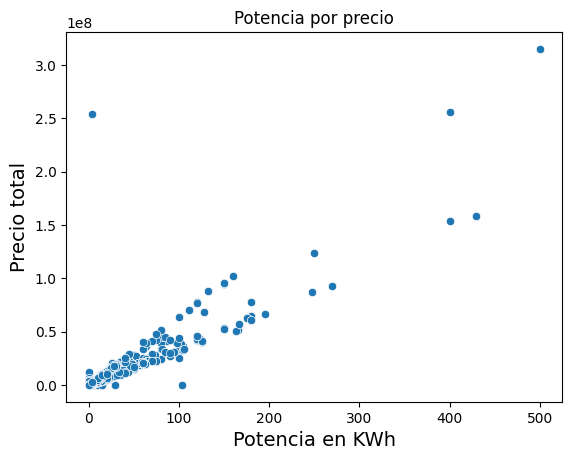

In [ ]:
#Graficamos en un scatter plot la potencia por precio

g = sns.scatterplot(x="Total_Power", y="USD_Total_Amount", data=potenciaXprecio, sizes=(800, 700))
g.set_title("Potencia por precio")
g.set_xlabel("Potencia en KWh", fontsize=14)
g.set_ylabel("Precio total", fontsize=14)

### De esta visualización podemos inferir que en lineas generales, los productos aumentan su precio segun la potencia. Es decir a mayor potencia, mayor precio. Tambien vemos que la mayor cantidad de ventas se agrupan en torno a una potencia de hasta 200 KWh, siendo su punto de mayor densidad el de 0 KWh. El aumento visualizado es practicamente lineal.
### Sin embargo tambien notamos ciertos productos de relativa baja potencia con precios muy altos. Analizaremos luego este caso, para ver que esta ocurriendo.


In [ ]:
#Antes nos interesaria saber algunos datos solamente de los productos que tienen potencia. Para ello removemos los productos
#con potencia 0

filtro_potencia = potenciaXprecio['Total_Power'] > 0
potenciaXprecio_sinceros = potenciaXprecio[filtro_potencia]
potenciaXprecio_sinceros

,Total_Power,USD_Total_Amount
0,10,6192903.60
3,14,7421881.50
4,25,13357192.50
5,28,14838277.50
6,7,2659494.60
...,...,...
16939,1,471796.65
16940,20,10751580.00
16941,20,10580920.00
16945,4,2346796.88


In [ ]:
min(potenciaXprecio_sinceros['Total_Power']) #Potencia Minima

1

In [ ]:
(potenciaXprecio_sinceros['Total_Power']).count() #Cantidad de elementos 

4976

In [ ]:
#Cantidad de productos con potencia 0
(potenciaXprecio['Total_Power']).count() - (potenciaXprecio_sinceros['Total_Power']).count()

11971

In [ ]:
#promedio de potencias distintas de cero
sum(potenciaXprecio_sinceros['Total_Power'])/(potenciaXprecio_sinceros['Total_Power']).count() 

7.96322347266881

### Lógicamente, y como esperabamos, el promedio de potencia sube cuando removemos las potencias iguales a cero. Notamos que tan solo cerca de 1/3 de los productos tienen una potencia asociada.

In [ ]:
#Notamos de la grafica anterior que la mayoria de los productos se nuclean en potencias menores a 100KWh
#Queremos ver cuantos de estos productos tienen esa caracteristica

filtro0_100 = potenciaXprecio_sinceros['Total_Power'] < 100 
potencias0_100 = potenciaXprecio_sinceros[filtro0_100]['Total_Power']
potencias0_100.count()

4925

In [ ]:
#Es decir que aquellos productos con potencias mayores a 100 son (dentro de los que tienen potencia):
(potenciaXprecio_sinceros['Total_Power']).count() - potencias0_100.count()

51

In [ ]:
#Vemos que casi todos los productos con potencia la tienen entre 0-100. Queremos ver dentro de ese rango como
#se distribuye la potencia

potencias0_100

0        10
3        14
4        25
5        28
6         7
         ..
16939     1
16940    20
16941    20
16945     4
16946    40
Name: Total_Power, Length: 4925, dtype: int64

Text(0, 0.5, 'Densidad')

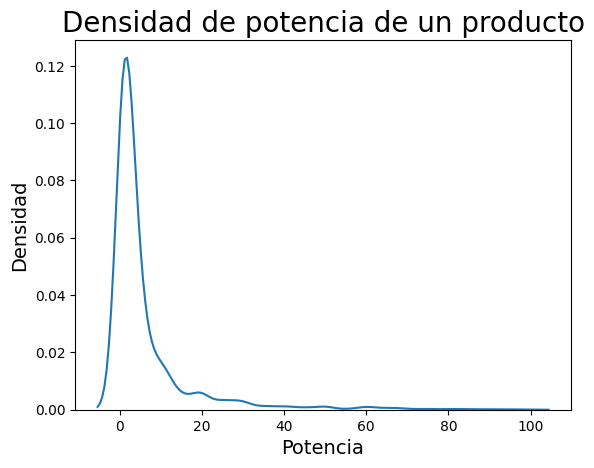

In [ ]:
g = sns.kdeplot(potencias0_100)
g.set_title("Densidad de potencia de un producto", fontsize=20)
g.set_xlabel("Potencia", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

### De este nuevo gráfico inferimos lo esperado: la mayor densidad de potencias, el 25%, se agrupan en torno al cero, es decir con baja potencia cercana al cero. Recordemos que habiamos quitado las potencias cero para este análisis.
### ¿Por qué esperabamos este resultado? Porque cuando calculamos el promedio, éste nos había dado aproximadamente 7, es decir bastante más cercano al 0 que al 500, que era la potencia máxima.

Text(0, 0.5, 'Densidad')

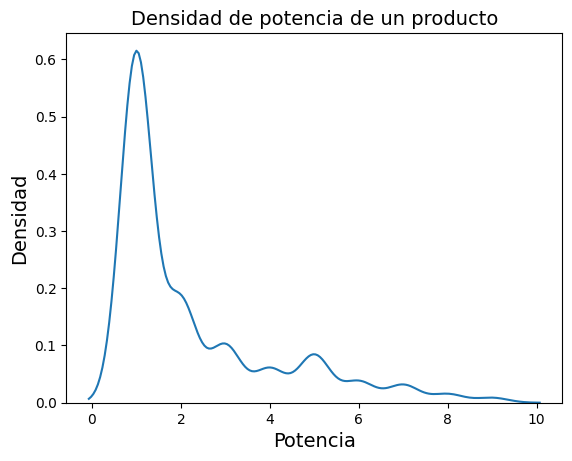

In [ ]:
#Mostraremos una nueva medición, muy parecida a la anterior pero solo para las potencias entre 0 y 10:

filtro0_10 = potenciaXprecio_sinceros['Total_Power'] < 10
potencias0_10 = potenciaXprecio_sinceros[filtro0_10]['Total_Power']

g = sns.kdeplot(potencias0_10)
g.set_title("Densidad de potencia de un producto", fontsize=14)
g.set_xlabel("Potencia", fontsize=14)
g.set_ylabel("Densidad", fontsize=14)

### De este grafico mucho mas pequeño en escala, vemos que el 70% de las potencias toma como valor 1KWh, concluyendo asi que la mayoria de los productos tienen una potencia baja. 

In [ ]:
# Cuantos productos tienen potencia 1KWh? (Agrupamos las potencias decimales entre 0 y 2)

filtro1 = (potenciaXprecio_sinceros['Total_Power'] > 0)& (potenciaXprecio_sinceros['Total_Power'] < 2)
potencias1 = potenciaXprecio_sinceros[filtro1]['Total_Power'].count()
potencias1

2192

### La cantidad total de productos con potencia era 4976, y los que tienen potencia 1 son 2912. Es facil notar que mas de la mitad de los productos con potencias distintas de cero tinen potencia = 1KWh

### En el grafico de potencias por precio presentado mas arriba, habiamos notamos ciertos productos de relativa baja potencia con precios muy altos. Queremos visualizar los datos mas detalladamente para ver si notamos alguna irregularidad.
### Notamos que estas irregularidades parecen estar bajo potencias menores a 100KWh

In [ ]:
#Removemos los datos que no nos interesan
filtro100 = potenciaXprecio['Total_Power'] < 100 
potenciasXprecio100 = potenciaXprecio[filtro100]
potenciasXprecio100

,Total_Power,USD_Total_Amount
0,10,6.192904e+06
1,0,5.664614e+04
2,0,8.386560e+04
3,14,7.421882e+06
4,25,1.335719e+07
...,...,...
16942,0,1.213846e+05
16943,0,1.092461e+05
16944,0,1.213846e+05
16945,4,2.346797e+06


In [ ]:
potenciasXprecio100.nlargest(20,'USD_Total_Amount')

,Total_Power,USD_Total_Amount
2179,4,2.539739e+08
16390,80,5.138560e+07
16432,75,4.762595e+07
2791,82,4.537418e+07
9814,84,4.452000e+07
2957,75,4.232428e+07
12633,90,4.230282e+07
2997,70,4.129996e+07
598,87,4.087753e+07
16699,60,4.019869e+07


### A simple vista, no notamos ninguna irregularidad con estos valores. Sin mas detalles acerca del producto, no podemos decidir si estos datos son erroneos o acertados.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1854f92b00>,
      dtype=object)

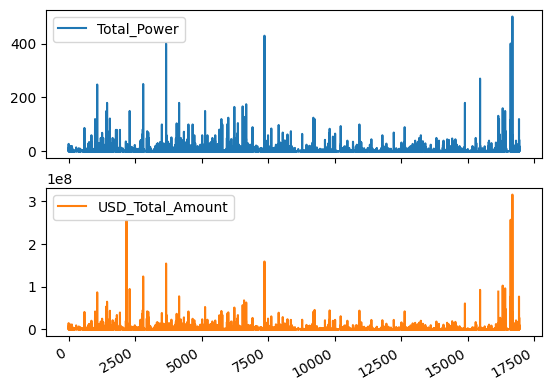

In [ ]:
#Adicionalmente agregamos otra grafica donde se ve la relacion entre el precio y la potencia del producto.
#Nuevamente observamos que en lineas generales el precio crece cuando sube la potencia.

potenciaXprecio.plot.line(subplots=True)

### Nos interesa ahora analizar el comportamiento de los vendedores de la empresa en cuanto al estado de las ventas en las que participaron. Queremos ciertos datos como "quien vendio mas", "quien vendio menos", etc.

In [ ]:
vendedoresXstage = df_frio_frio[['Opportunity_Owner','Stage']].rename(columns={'Opportunity_Owner':'Vendedor'})
vendedoresXstage

,Vendedor,Stage
0,Person_Name_18,Closed Lost
1,Person_Name_20,Closed Won
2,Person_Name_8,Closed Won
3,Person_Name_8,Closed Lost
4,Person_Name_8,Closed Lost
...,...,...
16942,Person_Name_13,Closed Won
16943,Person_Name_13,Closed Won
16944,Person_Name_13,Closed Won
16945,Person_Name_3,Closed Lost


In [ ]:
#¿Cuantos vendedores tiene la empresa?
len(vendedoresXstage['Vendedor'].value_counts())


53

In [ ]:
#Quiero ver la cantidad de exitos y fracasos que tiene cada vendedor en su haber
#solo me interesan las ventas finalizadas

filtro_finalizadas = (vendedoresXstage['Stage'] == "Closed Won") | (vendedoresXstage['Stage'] == "Closed Lost")
vendedoresXstage_finalizadas = vendedoresXstage[filtro_finalizadas]

vendedoresXstage_grouped = vendedoresXstage_finalizadas.groupby(['Vendedor']).agg({'Stage': ['value_counts']}) 
vendedoresXstage_grouped.unstack()


Stage           
               value_counts           
Stage           Closed Lost Closed Won
Vendedor                              
Person_Name_0           1.0        NaN
Person_Name_10          2.0        NaN
Person_Name_11         51.0       26.0
Person_Name_12         16.0        7.0
Person_Name_13        421.0      832.0
Person_Name_14         56.0       26.0
Person_Name_16        318.0      128.0
Person_Name_18        433.0      549.0
Person_Name_19         16.0      599.0
Person_Name_2          57.0       61.0
Person_Name_20         13.0       36.0
Person_Name_22         31.0       12.0
Person_Name_23        144.0      278.0
Person_Name_25         41.0        8.0
Person_Name_26         23.0       10.0
Person_Name_29         12.0        1.0
Person_Name_3         594.0      238.0
Person_Name_30          NaN       69.0
Person_Name_32        148.0      537.0
Person_Name_33         48.0       39.0
Person_Name_34         10.0        4.0
Person_Name_35          1.0        1.0
Person_Name_36          8.0        NaN
Person_Name_37         19.0        2.0
Person_Name_38        163.0       87.0
Person_Name_39        155.0       56.0
Person_Name_4         362.0      323.0
Person_Name_40          6.0       44.0
Person_Name_41         66.0       47.0
Person_Name_42          8.0       11.0
Person_Name_43        496.0      336.0
Person_Name_44        111.0      129.0
Person_Name_45        102.0       26.0
Person_Name_46        216.0      113.0
Person_Name_48        158.0       98.0
Person_Name_49        143.0      142.0
Person_Name_5         109.0       46.0
Person_Name_50       1284.0     2489.0
Person_Name_51         74.0       37.0
Person_Name_52         31.0      142.0
Person_Name_54         79.0       92.0
Person_Name_55         29.0       54.0
Person_Name_56          4.0        2.0
Person_Name_58          7.0        NaN
Person_Name_59         97.0       37.0
Person_Name_60        154.0       52.0
Person_Name_61          6.0        5.0
Person_Name_62         91.0       83.0
Person_Name_63         42.0       22.0
Person_Name_64        178.0      330.0
Person_Name_65         59.0      263.0
Person_Name_66         70.0      169.0
Person_Name_8         587.0      835.0

In [ ]:
# Para un analisis mas detallado, separo primero en ventas exitosas y en ventas fracasadas

filtro_exitosas = (vendedoresXstage['Stage'] == "Closed Won")
filtro_fracasadas = (vendedoresXstage['Stage'] == "Closed Lost")
vendedoresXstage_exitosas = vendedoresXstage[filtro_exitosas]
vendedoresXstage_fracasadas = vendedoresXstage[filtro_fracasadas]


In [ ]:
#primero analizo las ventas exitosas

vendedoresXstage_exitosas_grouped = vendedoresXstage_exitosas.groupby(['Vendedor']).agg({'Stage': ['count']}) 
vendedoresXstage_exitosas_grouped.head()

,Stage
,count
Vendedor,
Person_Name_0,0
Person_Name_10,0
Person_Name_11,26
Person_Name_12,7
Person_Name_13,832


In [ ]:
#¿Quien es el vendedor con mas exitos?
vendedoresXstage_exitosas_grouped.nlargest(1, ('Stage','count')).index[0]

'Person_Name_50'

In [ ]:
#¿Cuantas ventas tiene el vendedor con mas exitos?
vendedoresXstage_exitosas_grouped.nlargest(1, ('Stage','count'))

,Stage
,count
Vendedor,
Person_Name_50,2489


In [ ]:
#Ahora analizo los mismos topicos con los fracasos

vendedoresXstage_fracasadas_grouped = vendedoresXstage_fracasadas.groupby(['Vendedor']).agg({'Stage': ['count']}) 
vendedoresXstage_fracasadas_grouped.head()

,Stage
,count
Vendedor,
Person_Name_0,1
Person_Name_10,2
Person_Name_11,51
Person_Name_12,16
Person_Name_13,421


In [ ]:
#¿Quien es el vendedor con mas fracasos?
vendedoresXstage_fracasadas_grouped.nlargest(1, ('Stage','count')).index[0]

'Person_Name_50'

In [ ]:
#¿Cuantas ventas tiene el vendedor con mas fracasos?
vendedoresXstage_fracasadas_grouped.nlargest(1, ('Stage','count'))

,Stage
,count
Vendedor,
Person_Name_50,1284


### De este analisis podemos ver facilmente que el vendedor con mas fracasos... es el mismo con mas exitos! Es entonces el Mejor vendedor? O el peor? Trataremos este caso con mas detalle luego.
### Queremos visualizar esto en algunos graficos

Text(0, 0.5, 'Cantidad fracasos')

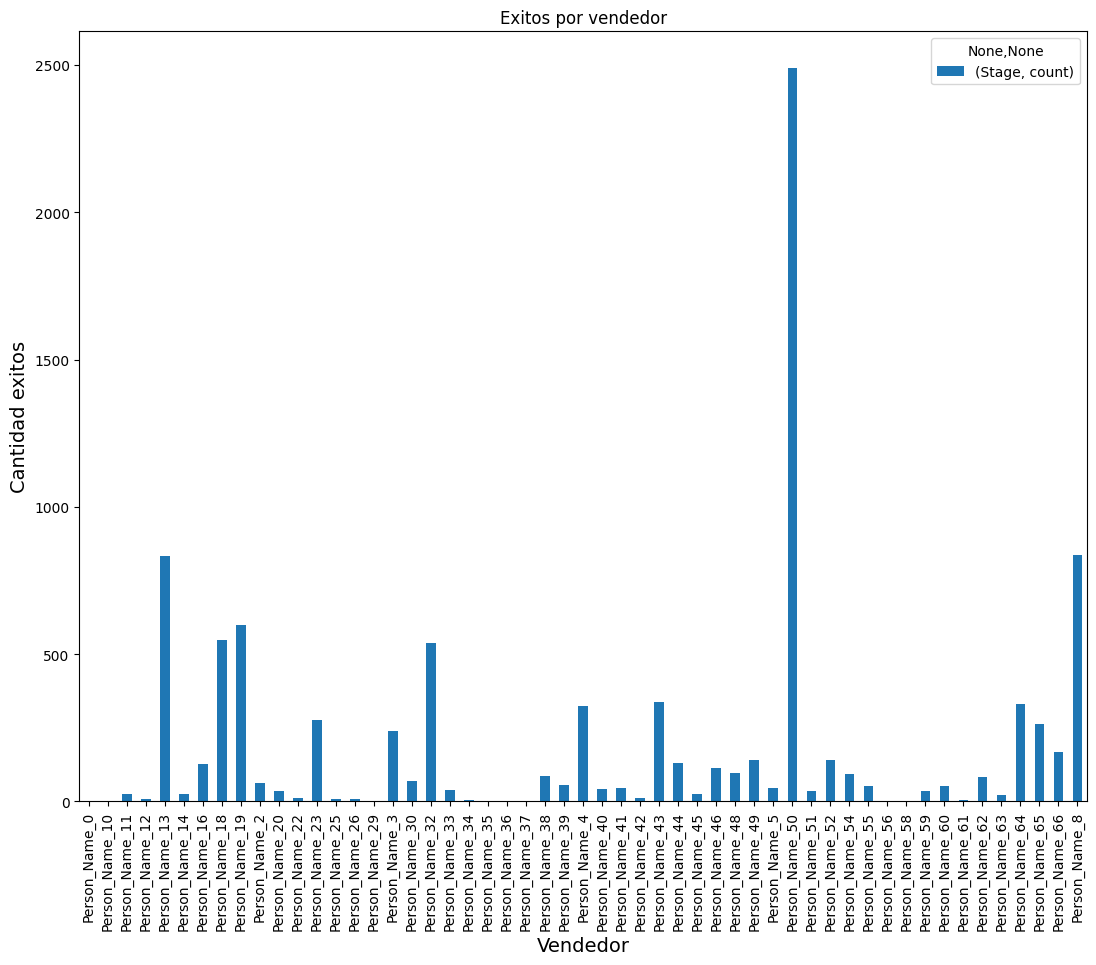

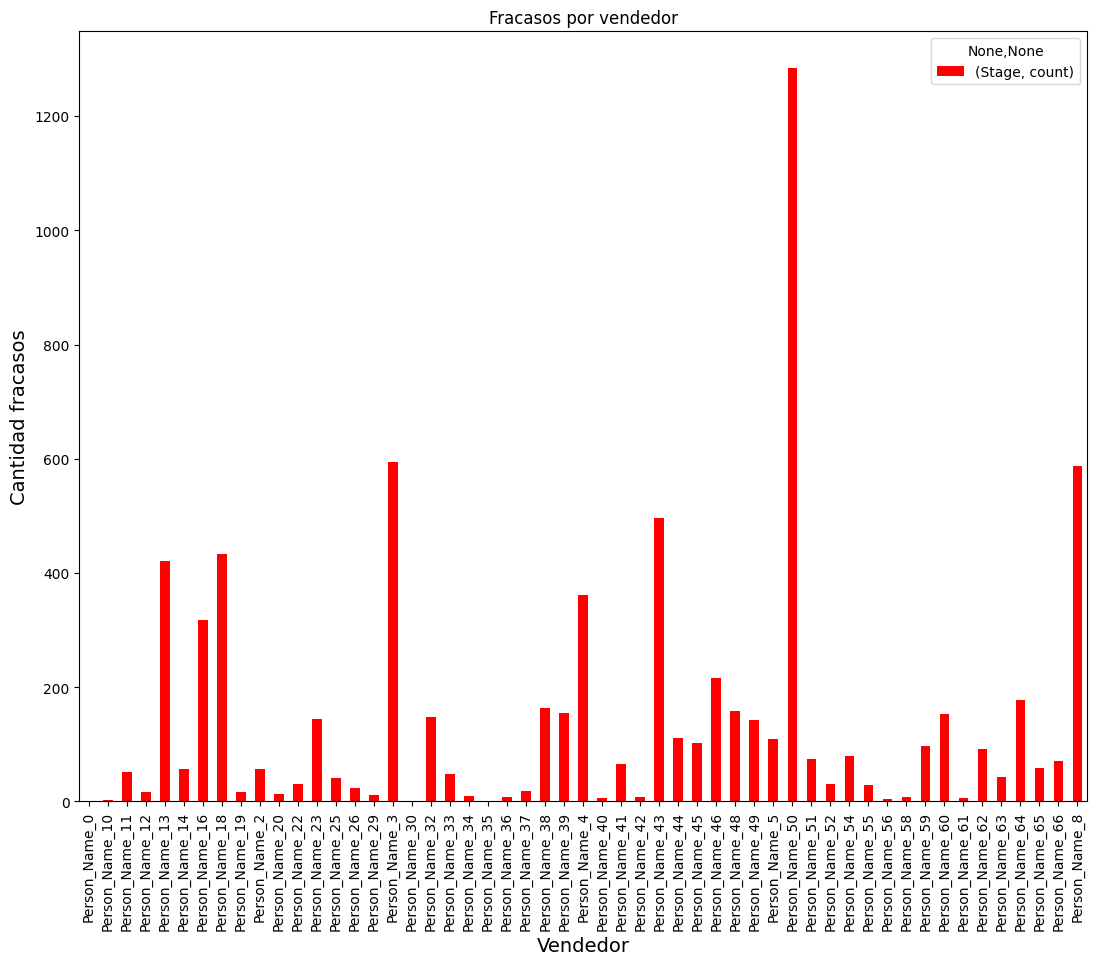

In [ ]:
#Graficamos los exitos y fracasos por vendedor

g = vendedoresXstage_exitosas_grouped.plot.bar(figsize=(13,10))
g.set_title("Exitos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad exitos", fontsize=14)


g = vendedoresXstage_fracasadas_grouped.plot.bar(figsize=(13,10), color="red")
g.set_title("Fracasos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)

Text(0, 0.5, 'Cantidad fracasos')

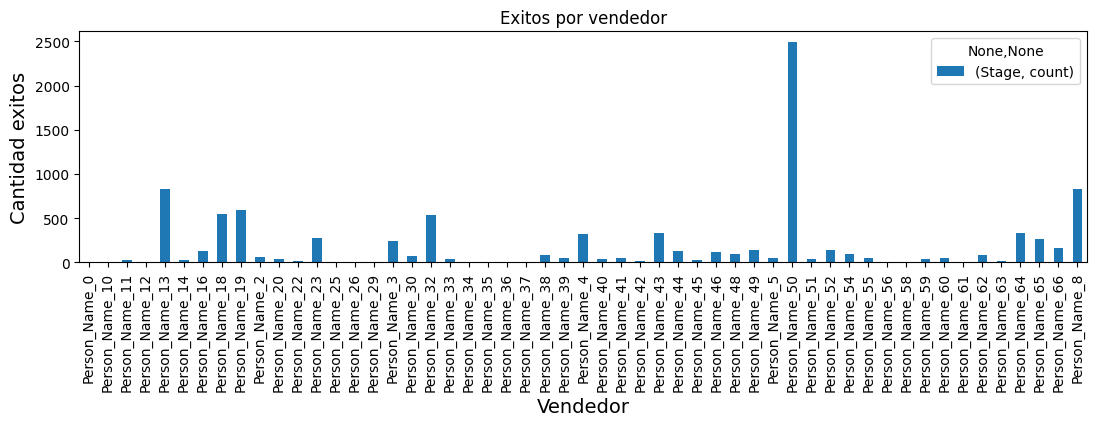

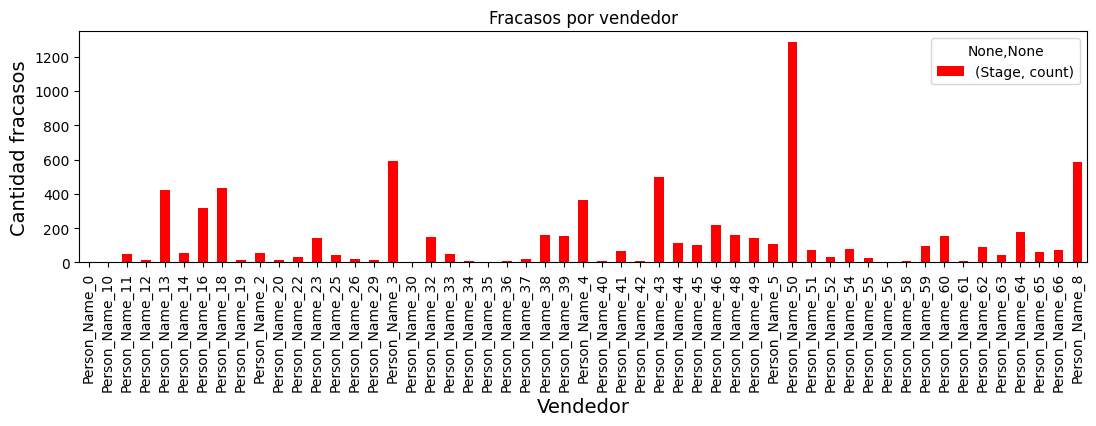

In [ ]:
#volvemos a graficarlos con una escala mas chica a fin de apreciar esta vez la diferencia entre exitos y fracasos por 
#vendedor. No lo hacemos todo en el mismo grafico porque al cantidad de vendedores x 2 haria practicamente ilegible
#una visualización conjunta

#IMPORTANTE: Notar que la escala de cantidad en exitos y en fracasos es distinta!

g = vendedoresXstage_exitosas_grouped.plot.bar(figsize=(13,3))
g.set_title("Exitos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad exitos", fontsize=14)


g = vendedoresXstage_fracasadas_grouped.plot.bar(figsize=(13,3), color="red")
g.set_title("Fracasos por vendedor")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad fracasos", fontsize=14)

### Lo que podemos inferir de estas gráficas es que en líneas generales los vendedores suelen tener un número similar de éxitos y fracasos. Ya mencionamos antes el caso del "Person 50" que es el "Mejor vendedor" y el "Peor vendedor" simultáneamente. Sin embargo, trataremos a la "Person 50" como el Mejor vendedor ya que suponemos más importantes los éxitos que los fracasos. Nos reportará más beneficio una persona que venda 10000 productos y fracase en otros 10000, que una que fracase en 0 y venda 100. La "Person 43" fracasó en 496 ventas... pero vendió 336, que es lo importante. 

### De todas formas destacamos la performance de "Person 19" y Person "32", cuyo numero de éxitos es bastante más elevado que el de fracaso, sin embargo esos éxitos aun quedan lejos de nuestro "Mejor Vendedor".

In [ ]:
#Seguimos tratando de encontrar a nuestro mejor vendedor. Para ello ahora calcularemos quien es el vendedor que mas dinero
#le reporto a la empresa con sus ventas, y cual tiene el mejor promedio de ventas.
#Trabajamos con monto en dolares.

#Por supuesto solo tenemos en cuenta las ventas que cerraron con Closed Won

vendedoresXprice = df_frio_frio[df_frio_frio['Stage']=="Closed Won"][['Opportunity_Owner','USD_Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','USD_Total_Amount':'Precio'})
vendedoresXprice

,Vendedor,Precio
1,Person_Name_20,5.664614e+04
2,Person_Name_8,8.386560e+04
7,Person_Name_8,5.068800e+04
23,Person_Name_49,1.621851e+06
63,Person_Name_13,1.213846e+05
...,...,...
16937,Person_Name_13,4.855383e+05
16939,Person_Name_13,4.717967e+05
16942,Person_Name_13,1.213846e+05
16943,Person_Name_13,1.092461e+05


In [ ]:
#Antes de calcular, podemos ver varios datos interesantes

#Total acumulado como ganancia por todos los vendedores
vendedoresXprice.Precio.sum()

1685797579.193337

In [ ]:
#Promedio de ganancia por venta para todos los vendedores por articulo vendido

vendedoresXprice.Precio.sum()/len(vendedoresXprice)

176838.09705164554

In [ ]:
#Articulo que mas caro se vendio

max(vendedoresXprice['Precio'])

27315253.35

In [ ]:
#Quien vendio el articulo mas caro

vendedoresXprice.nlargest(1,"Precio").Vendedor

16222    Person_Name_12
Name: Vendedor, dtype: category
Categories (53, object): ['Person_Name_0', 'Person_Name_10', 'Person_Name_11', 'Person_Name_12', ...,
                          'Person_Name_64', 'Person_Name_65', 'Person_Name_66', 'Person_Name_8']

In [ ]:
#Articulo que mas barato se vendio

min(vendedoresXprice['Precio']) #no interpretamos el cero como un error, lo suponemos un "regalo" en alguna venta

0.0

In [ ]:
#Nos interesa saber tambien la media de los precios de cada articulo

vendedoresXprice['Precio'].mean()

176856.6490970777

In [ ]:
#Tambien querriamos el desvio estandar

vendedoresXprice['Precio'].std()

773067.4705805847

In [ ]:
#Nos interesa ver ahora el promedio de venta por articulo por vendedor

vendedoresXprice_mean = vendedoresXprice.groupby(['Vendedor']).Precio.mean()
vendedoresXprice_mean

Vendedor
Person_Name_0              NaN
Person_Name_10             NaN
Person_Name_11    7.326666e+04
Person_Name_12    8.799441e+06
Person_Name_13    2.893309e+05
Person_Name_14    1.329783e+05
Person_Name_16    2.525747e+05
Person_Name_18    1.891757e+05
Person_Name_19    6.779713e+04
Person_Name_2     7.067212e+04
Person_Name_20    1.250374e+05
Person_Name_22    1.059312e+05
Person_Name_23    7.462830e+04
Person_Name_25    6.878194e+04
Person_Name_26    5.844856e+05
Person_Name_29    1.168040e+05
Person_Name_3     4.227111e+05
Person_Name_30    1.920867e+05
Person_Name_32    8.485070e+04
Person_Name_33    1.552992e+05
Person_Name_34    2.706725e+04
Person_Name_35    0.000000e+00
Person_Name_36             NaN
Person_Name_37    3.304200e+03
Person_Name_38    5.918809e+04
Person_Name_39    1.234495e+05
Person_Name_4     4.494359e+05
Person_Name_40    7.626838e+04
Person_Name_41    2.478809e+05
Person_Name_42    5.558572e+04
Person_Name_43    8.142997e+04
Person_Name_44    5.744647e+04

In [ ]:
#¿Quiénes son los 10 con mejor promedio?

vendedoresXprice_mean.nlargest(10)

Vendedor
Person_Name_12    8.799441e+06
Person_Name_8     5.980066e+05
Person_Name_26    5.844856e+05
Person_Name_4     4.494359e+05
Person_Name_3     4.227111e+05
Person_Name_46    3.770994e+05
Person_Name_49    3.323213e+05
Person_Name_13    2.893309e+05
Person_Name_62    2.848476e+05
Person_Name_66    2.707670e+05
Name: Precio, dtype: float64

In [ ]:
#¿Quiénes los 10 con peor promedio?

vendedoresXprice_mean.nsmallest(10)

Vendedor
Person_Name_35        0.000000
Person_Name_37     3304.200000
Person_Name_50     4332.743077
Person_Name_65    26108.854449
Person_Name_34    27067.250000
Person_Name_42    55585.721659
Person_Name_44    57446.466124
Person_Name_38    59188.089655
Person_Name_56    63823.798125
Person_Name_64    67244.055212
Name: Precio, dtype: float64

In [ ]:
#Ahora vamos a sumar los precios, para visualizar quienes recaudaron mas plata

vendedoresXprice_sum = vendedoresXprice.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_sum

Vendedor
Person_Name_0     0.000000e+00
Person_Name_10    0.000000e+00
Person_Name_11    1.904933e+06
Person_Name_12    6.159609e+07
Person_Name_13    2.407233e+08
Person_Name_14    3.457437e+06
Person_Name_16    3.232956e+07
Person_Name_18    1.038574e+08
Person_Name_19    4.061048e+07
Person_Name_2     4.310999e+06
Person_Name_20    4.501346e+06
Person_Name_22    1.271174e+06
Person_Name_23    2.074667e+07
Person_Name_25    5.502555e+05
Person_Name_26    5.844856e+06
Person_Name_29    1.168040e+05
Person_Name_3     1.006053e+08
Person_Name_30    1.306190e+07
Person_Name_32    4.556483e+07
Person_Name_33    6.056668e+06
Person_Name_34    1.082690e+05
Person_Name_35    0.000000e+00
Person_Name_36    0.000000e+00
Person_Name_37    6.608400e+03
Person_Name_38    5.149364e+06
Person_Name_39    6.913173e+06
Person_Name_4     1.451678e+08
Person_Name_40    3.355809e+06
Person_Name_41    1.165040e+07
Person_Name_42    6.114429e+05
Person_Name_43    2.736047e+07
Person_Name_44    7.410594e+06

In [ ]:
#¿Quienes son los 10 con mas recaudado?

vendedoresXprice_sum.nlargest(10)

Vendedor
Person_Name_8     4.993355e+08
Person_Name_13    2.407233e+08
Person_Name_4     1.451678e+08
Person_Name_18    1.038574e+08
Person_Name_3     1.006053e+08
Person_Name_12    6.159609e+07
Person_Name_49    4.718963e+07
Person_Name_66    4.575962e+07
Person_Name_32    4.556483e+07
Person_Name_46    4.261223e+07
Name: Precio, dtype: float64

In [ ]:
#¿Quienes son los 10 con menos recaudado?

vendedoresXprice_sum.nsmallest(10)

Vendedor
Person_Name_0          0.00000
Person_Name_10         0.00000
Person_Name_35         0.00000
Person_Name_36         0.00000
Person_Name_58         0.00000
Person_Name_37      6608.40000
Person_Name_34    108269.00000
Person_Name_29    116804.02500
Person_Name_56    127647.59625
Person_Name_25    550255.50000
Name: Precio, dtype: float64

### Ahora que tenemos la suma de ventas x articulo y el promedio de ventas x articulo, ambos agrupados por vendedor, podemos hacer unos graficos para extraer conclusiones.

Text(0, 0.5, 'Promedio Dinero')

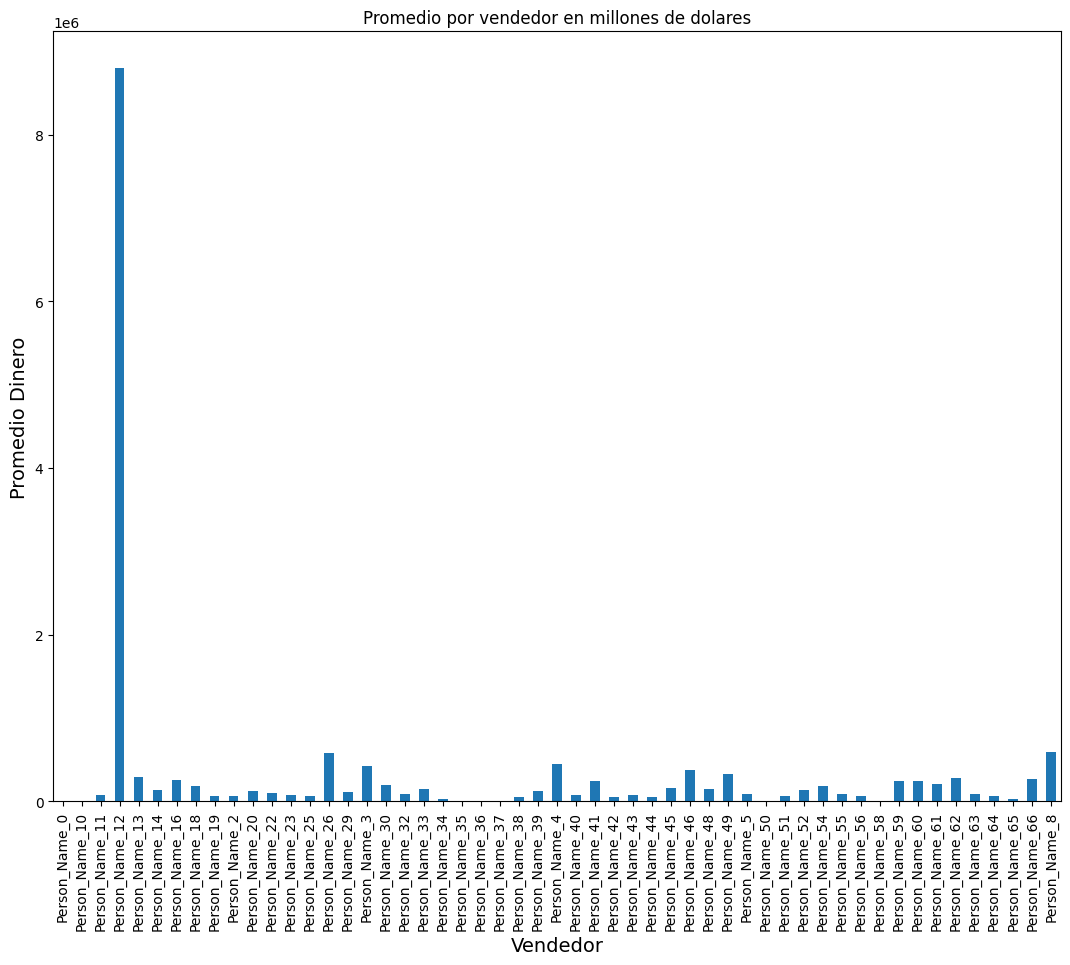

In [ ]:
#Graficamos el promedio por vendedor

g = vendedoresXprice_mean.plot.bar(figsize=(13,10))
g.set_title("Promedio por vendedor en millones de dolares")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Promedio Dinero", fontsize=14)


### vemos que solo "Unos pocos" se salen de la norma y superan ampliamente a los demas. Es decir, podemos observar claramente dos grupos: Los que tienen un promedio "Muy bajo" y los que tienen un promedio "Muy alto". Cabe destacar que es la minoria quien se encuentra dentro de este grupo de altos. 

### ¿Y el promedio que habiamos calculado antes? 

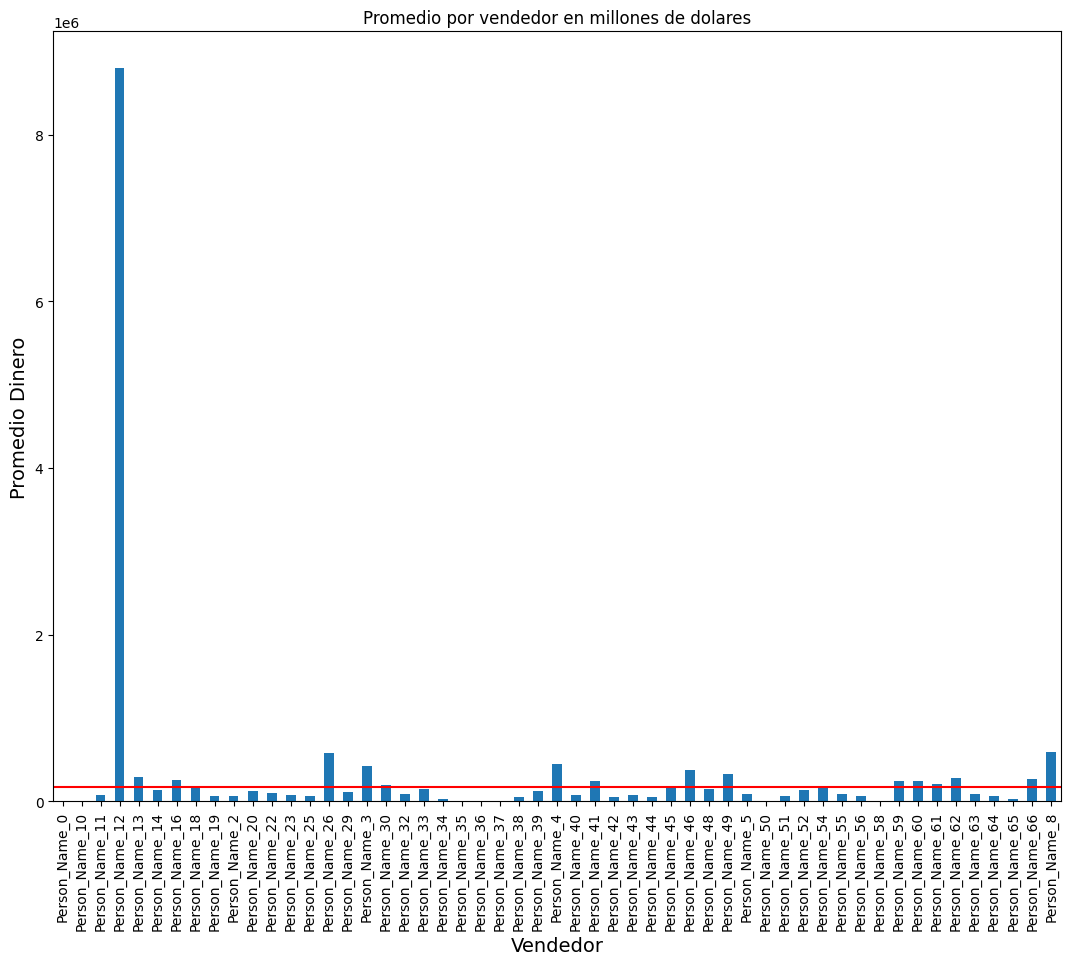

In [ ]:
g = vendedoresXprice_mean.plot.bar(figsize=(13,10))
g.set_title("Promedio por vendedor en millones de dolares")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Promedio Dinero", fontsize=14)

g.axhline(y=vendedoresXprice.Precio.sum()/len(vendedoresXprice), xmin=0, xmax=1,color="red")


### Se cumple lo que esperabamos: Unos pocos dentro del grupo de "los mejores", y muchos dentro del grupo de "los peores". Tan solo 15 vendedores estan arriba de la linea, y es tanto el dinero recaudado por ellos que elevan el promedio de forma que muy pocos, ellos mismos, lo superan.

### ¿Y nuestro mejor vendedor? ¿La person 50 que tenia mas ventas cerradas que nadie? Soprendentemente lo encontramos por debajo del promedio, y ubicado entre "Los peores"... ¿Seguimos diciendo que es el mejor?

Text(0, 0.5, 'Cantidad Dinero')

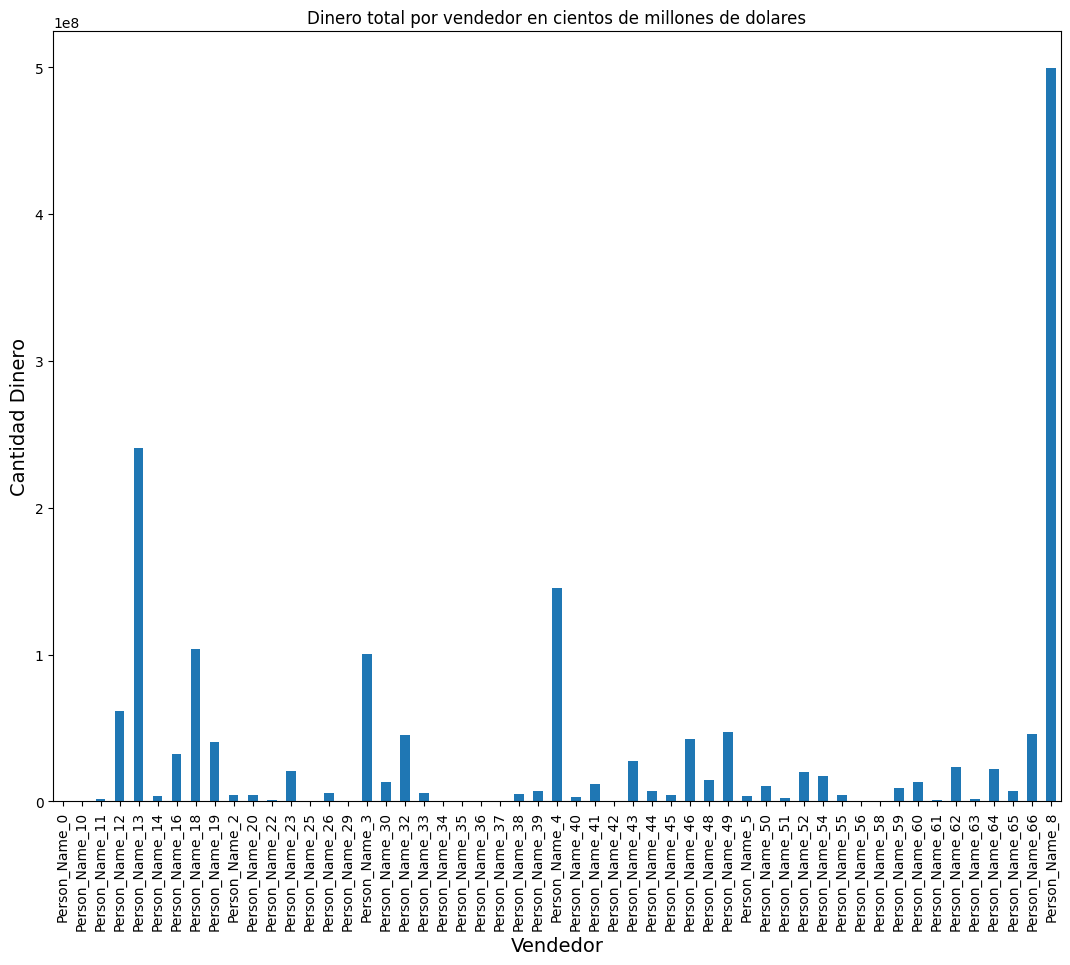

In [ ]:
#Hacemos ahora el grafico para los vendedores que mas dinero recaudaron, ¿Sera analogo al de promedios?

g = vendedoresXprice_sum.plot.bar(figsize=(13,10))
g.set_title("Dinero total por vendedor en cientos de millones de dolares")
g.set_xlabel("Vendedor", fontsize=14)
g.set_ylabel("Cantidad Dinero", fontsize=14)

### En este grafico vemos que, por mucho, la Person 8 es el vendedor que mas dinero le hizo ganar a la empresa. Ademas, esta persona era el segundo mejor vendedor en cuanto a promedios, y ocupada un lugar bastante alto entre los que mas ventas habian cerrado. Sin embargo no fue el quien habia vendido el producto mas caro (era el person 12, quien era el que tenia mejor promedio)

### Y nuestro mejor vendedor, la Person 50? Luego de haber ocupado un lugar entre "los peores" en promedios... Vuelve a ocupar un lugar bastante discreto tambien en este grafico.

### En conclusion, por ocupar el mejor lugar en precio acumulado por ventas y segundo lugar en proedio, diremos que la Person 8 es el "Mejor vendedor" de la empresa. Decimos que la Person 50, quien antes habiamos considerado el mejor, ni siquiera esta ahora entre "los mejores". Si destacamos su, seguramente, amplia trayectoria por ser el vendedor que mas productos cerro.


### Finalmente, podemos decir que no hay una relacion directa entre ventas cerradas, y suma de ganancias, aunque ciertos vendedores evidencien una alta posición en las dos categorias. Si hay muchos, la mayoria, que aparecen bastante abajo en cada topico.

### Otra conclusión a la que podemos llegar es que en realidad el promedio es mas una "curiosidad" que algo que pueda importar mucho en una empresa. Antes habiamos dicho que no nos importaba las veces que el vendedor falla, sino las que acierta. El promedio es el mismo caso. En todo caso nos importan las ventas que la persona cerro y el dinero que le trajo a la empresa, mas que "cuanto" por cada vez promediada. Mas aun si suponemos que un vendedor joven que recien inicia fallara mas y recaudara menos que un vendedor experto con años en el negocio. Es decir en todo caso tendria mas sentido un promedio por etapas en la vida laboral del vendedor, separados en años o en cantidad de ventas.

In [ ]:
#A continuación analizaremos el comportamiento de los vendedores por region
#Analizaremos los precios nuevamente en dolares.

df_frio_frio['Region'] #vemos que tenemos 5 regiones: Apac, Americas, EMEA, Japan y Middle East

0            EMEA
1            EMEA
2        Americas
3        Americas
4        Americas
           ...   
16942        EMEA
16943        EMEA
16944        EMEA
16945    Americas
16946    Americas
Name: Region, Length: 16947, dtype: category
Categories (5, object): ['APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']

In [ ]:
#separamos cada region por separado para poder analizarlas, solo tomamos las ventas ganadas.
df_won = df_frio_frio[df_frio_frio['Stage']=='Closed Won']

region_Apac = df_won[df_won['Region'] == 'APAC'][['Opportunity_Owner','USD_Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','USD_Total_Amount':'Precio'})
region_Americas = df_won[df_won['Region'] == 'Americas'][['Opportunity_Owner','USD_Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','USD_Total_Amount':'Precio'})
region_EMEA = df_won[df_won['Region'] == 'EMEA'][['Opportunity_Owner','USD_Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','USD_Total_Amount':'Precio'})
region_Japan = df_won[df_won['Region'] == 'Japan'][['Opportunity_Owner','USD_Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','USD_Total_Amount':'Precio'})
region_MiddleEast = df_won[df_won['Region'] == 'Middle East'][['Opportunity_Owner','USD_Total_Amount']].rename(columns={'Opportunity_Owner':'Vendedor','USD_Total_Amount':'Precio'})

In [ ]:
#Ahora agrupamos por vendedor sumando sus precios

vendedoresXprice_Apac = region_Apac.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_Americas = region_Americas.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_EMEA = region_EMEA.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_Japan = region_Japan.groupby(['Vendedor']).Precio.sum()
vendedoresXprice_MiddleEast = region_MiddleEast.groupby(['Vendedor']).Precio.sum()

In [ ]:
vendedoresXprice_Apac = vendedoresXprice_Apac[vendedoresXprice_Apac>0]
vendedoresXprice_Americas = vendedoresXprice_Americas[vendedoresXprice_Americas>0]
vendedoresXprice_EMEA = vendedoresXprice_EMEA[vendedoresXprice_EMEA>0]
vendedoresXprice_Japan = vendedoresXprice_Japan[vendedoresXprice_Japan>0]
vendedoresXprice_MiddleEast = vendedoresXprice_MiddleEast[vendedoresXprice_MiddleEast>0]


In [ ]:
#¿quienes son los cinco mejores vendedores de APAC?

vendedoresXprice_Apac.nlargest(5)

Vendedor
Person_Name_49    4.718963e+07
Person_Name_19    4.061048e+07
Person_Name_43    2.736047e+07
Person_Name_52    1.974106e+07
Person_Name_54    1.757919e+07
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de Americas?

vendedoresXprice_Americas.nlargest(5)

Vendedor
Person_Name_8     4.993355e+08
Person_Name_3     1.006053e+08
Person_Name_12    6.159609e+07
Person_Name_46    4.261223e+07
Person_Name_64    2.219054e+07
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de EMEA?

vendedoresXprice_EMEA.nlargest(5)

Vendedor
Person_Name_13    2.407233e+08
Person_Name_4     1.451678e+08
Person_Name_18    1.038574e+08
Person_Name_16    3.232956e+07
Person_Name_62    2.364235e+07
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de Japan?

vendedoresXprice_Japan.nlargest(5)

Vendedor
Person_Name_66    4.575962e+07
Person_Name_32    4.556483e+07
Person_Name_30    1.306190e+07
Person_Name_50    1.078420e+07
Person_Name_55    4.729636e+06
Name: Precio, dtype: float64

In [ ]:
#¿quienes son los cinco mejores vendedores de Middle East?

vendedoresXprice_MiddleEast.nlargest(5)

Vendedor
Person_Name_5     3078539.14
Person_Name_39    1350963.20
Person_Name_41     217223.60
Person_Name_34     103976.00
Name: Precio, dtype: float64

Text(0, 0.5, 'Region')

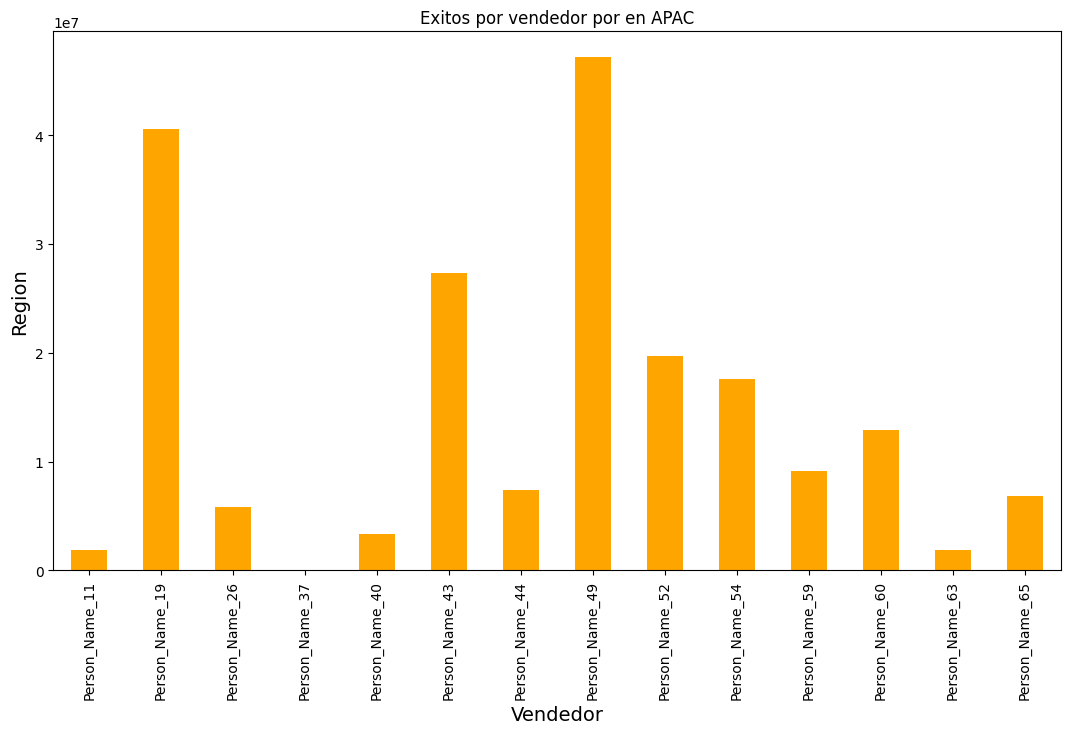

In [ ]:
#Realizamos unas graficas por region para terminar de visualizar esto.

a = vendedoresXprice_Apac.plot.bar(figsize=(13,7), color="orange")
a.set_title("Exitos por vendedor por en APAC")
a.set_xlabel("Vendedor", fontsize=14)
a.set_ylabel("Region", fontsize=14)


Text(0, 0.5, 'Region')

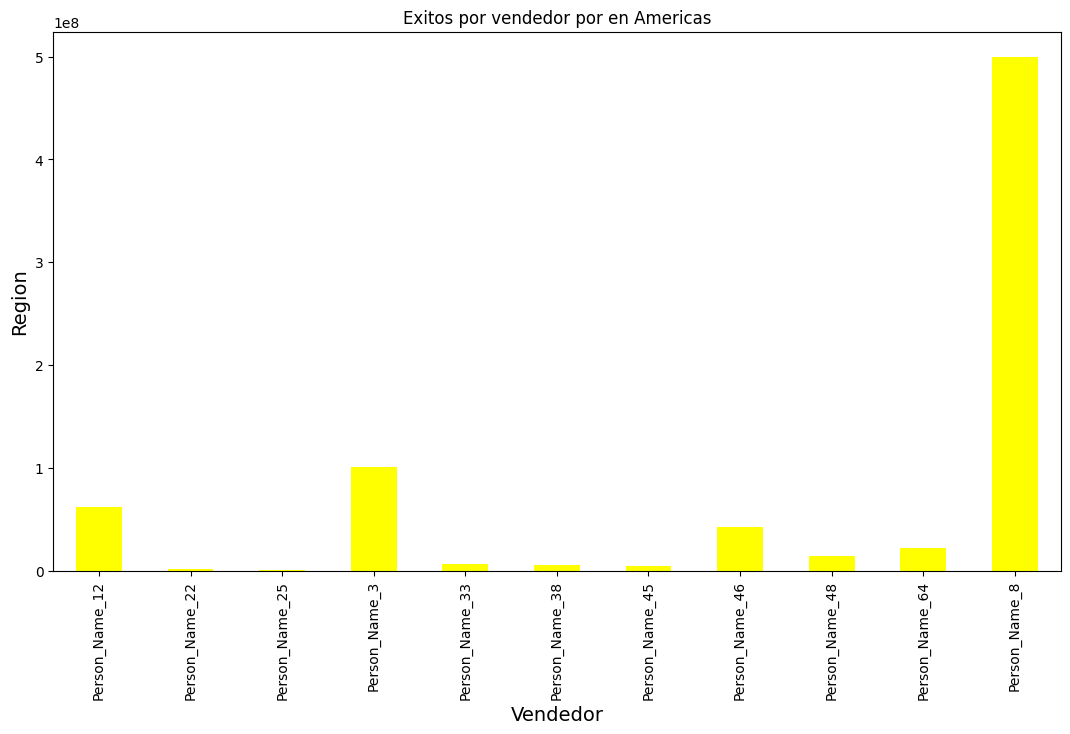

In [ ]:
b = vendedoresXprice_Americas.plot.bar(figsize=(13,7), color="yellow")
b.set_title("Exitos por vendedor por en Americas")
b.set_xlabel("Vendedor", fontsize=14)
b.set_ylabel("Region", fontsize=14)


Text(0, 0.5, 'Region')

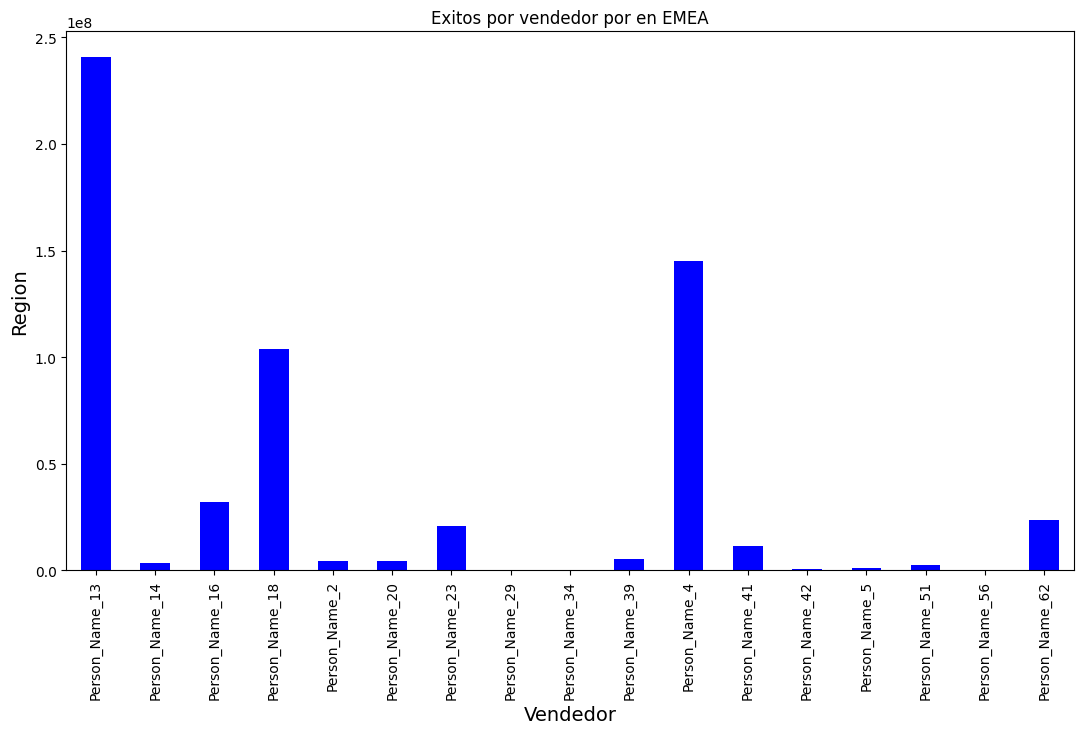

In [ ]:
c = vendedoresXprice_EMEA.plot.bar(figsize=(13,7), color="blue")
c.set_title("Exitos por vendedor por en EMEA")
c.set_xlabel("Vendedor", fontsize=14)
c.set_ylabel("Region", fontsize=14)


Text(0, 0.5, 'Region')

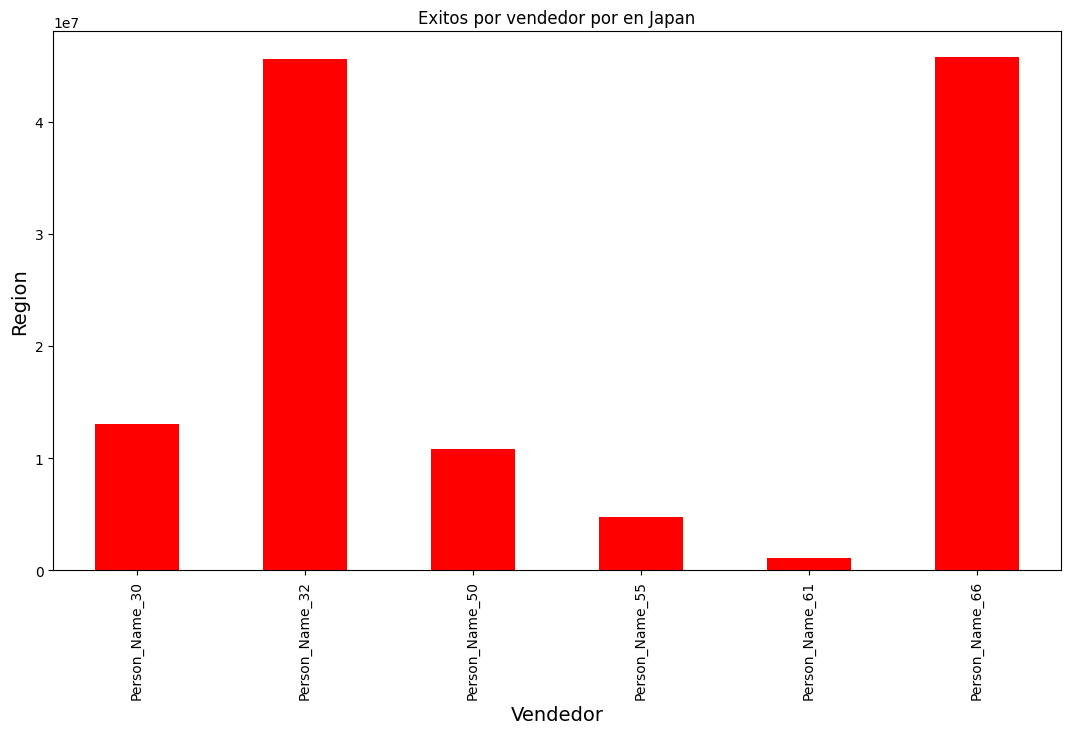

In [ ]:
d = vendedoresXprice_Japan.plot.bar(figsize=(13,7), color="red")
d.set_title("Exitos por vendedor por en Japan")
d.set_xlabel("Vendedor", fontsize=14)
d.set_ylabel("Region", fontsize=14)



Text(0, 0.5, 'Region')

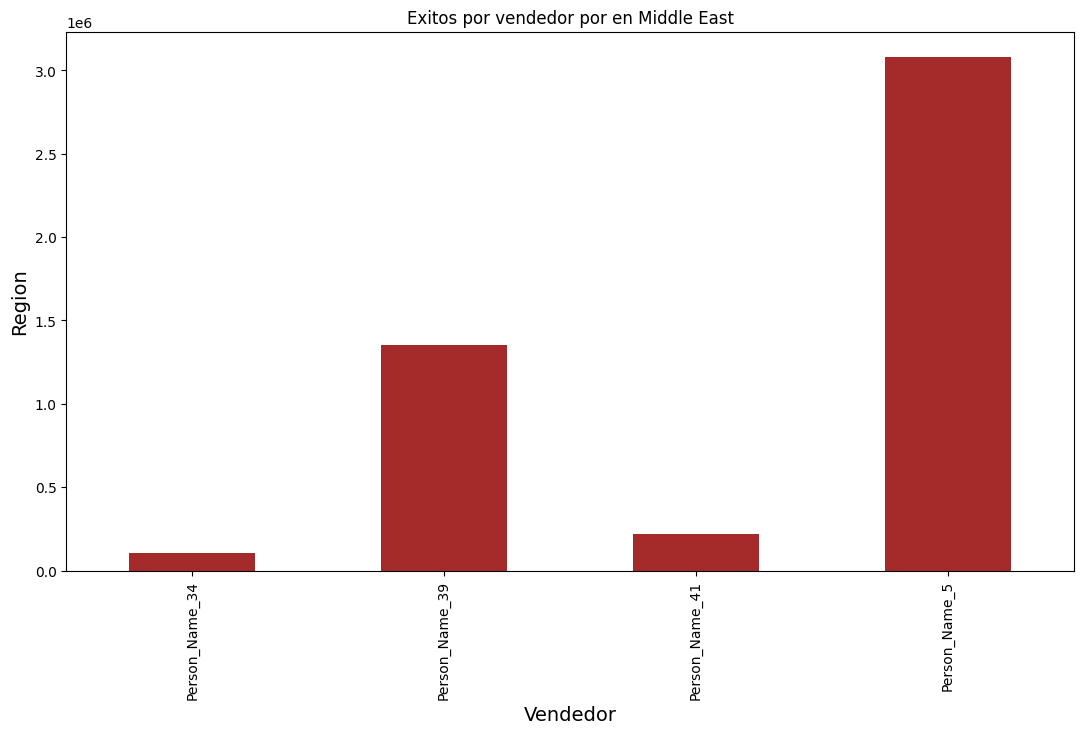

In [ ]:
e = vendedoresXprice_MiddleEast.plot.bar(figsize=(13,7), color="brown")
e.set_title("Exitos por vendedor por en Middle East")
e.set_xlabel("Vendedor", fontsize=14)
e.set_ylabel("Region", fontsize=14)


In [ ]:
df_changed['Product_Family']= df_frio_frio['Product_Family']

In [ ]:
totalVendidoPorFamilia = df_changed.groupby(['Product_Family', 'Stage']).agg({'USD_Total_Amount':'sum'}).unstack()
totalVendidoPorFamilia.columns=['Total Perdidas','Total Ganancias','Negotiation_Total_Amount','Proposal_Total_Amount','Qualification_Total_Amount']
totalVendidoPorFamilia.reset_index(inplace=True)
totalVendidoPorFamilia

,Product_Family,Total Perdidas,Total Ganancias,Negotiation_Total_Amount,Proposal_Total_Amount,Qualification_Total_Amount
0,Product_Family_0,4.611072e+03,4.164564e+03,NaN,NaN,NaN
1,Product_Family_1,3.697200e+02,3.288612e+03,NaN,NaN,NaN
2,Product_Family_10,9.834552e+03,1.923871e+04,NaN,NaN,NaN
3,Product_Family_100,4.565343e+08,6.969775e+07,NaN,NaN,NaN
4,Product_Family_101,5.378733e+06,5.585563e+05,NaN,NaN,NaN
...,...,...,...,...,...,...
222,Product_Family_98,4.531500e+04,3.589688e+05,NaN,NaN,NaN
223,Product_Family_99,NaN,8.663115e+04,NaN,NaN,NaN
224,Product_Family_159,5.138560e+07,NaN,NaN,NaN,NaN
225,Product_Family_239,5.300000e+03,NaN,NaN,NaN,NaN


In [ ]:
#Las 10 familias de productos con mas perdidas
masPerdidasPorFamilia = totalVendidoPorFamilia[['Product_Family','Total Perdidas','Total Ganancias']]
masPerdidasPorFamilia.nlargest(10,'Total Perdidas')

,Product_Family,Total Perdidas,Total Ganancias
60,Product_Family_164,2.498135e+09,1.263552e+08
108,Product_Family_209,1.913898e+09,5.099019e+07
112,Product_Family_213,1.794252e+09,3.370889e+07
199,Product_Family_77,9.970460e+08,1.776664e+08
66,Product_Family_170,6.290881e+08,1.962067e+07
208,Product_Family_85,5.834762e+08,1.042937e+08
111,Product_Family_212,5.688314e+08,4.952565e+07
55,Product_Family_158,5.283418e+08,8.710037e+07
107,Product_Family_208,4.950985e+08,5.772587e+07
3,Product_Family_100,4.565343e+08,6.969775e+07


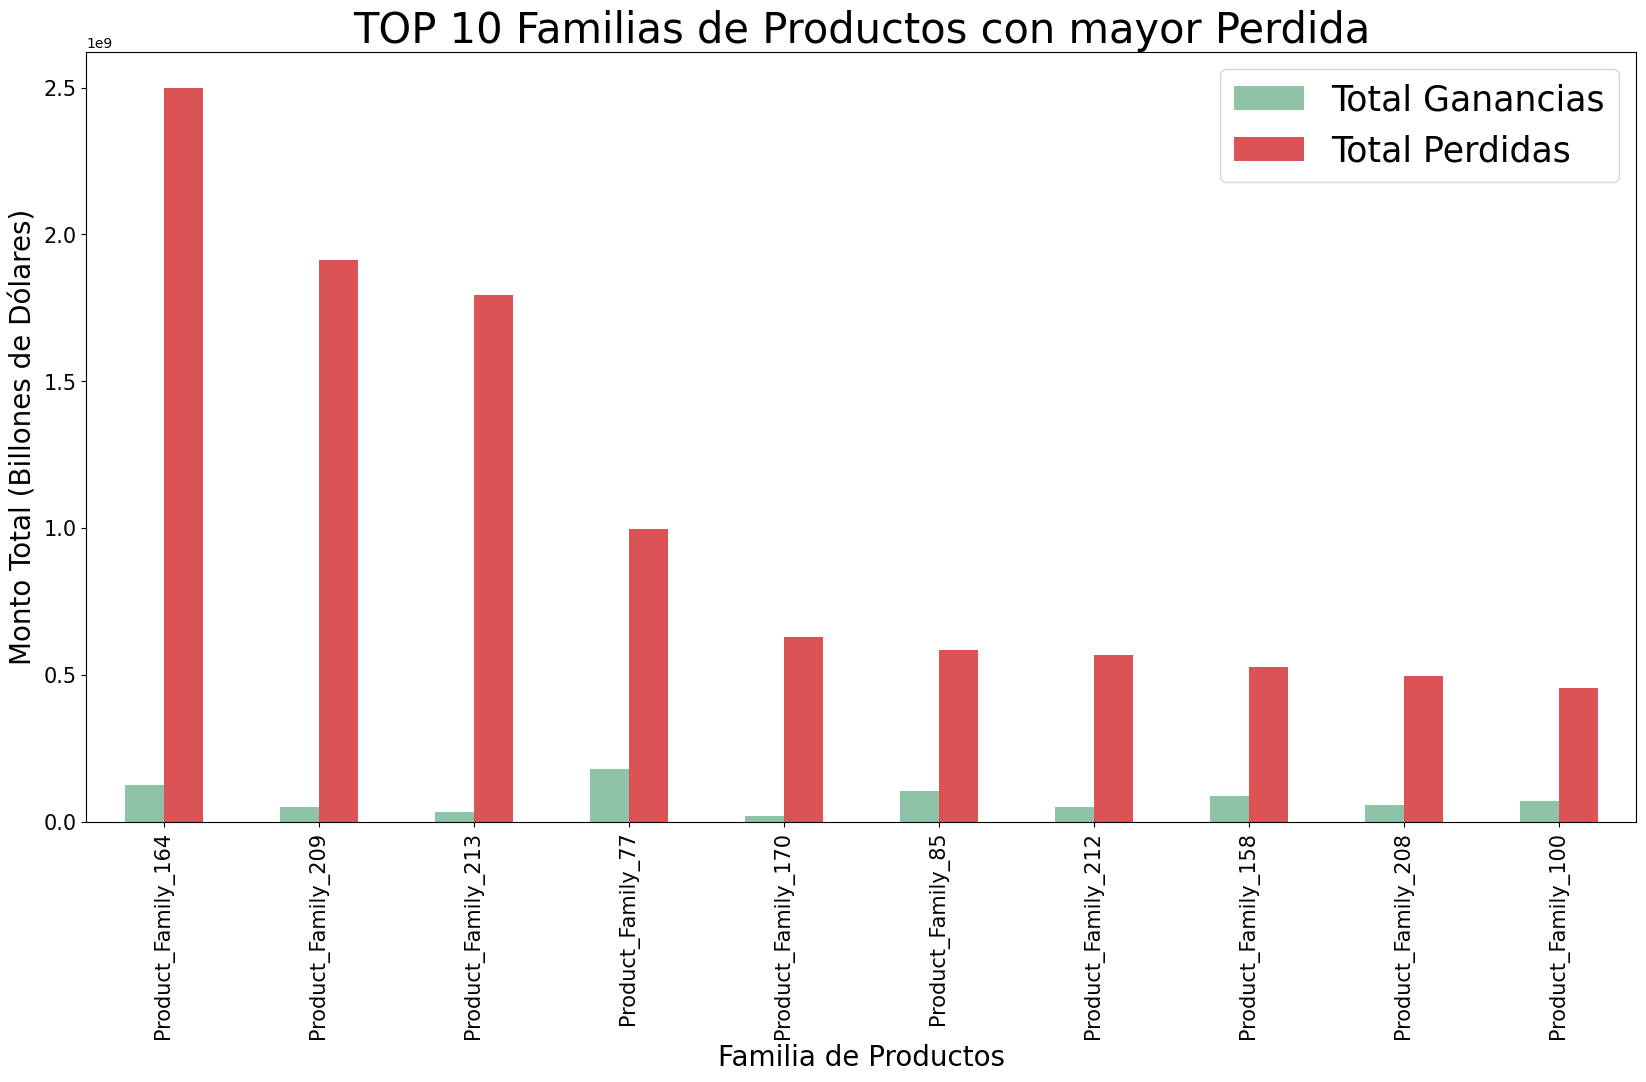

In [ ]:
grafico = masPerdidasPorFamilia.nlargest(10,'Total Perdidas')[['Product_Family','Total Ganancias','Total Perdidas']].plot.bar(x='Product_Family',figsize=(20,10), fontsize =15, color=['#8EC3A7','#DC5356'])
grafico.set_xlabel('Familia de Productos', fontsize = 20)
grafico.set_ylabel('Monto Total (Billones de Dólares)', fontsize = 20)
grafico.set_title(label='TOP 10 Familias de Productos con mayor Perdida', fontsize=30)
grafico.legend(prop={'size': 25})

In [ ]:
#Las 10 familias de productos con mas ganancias
masGananciasPorFamilia = totalVendidoPorFamilia[['Product_Family','Total Perdidas','Total Ganancias']]
masGananciasPorFamilia.nlargest(10,'Total Ganancias')

,Product_Family,Total Perdidas,Total Ganancias
199,Product_Family_77,9.970460e+08,1.776664e+08
36,Product_Family_133,1.961995e+08,1.658211e+08
203,Product_Family_80,1.702533e+06,1.318897e+08
60,Product_Family_164,2.498135e+09,1.263552e+08
208,Product_Family_85,5.834762e+08,1.042937e+08
55,Product_Family_158,5.283418e+08,8.710037e+07
30,Product_Family_128,6.216700e+07,7.056173e+07
3,Product_Family_100,4.565343e+08,6.969775e+07
35,Product_Family_132,2.916460e+08,6.691165e+07
17,Product_Family_116,1.054287e+08,6.382493e+07


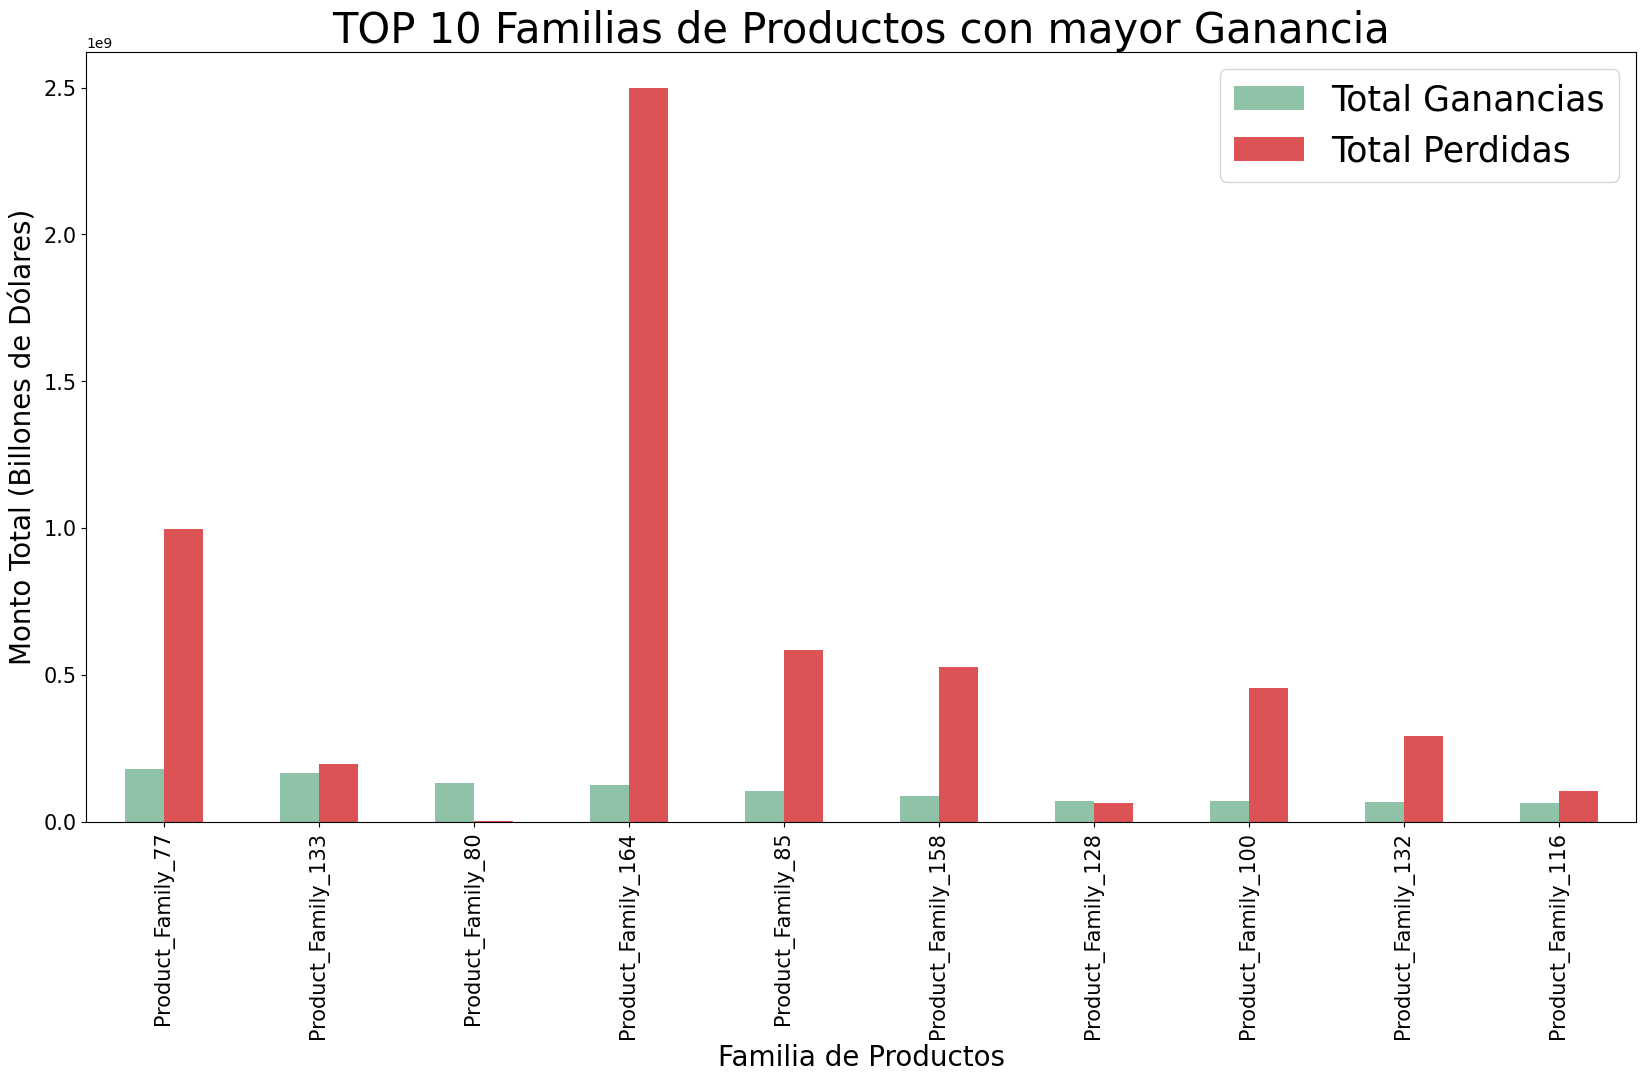

In [ ]:
grafico = masGananciasPorFamilia.nlargest(10,'Total Ganancias')[['Product_Family','Total Ganancias','Total Perdidas']].plot.bar(x='Product_Family',figsize=(20,10), fontsize = 15,color=['#8EC3A7','#DC5356'])
grafico.set_xlabel('Familia de Productos', fontsize = 20)
grafico.set_ylabel('Monto Total (Billones de Dólares)', fontsize = 20)
grafico.set_title(label='TOP 10 Familias de Productos con mayor Ganancia', fontsize=30)
grafico.legend(prop={'size': 25})

In [ ]:
#Cantidad Total vendida por cada Familia de Productos
totalCantidadVentasPorFamilia = df_changed.groupby(['Product_Family', 'Stage']).agg({'USD_Total_Amount':'count'}).unstack()
totalCantidadVentasPorFamilia.columns=['Cantidad Ventas Perdidas','Cantidad Ventas Ganadas','Cantidad Ventas en Negociacion','Proposal_Cantidad_Ventas','Qualification_Cantidad_Ventas']
totalCantidadVentasPorFamilia

,Cantidad Ventas Perdidas,Cantidad Ventas Ganadas,Cantidad Ventas en Negociacion,Proposal_Cantidad_Ventas,Qualification_Cantidad_Ventas
Product_Family,,,,,
Product_Family_0,69,96,0,0,0
Product_Family_1,4,9,0,0,0
Product_Family_10,40,76,0,0,0
Product_Family_100,302,317,0,0,0
Product_Family_101,10,8,0,0,0
...,...,...,...,...,...
Product_Family_98,2,5,0,0,0
Product_Family_99,0,12,0,0,0
Product_Family_159,1,0,0,0,0


In [ ]:
CantidadPerdidas=totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Ganadas')
CantidadPerdidas['Cantidad Ventas Ganadas'].sum()

4376

In [ ]:
totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Ganadas')

,Cantidad Ventas Perdidas,Cantidad Ventas Ganadas,Cantidad Ventas en Negociacion,Proposal_Cantidad_Ventas,Qualification_Cantidad_Ventas
Product_Family,,,,,
Product_Family_133,330,919,0,0,0
Product_Family_77,667,656,0,0,0
Product_Family_132,276,484,1,0,2
Product_Family_115,153,387,0,0,0
Product_Family_226,173,351,0,0,0
Product_Family_85,255,339,0,0,0
Product_Family_100,302,317,0,0,0
Product_Family_116,110,311,0,0,0
Product_Family_4,167,307,0,0,0


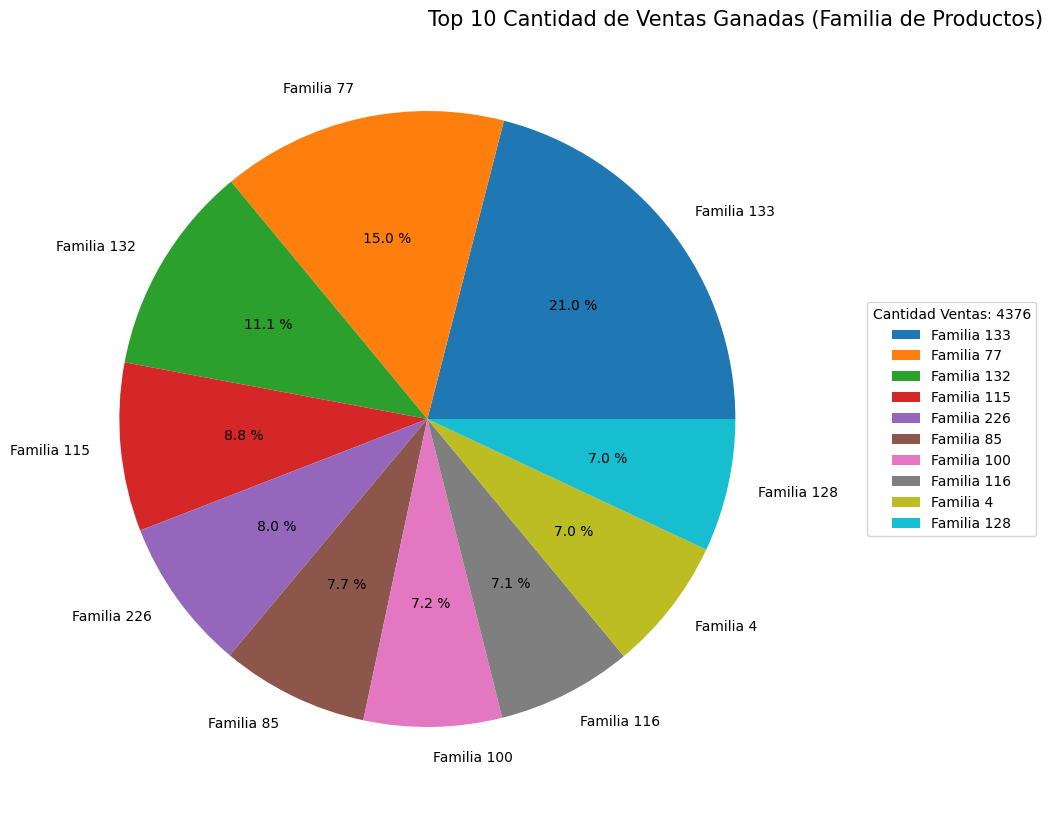

In [ ]:
familias = ['Familia 133','Familia 77','Familia 132','Familia 115','Familia 226','Familia 85','Familia 100','Familia 116','Familia 4','Familia 128']
graficoRelacionPerdidas = totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Ganadas').plot.pie(subplots=False,y='Cantidad Ventas Ganadas',labels= familias, xlim=(0,2), figsize= (10,10), ylabel='', autopct="%0.1f %%", fontsize = 10)
graficoRelacionPerdidas.set_title(label = 'Top 10 Cantidad de Ventas Ganadas (Familia de Productos)', fontsize = 15)
graficoRelacionPerdidas.legend(title='Cantidad Ventas: 4376',prop={'size':10}, loc='right')

In [ ]:
CantidadPerdidas=totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Perdidas')
CantidadPerdidas['Cantidad Ventas Perdidas'].sum()

3274

In [ ]:
#Top 10 familiar con ventas perdidas
totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Perdidas')

,Cantidad Ventas Perdidas,Cantidad Ventas Ganadas,Cantidad Ventas en Negociacion,Proposal_Cantidad_Ventas,Qualification_Cantidad_Ventas
Product_Family,,,,,
Product_Family_77,667,656,0,0,0
Product_Family_212,364,265,1,5,1
Product_Family_133,330,919,0,0,0
Product_Family_100,302,317,0,0,0
Product_Family_208,295,179,0,4,0
Product_Family_209,287,93,0,0,1
Product_Family_132,276,484,1,0,2
Product_Family_164,274,122,0,0,0
Product_Family_85,255,339,0,0,0


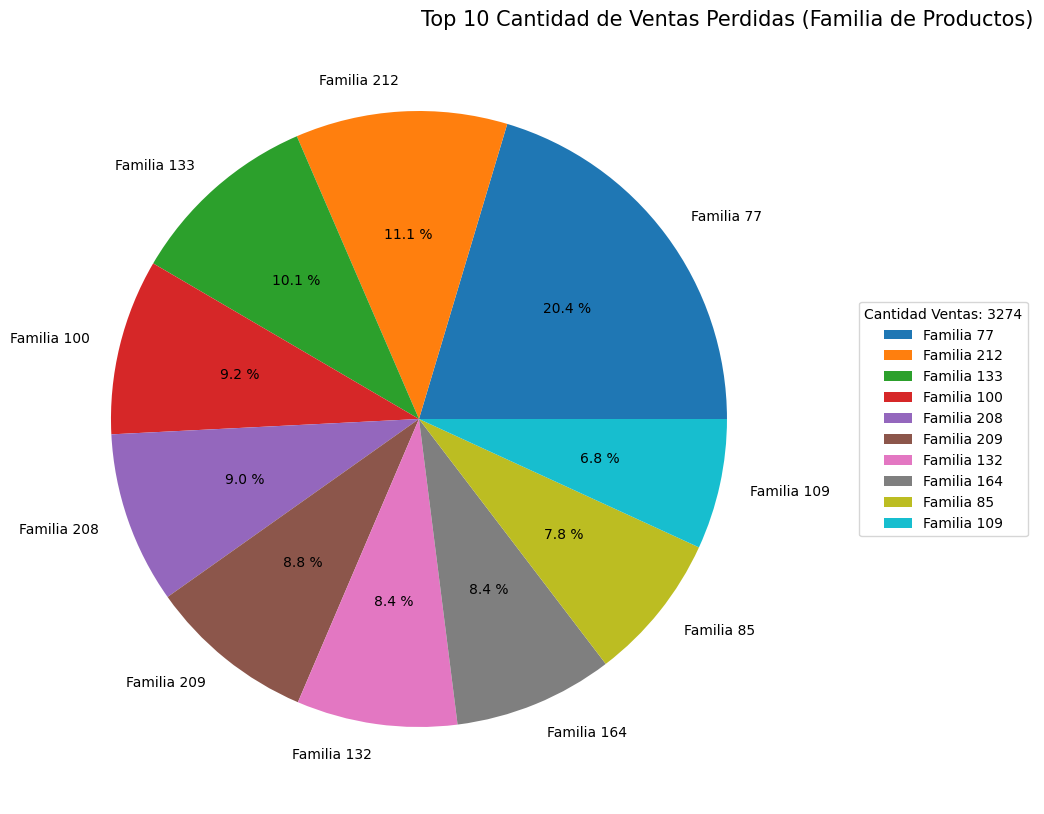

In [ ]:
familias = ['Familia 77','Familia 212','Familia 133','Familia 100','Familia 208','Familia 209','Familia 132','Familia 164','Familia 85','Familia 109']
graficoRelacionPerdidas = totalCantidadVentasPorFamilia.nlargest(10,'Cantidad Ventas Perdidas').plot.pie(subplots=False,y='Cantidad Ventas Perdidas', labels=familias, xlim=(0,2), figsize= (10,10), ylabel='', autopct="%0.1f %%", fontsize = 10)
graficoRelacionPerdidas.set_title(label = 'Top 10 Cantidad de Ventas Perdidas (Familia de Productos)', fontsize = 15)
graficoRelacionPerdidas.legend(title='Cantidad Ventas: 3274',prop={'size':10}, loc='right')

In [ ]:
#Analisis por Region
agrupadosPorRegion = df_frio_frio.groupby(['Region','Product_Family','Stage']).agg({'USD_Total_Amount':'sum'}).unstack()
agrupadosPorRegion.columns=['Total Perdido','Total Ganado','Negotiation_Total_Amount','Proposal_Total_Amount','Qualification_Total_Amount']
agrupadosPorRegion= agrupadosPorRegion[['Total Perdido','Total Ganado']]
agrupadosPorRegion

Total Perdido  Total Ganado
Region      Product_Family                                 
APAC        Product_Family_0              NaN           NaN
            Product_Family_1              NaN           NaN
            Product_Family_10             NaN           NaN
            Product_Family_100   5.718334e+07  3.817519e+06
            Product_Family_101   1.092690e+04  7.168697e+04
...                                       ...           ...
Middle East Product_Family_98    2.623500e+04           NaN
            Product_Family_99             NaN           NaN
            Product_Family_159            NaN           NaN
            Product_Family_239            NaN           NaN
            Product_Family_245            NaN           NaN

[1135 rows x 2 columns]

In [ ]:
regioneAmerica=agrupadosPorRegion[['Total Perdido','Total Ganado']]
regioneAmerica =regioneAmerica[(regioneAmerica['Total Perdido']>=0) | (regioneAmerica['Total Ganado']>=0)]
regioneAmerica

Total Perdido  Total Ganado
Region      Product_Family                                 
APAC        Product_Family_100   5.718334e+07  3.817519e+06
            Product_Family_101   1.092690e+04  7.168697e+04
            Product_Family_102   3.078000e+03  1.224153e+04
            Product_Family_104            NaN  2.362500e+03
            Product_Family_106            NaN  1.352160e+03
...                                       ...           ...
Middle East Product_Family_79    6.916000e+04           NaN
            Product_Family_85    4.915962e+05  2.623500e+04
            Product_Family_92             NaN  5.657750e+04
            Product_Family_94    1.815462e+05           NaN
            Product_Family_98    2.623500e+04           NaN

[474 rows x 2 columns]

In [ ]:
mejorPorRegion = regioneAmerica.groupby('Region').agg({'Total Ganado':'sum','Total Perdido':'sum'})
mejorPorRegion

,Total Ganado,Total Perdido
Region,,
APAC,2.018667e+08,3.754597e+09
Americas,7.580518e+08,6.697853e+09
EMEA,6.001509e+08,4.296638e+09
Japan,1.209775e+08,2.452238e+08
Middle East,4.750702e+06,2.899935e+08


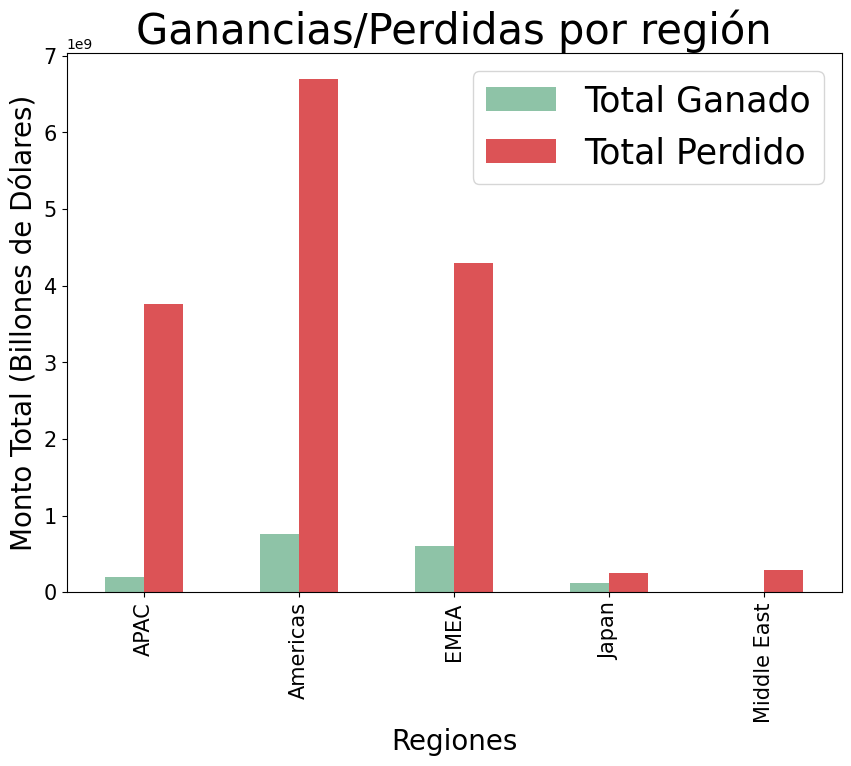

In [ ]:
grafico = mejorPorRegion.reset_index().plot.bar(x='Region',figsize=(10,7), fontsize = 15,color=['#8EC3A7','#DC5356'])
grafico.set_xlabel('Regiones', fontsize = 20)
grafico.set_ylabel('Monto Total (Billones de Dólares)', fontsize = 20)
grafico.set_title(label='Ganancias/Perdidas por región', fontsize=30)
grafico.legend(prop={'size': 25})

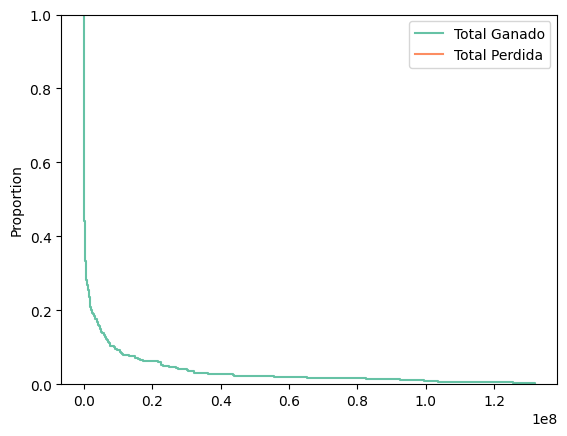

In [ ]:
f=sns.ecdfplot(data=regioneAmerica,hue_order=['Total Ganado','Total Perdida'], palette='Set2',complementary=True)

# Analisis por ganancias en ventas por región, buscando la familia de productos lider del mercado de cada región

In [ ]:
agrupadosPorRegion.xs('EMEA').nlargest(10,'Total Ganado')

,Total Perdido,Total Ganado
Product_Family,,
Product_Family_77,8.109571e+08,1.254283e+08
Product_Family_85,5.491371e+08,9.231383e+07
Product_Family_100,3.944857e+08,6.521790e+07
Product_Family_133,8.198935e+07,5.569957e+07
Product_Family_128,3.931072e+07,3.579982e+07
Product_Family_109,1.469777e+08,2.765671e+07
Product_Family_132,1.892527e+08,2.691658e+07
Product_Family_139,5.604506e+07,2.329170e+07
Product_Family_140,3.563449e+07,2.250956e+07


In [ ]:
agrupadosPorRegion.xs('APAC').nlargest(10,'Total Ganado')

,Total Perdido,Total Ganado
Product_Family,,
Product_Family_164,2.071092e+08,2.167052e+07
Product_Family_212,1.439254e+08,1.636522e+07
Product_Family_77,1.613342e+08,1.570801e+07
Product_Family_132,1.818656e+07,1.495020e+07
Product_Family_170,5.186410e+08,1.320927e+07
Product_Family_208,1.062980e+08,1.143628e+07
Product_Family_133,3.813263e+06,1.069900e+07
Product_Family_115,9.707601e+06,7.674942e+06
Product_Family_73,2.262360e+07,7.541002e+06


In [ ]:
agrupadosPorRegion.xs('Americas').nlargest(10,'Total Ganado')

,Total Perdido,Total Ganado
Product_Family,,
Product_Family_80,NaN,1.318497e+08
Product_Family_164,2.143489e+09,1.035149e+08
Product_Family_133,1.103968e+08,9.942255e+07
Product_Family_158,4.195415e+08,8.258257e+07
Product_Family_208,3.179553e+08,4.402156e+07
Product_Family_209,6.940100e+08,4.349846e+07
Product_Family_212,3.324731e+08,3.227831e+07
Product_Family_116,5.001307e+07,3.207506e+07
Product_Family_128,2.041217e+07,3.043962e+07


In [ ]:
agrupadosPorRegion.xs('Japan').nlargest(10,'Total Ganado')

,Total Perdido,Total Ganado
Product_Family,,
Product_Family_77,1.572539e+07,3.645366e+07
Product_Family_132,8.360058e+07,2.504486e+07
Product_Family_111,8.199510e+05,8.749712e+06
Product_Family_246,NaN,7.726305e+06
Product_Family_116,7.402537e+05,7.431055e+06
Product_Family_115,3.628773e+06,7.413207e+06
Product_Family_85,1.689430e+06,5.048866e+06
Product_Family_125,2.449183e+06,4.620428e+06
Product_Family_73,1.541092e+06,3.945163e+06


In [ ]:
agrupadosPorRegion.xs('Middle East').nlargest(10,'Total Ganado')

,Total Perdido,Total Ganado
Product_Family,,
Product_Family_170,8732547.20,1350963.20
Product_Family_187,621274.50,437580.00
Product_Family_202,443190.00,407466.20
Product_Family_215,2547959.25,367355.78
Product_Family_203,1622524.20,241709.40
Product_Family_173,2077790.00,221880.75
Product_Family_140,210630.00,210630.00
Product_Family_100,3879454.50,204120.00
Product_Family_216,NaN,185565.60


La visualizacion de estos datos (tablas) se pueden ver en el siguiente [enlace](https://infogram.com/pictoral-chart-1h7j4dvzdopkd4n)

Text(0.5, 1.0, '')

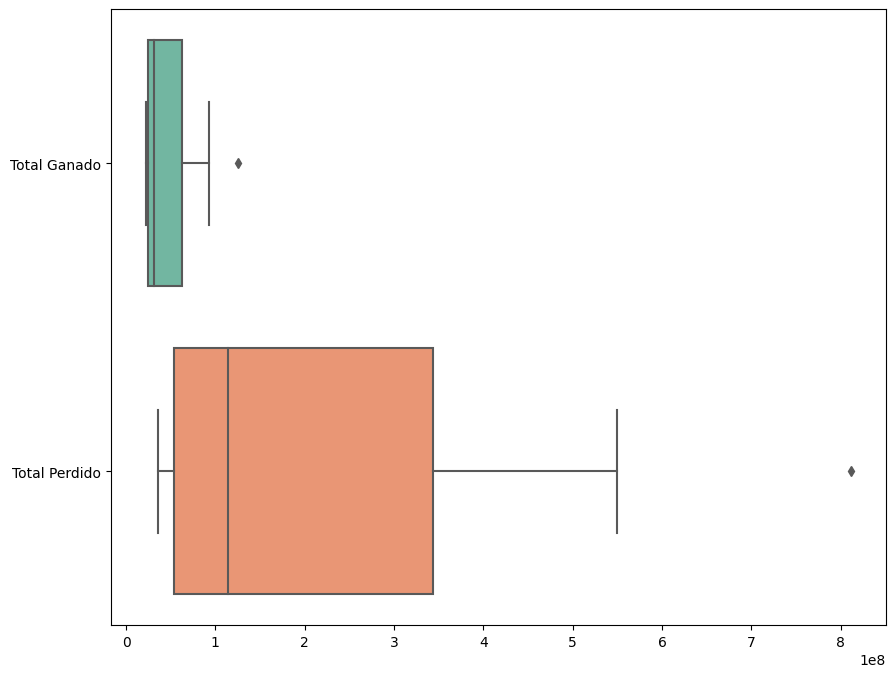

In [ ]:
g=sns.boxplot(data=agrupadosPorRegion.xs('EMEA').nlargest(10,'Total Ganado'), orient='h', palette='Set2', order=['Total Ganado','Total Perdido'])
g.figure.set_size_inches(10,8)
g.set_title(label='')

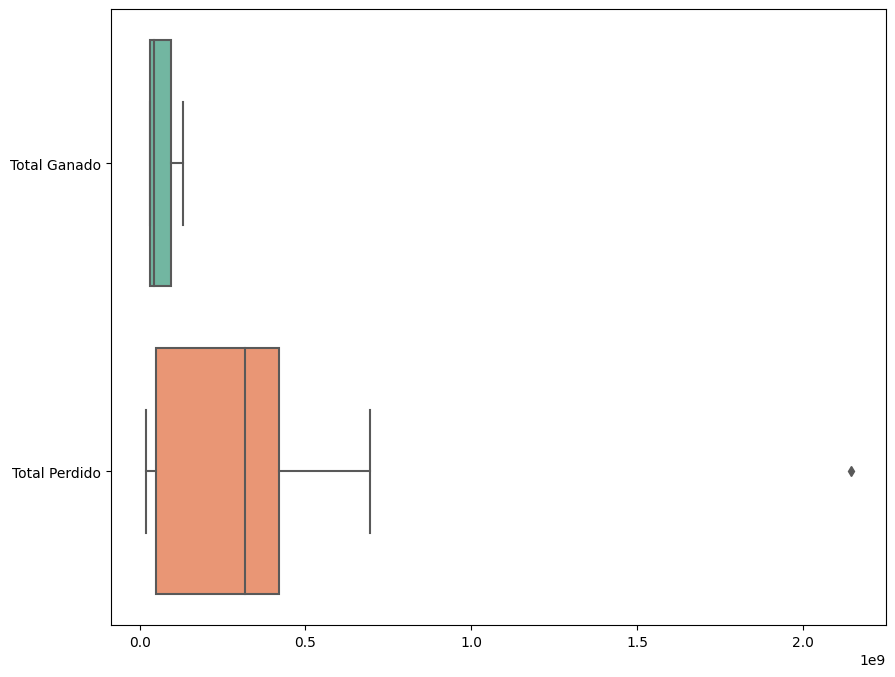

In [ ]:
g=sns.boxplot(data=agrupadosPorRegion.xs('Americas').nlargest(10,'Total Ganado'), orient='h', palette='Set2', order=['Total Ganado','Total Perdido'])
g.figure.set_size_inches(10,8)

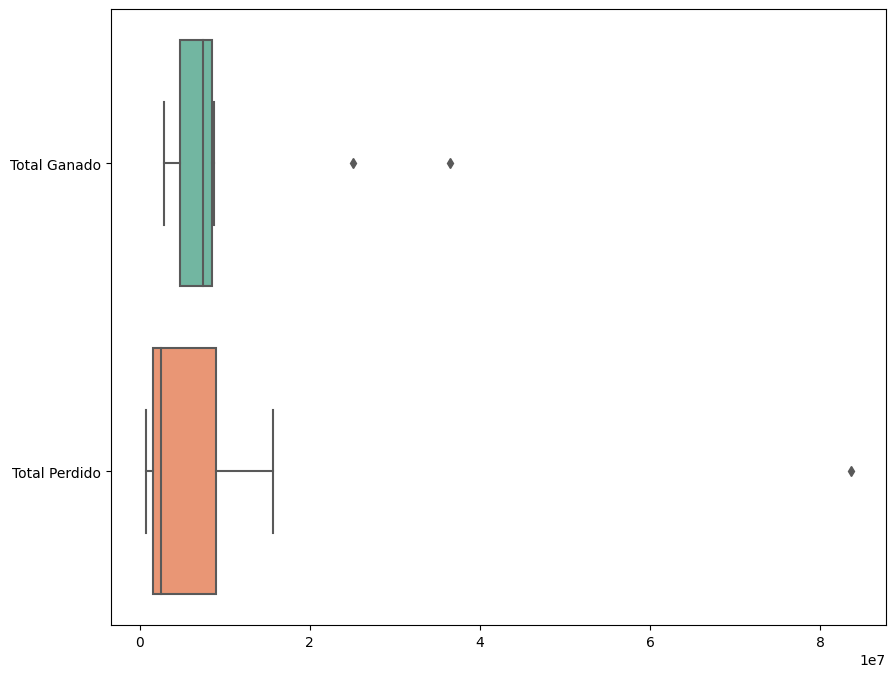

In [ ]:
g=sns.boxplot(data=agrupadosPorRegion.xs('Japan').nlargest(10,'Total Ganado'), orient='h', palette='Set2', order=['Total Ganado','Total Perdido'])
g.figure.set_size_inches(10,8)

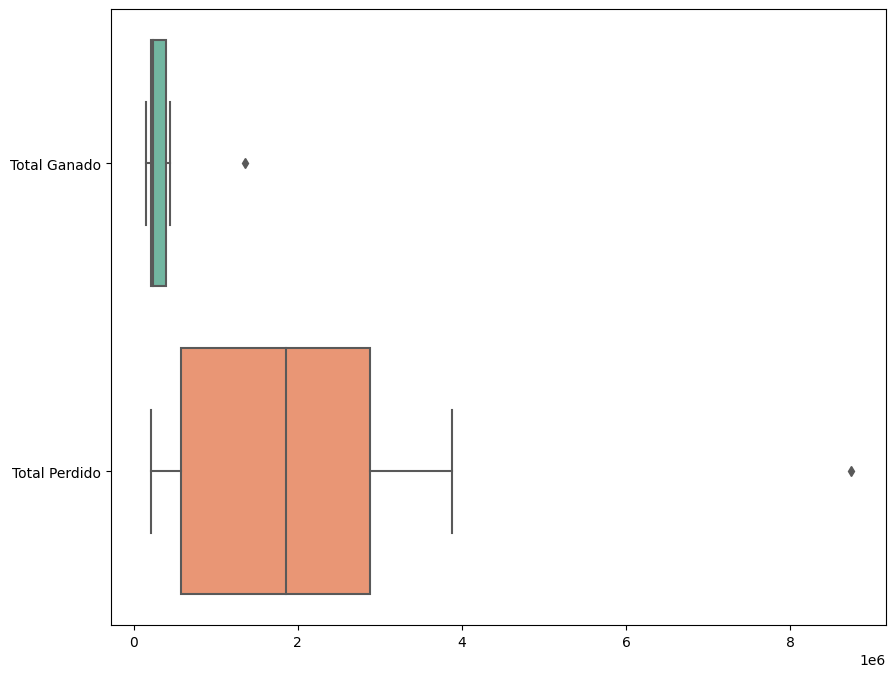

In [ ]:
g=sns.boxplot(data=agrupadosPorRegion.xs('Middle East').nlargest(10,'Total Ganado'), orient='h', palette='Set2', order=['Total Ganado','Total Perdido'])
g.figure.set_size_inches(10,8)

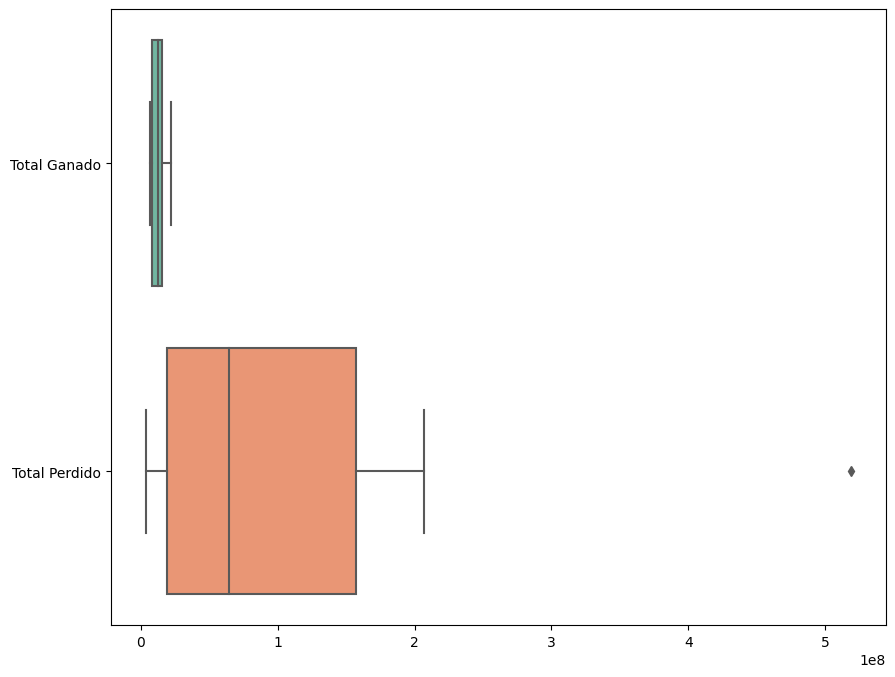

In [ ]:
g=sns.boxplot(data=agrupadosPorRegion.xs('APAC').nlargest(10,'Total Ganado'), orient='h', palette='Set2', order=['Total Ganado','Total Perdido'])
g.figure.set_size_inches(10,8)

# Analisis por cantidad de ventas por region para buscar la familia de productos con mas ventas

In [ ]:
agrupadosPorRegion2 = df_frio_frio.groupby(['Region','Product_Family','Stage']).agg({'USD_Total_Amount':'count'}).unstack()
agrupadosPorRegion2.columns=['Total Ventas Fracasadas','Total Ventas Exitosas','Negotiation_Total_Amount','Proposal_Total_Amount','Qualification_Total_Amount']
agrupadosPorRegion2= agrupadosPorRegion2[['Total Ventas Fracasadas','Total Ventas Exitosas']]
agrupadosPorRegion2

Total Ventas Fracasadas  Total Ventas Exitosas
Region      Product_Family                                                    
APAC        Product_Family_0                          0                      0
            Product_Family_1                          0                      0
            Product_Family_10                         0                      0
            Product_Family_100                       36                     51
            Product_Family_101                        1                      3
...                                                 ...                    ...
Middle East Product_Family_98                         1                      0
            Product_Family_99                         0                      0
            Product_Family_159                        0                      0
            Product_Family_239                        0                      0
            Product_Family_245                        0                      0

[1135 rows x 2 columns]

In [ ]:
regionesCantidad=agrupadosPorRegion2[['Total Ventas Fracasadas','Total Ventas Exitosas']]
regionesCantidad =regionesCantidad[(regionesCantidad['Total Ventas Fracasadas']>0) | (regionesCantidad['Total Ventas Exitosas']>0)]
regionesCantidad

Total Ventas Fracasadas  Total Ventas Exitosas
Region      Product_Family                                                    
APAC        Product_Family_100                       36                     51
            Product_Family_101                        1                      3
            Product_Family_102                        1                      1
            Product_Family_104                        0                      1
            Product_Family_106                        0                      1
...                                                 ...                    ...
Middle East Product_Family_79                         1                      0
            Product_Family_85                         3                      1
            Product_Family_92                         0                      1
            Product_Family_94                         1                      0
            Product_Family_98                         1                      0

[473 rows x 2 columns]

Text(0.5, 1.0, 'Histograma')

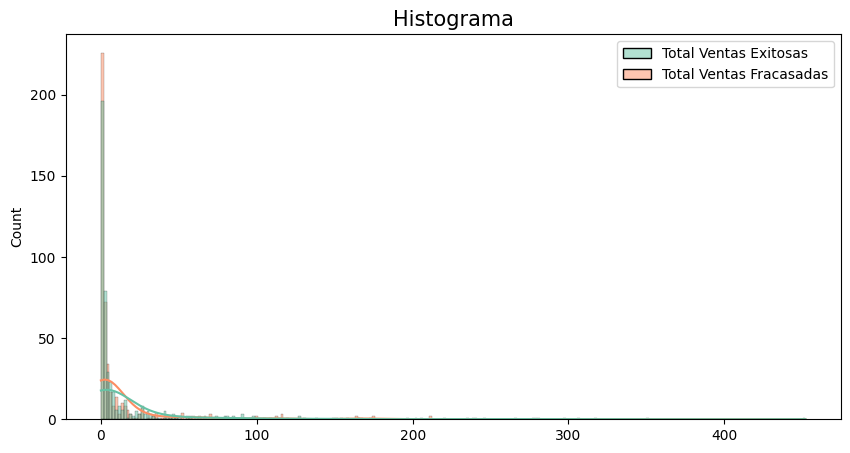

In [ ]:
r=sns.histplot(data=regionesCantidad.reset_index(),palette='Set2', kde=True,hue_order=['Total Ventas Exitosas','Total Ventas Fracasadas'])
r.figure.set_size_inches(10,5)
r.set_title(label='Histograma',fontsize=15)

In [ ]:
regionesCantidad.xs('Americas').nlargest(10,'Total Ventas Exitosas')

,Total Ventas Fracasadas,Total Ventas Exitosas
Product_Family,,
Product_Family_133,211,452
Product_Family_29,202,130
Product_Family_212,158,127
Product_Family_116,35,91
Product_Family_208,164,86
Product_Family_128,53,85
Product_Family_164,174,81
Product_Family_193,112,73
Product_Family_209,166,66


In [ ]:
regionesCantidad.xs('APAC').nlargest(10,'Total Ventas Exitosas')

,Total Ventas Fracasadas,Total Ventas Exitosas
Product_Family,,
Product_Family_132,45,151
Product_Family_133,26,149
Product_Family_212,164,127
Product_Family_77,99,120
Product_Family_115,27,97
Product_Family_140,56,97
Product_Family_208,100,81
Product_Family_128,10,62
Product_Family_100,36,51


In [ ]:
regionesCantidad.xs('EMEA').nlargest(10,'Total Ventas Exitosas')

,Total Ventas Fracasadas,Total Ventas Exitosas
Product_Family,,
Product_Family_133,93,318
Product_Family_100,241,239
Product_Family_77,277,236
Product_Family_85,211,220
Product_Family_109,175,206
Product_Family_128,67,155
Product_Family_140,60,138
Product_Family_116,49,114
Product_Family_115,71,91


In [ ]:
regionesCantidad.xs('Middle East').nlargest(10,'Total Ventas Exitosas')

,Total Ventas Fracasadas,Total Ventas Exitosas
Product_Family,,
Product_Family_187,5,6
Product_Family_203,6,5
Product_Family_215,13,5
Product_Family_198,1,4
Product_Family_204,0,3
Product_Family_109,4,2
Product_Family_114,0,2
Product_Family_115,6,2
Product_Family_170,5,2


In [ ]:
regionesCantidad.xs('Japan').nlargest(10,'Total Ventas Exitosas')

,Total Ventas Fracasadas,Total Ventas Exitosas
Product_Family,,
Product_Family_226,173,351
Product_Family_4,167,307
Product_Family_77,281,298
Product_Family_230,71,279
Product_Family_132,116,267
Product_Family_20,19,246
Product_Family_115,46,197
Product_Family_24,2,165
Product_Family_0,69,96


# La visualizacion de estas tablas se pueden apreciar en el siguiente link [Ver enlace](https://infogram.com/pictoral-chart-1hxr4zxp3gqy56y)

Analisis de cantidad de ventas por producto

In [ ]:
appearence_by_product = df_frio_frio.groupby('Product_Name').agg({'ID': 'count'}).rename(columns={'ID':'Appearences'})

In [ ]:
won_by_product = df_frio_frio[df_frio_frio['Stage'] == 'Closed Won'].groupby('Product_Name').agg({'ID':'count'})\
.rename(columns={'ID':'Won'})
won_by_product.sort_values(by='Won',ascending=False).head(5)

,Won
Product_Name,
Product_Name_226,677
Product_Name_100,575
Product_Name_231,432
Product_Name_192,367
Product_Name_491,351


In [ ]:
lost_by_product = df_frio_frio[df_frio_frio['Stage'] == 'Closed Lost'].groupby('Product_Name').agg({'ID':'count'})\
.rename(columns={'ID':'Lost'})
lost_by_product.sort_values(by='Lost',ascending=False).head(5)

,Lost
Product_Name,
Product_Name_100,401
Product_Name_29,203
Product_Name_491,173
Product_Name_4,167
Product_Name_226,159


In [ ]:
won_lost_by_product = pd.merge(won_by_product, lost_by_product, on='Product_Name')
won_lost_by_product['Win_Percentage'] = won_lost_by_product['Won']/(won_lost_by_product['Lost']+won_lost_by_product['Won'])*100
won_lost_by_product.sort_values(by='Win_Percentage',ascending=False).head(5)

,Won,Lost,Win_Percentage
Product_Name,,,
Product_Name_275,1,0,100.0
Product_Name_304,2,0,100.0
Product_Name_387,6,0,100.0
Product_Name_60,1,0,100.0
Product_Name_39,1,0,100.0


Se repite el analisis, pero solo teniendo en cuenta aquellos productos que tienen mas de 20 ventas. De esta forma, se quitan aquellos productos que solo tienen 2 ventas exitosas y consiguen un 100% que no vale lo mismo que un producto que tiene mas ventas pero un peor porcentaje

In [ ]:
won_lost_by_product_50 = won_lost_by_product[(won_lost_by_product['Won']+won_lost_by_product['Lost'])>50]
top5_percentage_product = won_lost_by_product_50.sort_values(by='Win_Percentage',ascending=False).head(5).reset_index()
top5_percentage_product

,Product_Name,Won,Lost,Win_Percentage
0,Product_Name_24,165,2,98.802395
1,Product_Name_26,80,2,97.560976
2,Product_Name_61,90,4,95.744681
3,Product_Name_20,247,19,92.857143
4,Product_Name_383,83,16,83.838384


Text(0, 0.5, 'Producto')

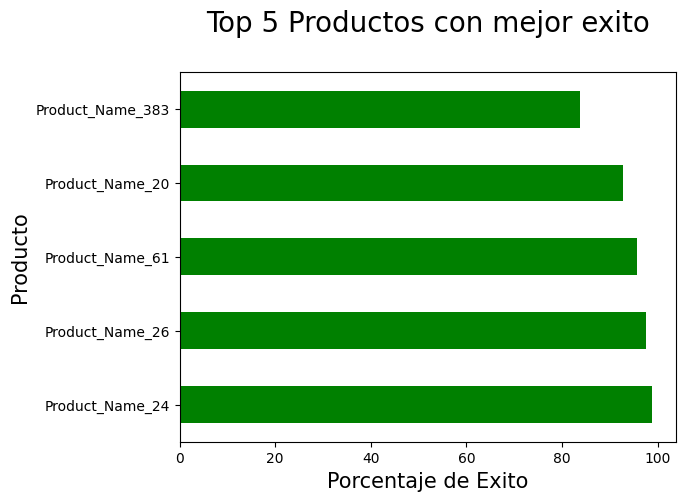

In [ ]:
ax = top5_percentage_product.plot.barh(x='Product_Name', y='Win_Percentage', color='green',\
                                      legend=False).set_title('Top 5 Productos con mejor exito\n',\
                                    size=20)
plt.xlabel('Porcentaje de Exito', size=15)
plt.ylabel('Producto', size=15)

In [ ]:
not_top5_percentage_product = won_lost_by_product_20.sort_values(by='Win_Percentage',ascending=False).tail(5).reset_index()
not_top5_percentage_product

,Product_Name,Won,Lost,Win_Percentage
0,Product_Name_97,2,51,3.773585
1,Product_Name_307,3,90,3.225806
2,Product_Name_451,2,77,2.531646
3,Product_Name_432,1,108,0.917431
4,Product_Name_445,1,114,0.869565


Text(0, 0.5, 'Porcentaje de Exito')

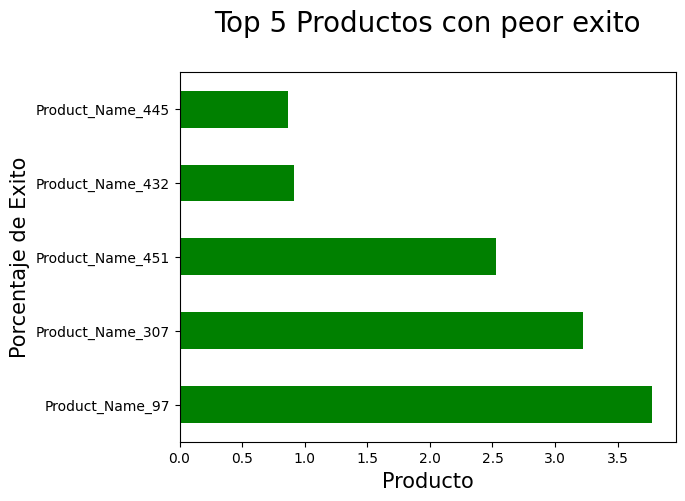

In [ ]:
ax = not_top5_percentage_product.plot.barh(x='Product_Name', y='Win_Percentage', color='green',\
                                      legend=False).set_title('Top 5 Productos con peor exito\n',\
                                    size=20)
plt.xlabel('Producto', size=15)
plt.ylabel('Porcentaje de Exito', size=15)

In [ ]:
top5_product = won_by_product.sort_values(by='Won',ascending=False).head(5).reset_index()
top5_product

,Product_Name,Won
0,Product_Name_226,677
1,Product_Name_100,575
2,Product_Name_231,432
3,Product_Name_192,367
4,Product_Name_491,351


Text(0.5, 0, 'Cantidad de Exitos')

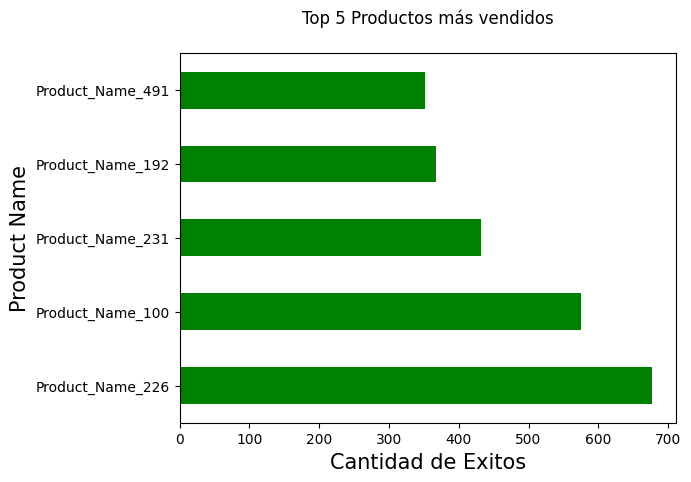

In [ ]:
ax = top5_product.plot.barh(x='Product_Name', y='Won', color='green',\
                                      legend=False).set_title('Top 5 Productos más vendidos\n')
plt.ylabel('Product Name', size=15)
plt.xlabel('Cantidad de Exitos', size=15)

In [ ]:
product_and_family = df_frio_frio[['Product_Name', 'Product_Family']].drop_duplicates()
product_and_family[(product_and_family['Product_Name'] == 'Product_Name_100') |\
                  (product_and_family['Product_Name'] == 'Product_Name_491') |\
                  (product_and_family['Product_Name'] == 'Product_Name_192') |\
                  (product_and_family['Product_Name'] == 'Product_Name_231') |\
                  (product_and_family['Product_Name'] == 'Product_Name_226')]

,Product_Name,Product_Family
1,Product_Name_100,Product_Family_77
10,Product_Name_491,Product_Family_226
77,Product_Name_192,Product_Family_115
581,Product_Name_231,Product_Family_132
772,Product_Name_226,Product_Family_133


Veremos el impacto de los distintos climas al rendimiento de la empresa Frío Frío

In [ ]:
df_vtas_ganadas = df_frio_frio[df_frio_frio['Stage'] == 'Closed Won']

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "AMERICAS" (AMÉRICA DEL NORTE)
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño
# Por mes: https://www.visittheusa.co/info/tiempo-y-estaciones-del-ano

Text(0, 0.5, 'Cantidad vendida')

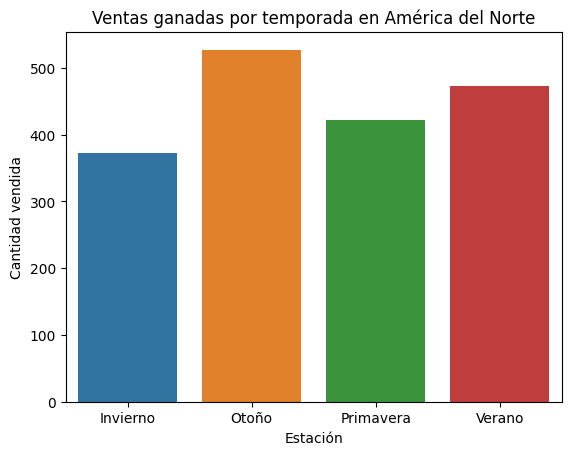

In [ ]:
ventas_americas_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'Americas', ['Month', 'Stage', 'USD_Total_Amount']]
# ventas_americas_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
# ventas_americas_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'],\
#                                                     ['Invierno', 'Primavera', 'Verano', 'Otoño'], inplace = True)
ventas_americas_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                         ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                         'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_americas_ganadas.columns = ['Estación', 'Stage', 'USD_Total_Amount']
ventas_prom_precios_por_estacion_america = ventas_americas_ganadas.groupby('Estación')\
                                                                  .agg({'Stage' : 'count', 'USD_Total_Amount' : 'mean'})
ventas_prom_precios_por_estacion_america.reset_index(inplace = True)

g = sns.barplot(x=ventas_prom_precios_por_estacion_america['Estación'], y=ventas_prom_precios_por_estacion_america['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en América del Norte')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

Text(0, 0.5, 'Promedio de los precios')

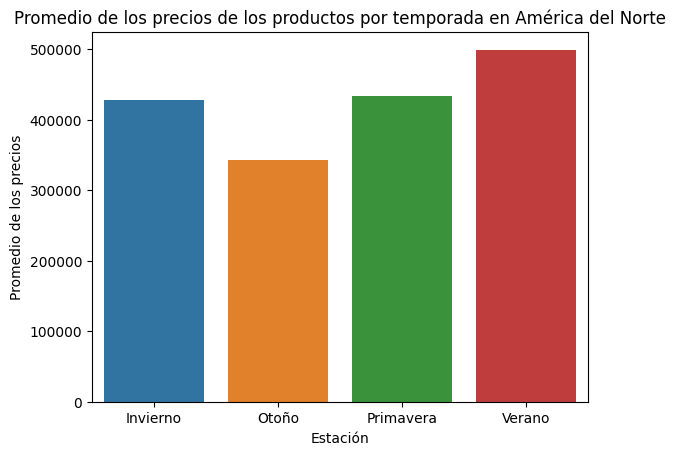

In [ ]:
g2 = sns.barplot(x=ventas_prom_precios_por_estacion_america['Estación'], y=ventas_prom_precios_por_estacion_america['USD_Total_Amount'], orient='v')
g2.set_title('Promedio de los precios de los productos por temporada en América del Norte')
g2.set_xlabel('Estación')
g2.set_ylabel('Promedio de los precios')

In [ ]:
ventas_prom_precios_por_estacion_america['USD_Total_Amount'] = ventas_prom_precios_por_estacion_america['USD_Total_Amount'] / 1000

In [ ]:
trace1  = go.Scatter(
        mode='lines+markers',
        x = ventas_prom_precios_por_estacion_america['Estación'],
        y = ventas_prom_precios_por_estacion_america['USD_Total_Amount'],
        name="‰ de precio promedio (eje y derecha)",
        marker_color='#de4c8a'
    )

trace2 = go.Bar(
        x = ventas_prom_precios_por_estacion_america['Estación'],
        y = ventas_prom_precios_por_estacion_america['Stage'],
        name="Cantidad de productos vendidos (eje y izquierda)",
        yaxis='y2',
        marker_color ='#23ebc3',
        marker_line_width=1.5,
        marker_line_color='rgb(8,48,107)',
        opacity=0.5
    )

data = [trace1, trace2]

layout = go.Layout(
    title_text='Américas: Comparación cantidad productos vendidos vs. precio promedio por estación',
    yaxis=dict(
        range = [0, 550],
        side = 'right'
    ),
    yaxis2=dict(
        # range = [0, 1000],
        # side = 'left'
        overlaying='y',
        anchor='y3',
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-axes-double')

Américas: Acá podemos concluir que la estación del año con menores precios es Otoño, que a su vez es cuando más compras se realizan.

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "JAPAN" (JAPÓN)
# https://www.nippon.com/es/features/jg00059/#:~:text=La%20Agencia%20Nacional%20de%20Meteorolog%C3%ADa,invierno%2C%20de%20diciembre%20a%20febrero.
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño

Text(0, 0.5, 'Cantidad vendida')

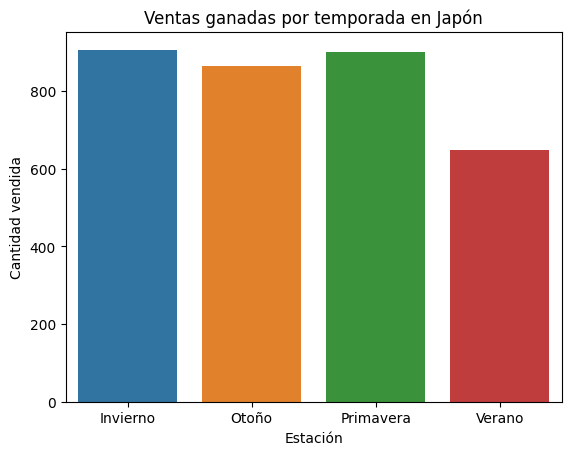

In [ ]:
ventas_japon_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'Japan', ['Month', 'Stage', 'USD_Total_Amount']]
# ventas_japon_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
ventas_japon_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                      ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                       'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_japon_ganadas.columns = ['Estación', 'Stage', 'USD_Total_Amount']
ventas_prom_precios_por_estacion_japon = ventas_japon_ganadas.groupby('Estación').agg({'Stage' : 'count', 'USD_Total_Amount' : 'mean'})
ventas_prom_precios_por_estacion_japon.reset_index(inplace = True)

g = sns.barplot(x=ventas_prom_precios_por_estacion_japon['Estación'], y=ventas_prom_precios_por_estacion_japon['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en Japón')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

Text(0, 0.5, 'Precio promedio')

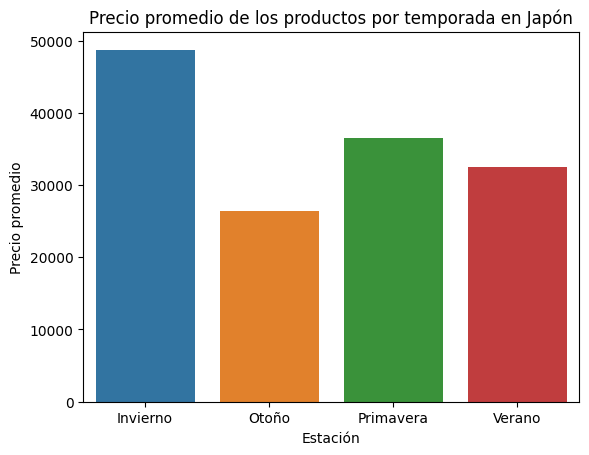

In [ ]:
g2 = sns.barplot(x=ventas_prom_precios_por_estacion_japon['Estación'], y=ventas_prom_precios_por_estacion_japon['USD_Total_Amount'], orient='v')
g2.set_title('Precio promedio de los productos por temporada en Japón')
g2.set_xlabel('Estación')
g2.set_ylabel('Precio promedio')

In [ ]:
ventas_prom_precios_por_estacion_japon['USD_Total_Amount'] = ventas_prom_precios_por_estacion_japon['USD_Total_Amount'] / 100

In [ ]:
trace1  = go.Scatter(
        mode='lines+markers',
        x = ventas_prom_precios_por_estacion_japon['Estación'],
        y = ventas_prom_precios_por_estacion_japon['USD_Total_Amount'],
        name="% de precio promedio (eje y derecha)",
        marker_color='#de4c8a'
    )

trace2 = go.Bar(
        x = ventas_prom_precios_por_estacion_japon['Estación'],
        y = ventas_prom_precios_por_estacion_japon['Stage'],
        name="Cantidad de productos vendidos (eje y izquierda)",
        yaxis='y2',
        marker_color ='#23ebc3',
        marker_line_width=1.5,
        marker_line_color='rgb(8,48,107)',
        opacity=0.5
    )

data = [trace1, trace2]

layout = go.Layout(
    title_text='Japón: Comparación cantidad productos vendidos vs. precio promedio por estación',
    yaxis=dict(
        range = [0, 950],
        side = 'right'
    ),
    yaxis2=dict(
        # range = [0, 1200],
        # side = 'left'
        overlaying='y',
        anchor='y3',
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-axes-double')

Japón: los precios converidos a dólares son muy chicos. Se puede ver que las ventas son bastante parejas, aunque la estación del año en la que menores son los precios, es también una de las estaciones con más ventas.

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "MIDDLE EAST" (JAPÓN)
# https://www.visitsaudi.com/es/understand/climate-and-seasons
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño

Text(0, 0.5, 'Cantidad vendida')

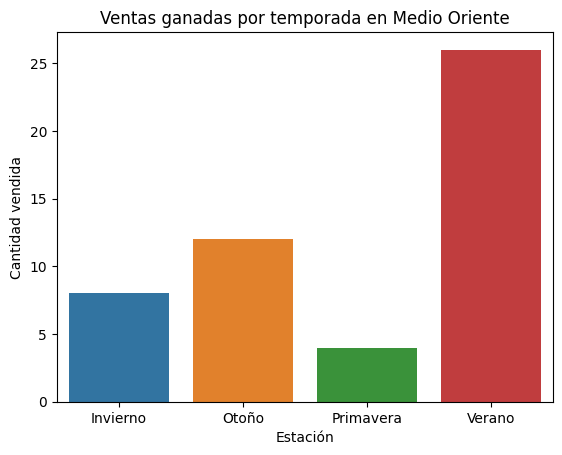

In [ ]:
ventas_mid_east_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'Middle East', ['Month', 'Stage', 'USD_Total_Amount']]
# ventas_mid_east_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
ventas_mid_east_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                          ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                            'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_mid_east_ganadas.columns = ['Estación', 'Stage', 'USD_Total_Amount']
ventas_prom_precios_por_estacion_mid_east = ventas_mid_east_ganadas.groupby('Estación').agg({'Stage' : 'count', 'USD_Total_Amount' : 'mean'})
ventas_prom_precios_por_estacion_mid_east.reset_index(inplace = True)

g = sns.barplot(x=ventas_prom_precios_por_estacion_mid_east['Estación'], y=ventas_prom_precios_por_estacion_mid_east['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en Medio Oriente')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

Text(0, 0.5, 'Precio promedio')

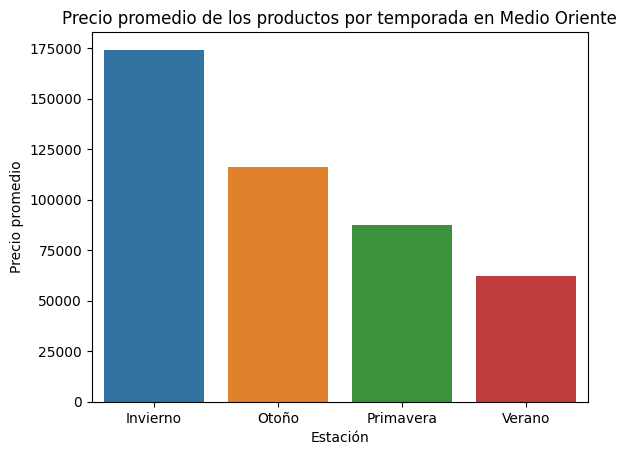

In [ ]:
g2 = sns.barplot(x=ventas_prom_precios_por_estacion_mid_east['Estación'], y=ventas_prom_precios_por_estacion_mid_east['USD_Total_Amount'], orient='v')
g2.set_title('Precio promedio de los productos por temporada en Medio Oriente')
g2.set_xlabel('Estación')
g2.set_ylabel('Precio promedio')

In [ ]:
ventas_prom_precios_por_estacion_mid_east['USD_Total_Amount'] = ventas_prom_precios_por_estacion_mid_east['USD_Total_Amount'] / 1000

In [ ]:
trace1  = go.Scatter(
        mode='lines+markers',
        x = ventas_prom_precios_por_estacion_mid_east['Estación'],
        y = ventas_prom_precios_por_estacion_mid_east['USD_Total_Amount'],
        name="‰ de precio promedio (eje y derecha)",
        marker_color='#de4c8a'
    )

trace2 = go.Bar(
        x = ventas_prom_precios_por_estacion_mid_east['Estación'],
        y = ventas_prom_precios_por_estacion_mid_east['Stage'],
        name="Cantidad de productos vendidos (eje y izquierda)",
        yaxis='y2',
        marker_color ='#23ebc3',
        marker_line_width=1.5,
        marker_line_color='rgb(8,48,107)',
        opacity=0.5
    )

data = [trace1, trace2]

layout = go.Layout(
    title_text='Medio Oriente: Comparación cantidad productos vendidos vs. precio promedio por estación',
    yaxis=dict(
        range = [0, 200],
        side = 'right'
    ),
    yaxis2=dict(
        overlaying='y',
        anchor='y3',
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-axes-double')

Medio Oriente: se puede ver claramente como el verano es la época con más ventas y al mismo tiempo la de menores precios. A su vez, el invierno es una de las estaciones con menos ventas, y con mayores precios.

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "EMEA" (Europa, Medio Oriente y Asia)
# (Son todos países del hemisferio Norte)
# Q1 ≈ invierno
# Q2 ≈ primavera
# Q3 ≈ verano
# Q4 ≈ otoño

Text(0, 0.5, 'Cantidad vendida')

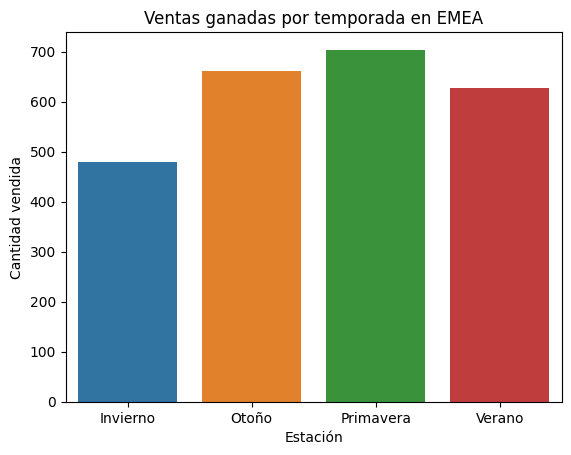

In [ ]:
ventas_emea_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'EMEA', ['Month', 'Stage', 'USD_Total_Amount']]
# ventas_emea_ganadas['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
ventas_emea_ganadas['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                      ['Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano', \
                                       'Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno'], inplace = True)
ventas_emea_ganadas.columns = ['Estación', 'Stage', 'USD_Total_Amount']
ventas_prom_precios_por_estacion_emea = ventas_emea_ganadas.groupby('Estación').agg({'Stage' : 'count', 'USD_Total_Amount' : 'mean'})
ventas_prom_precios_por_estacion_emea.reset_index(inplace = True)

g = sns.barplot(x=ventas_prom_precios_por_estacion_emea['Estación'], y=ventas_prom_precios_por_estacion_emea['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en EMEA')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

Text(0, 0.5, 'Precio promedio')

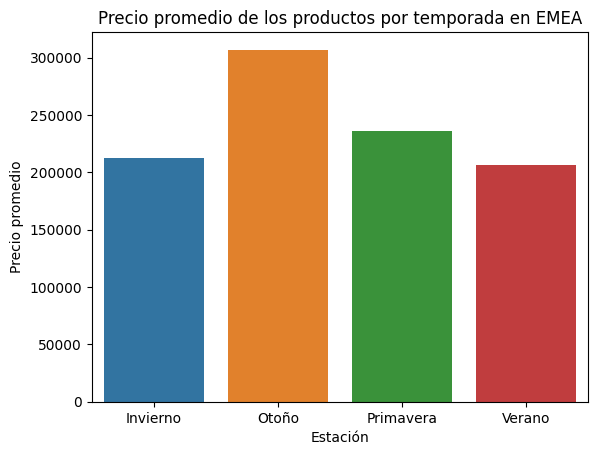

In [ ]:
g2 = sns.barplot(x=ventas_prom_precios_por_estacion_emea['Estación'], y=ventas_prom_precios_por_estacion_emea['USD_Total_Amount'], orient='v')
g2.set_title('Precio promedio de los productos por temporada en EMEA')
g2.set_xlabel('Estación')
g2.set_ylabel('Precio promedio')

In [ ]:
ventas_prom_precios_por_estacion_emea['USD_Total_Amount'] = ventas_prom_precios_por_estacion_emea['USD_Total_Amount'] / 1000

In [ ]:
trace1  = go.Scatter(
        mode='lines+markers',
        x = ventas_prom_precios_por_estacion_emea['Estación'],
        y = ventas_prom_precios_por_estacion_emea['USD_Total_Amount'],
        name="‰ de precio promedio (eje y derecha)",
        marker_color='#de4c8a'
    )

trace2 = go.Bar(
        x = ventas_prom_precios_por_estacion_emea['Estación'],
        y = ventas_prom_precios_por_estacion_emea['Stage'],
        name="Cantidad de productos vendidos (eje y izquierda)",
        yaxis='y2',
        marker_color ='#23ebc3',
        marker_line_width=1.5,
        marker_line_color='rgb(8,48,107)',
        opacity=0.5
    )

data = [trace1, trace2]

layout = go.Layout(
    title_text='EMEA: Comparación cantidad productos vendidos vs. precio promedio por estación',
    yaxis=dict(
        range = [0, 350],
        side = 'right'
    ),
    yaxis2=dict(
        overlaying='y',
        anchor='y3',
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-axes-double')

EMEA: contario a lo visto antes, la estación con menos ventas es también una de las que menores recios tienen. Igualmente se ve que los precios (sacando Otoño) son parejos.

In [ ]:
# AHORA VOY A VER CÓMO AFECTA EL CLIMA A LAS VENTAS EN LA REGIÓN "APAC" (Asia - Pacífico)
# Todos los países están cerca del Ecuador, menos China y Corea del Sur (Norte) y Australia y Nueva Zelanda (Sur).

In [ ]:
# Veo cuánto influyen China y Corea del Sur en el total de ventas ganadas de APAC
ventas_apac_ganadas = df_vtas_ganadas.loc[df_vtas_ganadas['Region'] == 'APAC', ['Territory', 'Month', 'Stage', 'USD_Total_Amount']]
china_y_corea_sur = ventas_apac_ganadas[(ventas_apac_ganadas['Territory'] == 'China (PRC)')\
                                        | (ventas_apac_ganadas['Territory'] == 'South Korea')]
print(len(china_y_corea_sur) / len(ventas_apac_ganadas))

# Veo cuánto influyen Australia y Nueva Zelanda en el total de ventas ganadas de APAC
australia_y_n_zelanda = ventas_apac_ganadas[(ventas_apac_ganadas['Territory'] == 'Australia')\
                                            | (ventas_apac_ganadas['Territory'] == 'New Zealand')]
print(len(australia_y_n_zelanda) / len(ventas_apac_ganadas))

# Veo cuánto influyen los otros territorios en el total de ventas ganadas de APAC
sudeste_asiatico = ventas_apac_ganadas[(ventas_apac_ganadas['Territory'] != 'Australia')\
                                        & (ventas_apac_ganadas['Territory'] != 'New Zealand')\
                                        & (ventas_apac_ganadas['Territory'] != 'China (PRC)')\
                                        & (ventas_apac_ganadas['Territory'] != 'South Korea')]
print(len(sudeste_asiatico) / len(ventas_apac_ganadas))

0.11286919831223628
0.38343881856540085
0.5036919831223629


In [ ]:
# La región de APAC se puede dividir en tres:
#     * Norte (11.29%): China y Corea del Sur               Se descarta por ser menos del 15%
#     * Sur (38.34%): Australia y Nueva Zelanda
#     * Sudeste asiático (50.37%): Países cerca del Ecuador

In [ ]:
# sudeste_asiatico['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
sudeste_asiatico['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                  ['Invierno', 'Invierno', 'Verano', 'Verano', 'Verano', 'Monzones (lluvias)', 'Monzones (lluvias)',\
                                   'Monzones (lluvias)', 'Monzones (lluvias)', 'Monzones (lluvias)', 'Invierno', 'Invierno'], inplace = True)
del sudeste_asiatico['Territory']
sudeste_asiatico.columns = ['Estación', 'Stage', 'USD_Total_Amount']
ventas_prom_precios_por_estacion_sud_asia = sudeste_asiatico.groupby('Estación').agg({'Stage' : 'count', 'USD_Total_Amount' : 'mean'})
ventas_prom_precios_por_estacion_sud_asia.reset_index(inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Cantidad vendida')

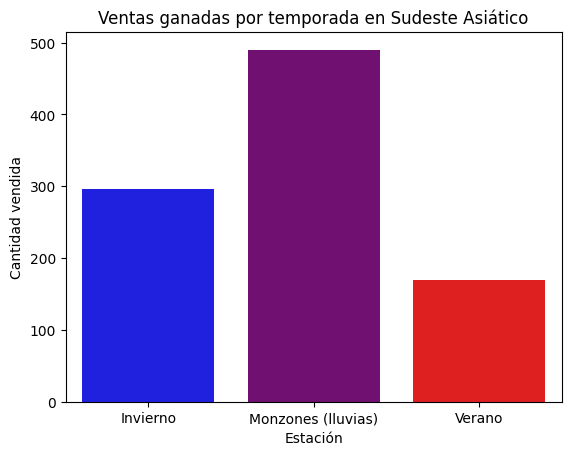

In [ ]:
g = sns.barplot(x=ventas_prom_precios_por_estacion_sud_asia['Estación'], y=ventas_prom_precios_por_estacion_sud_asia['Stage'],\
                orient='v', palette=['blue', 'purple', 'red']) #'#035485', '#742C98', '#B5240D'
g.set_title('Ventas ganadas por temporada en Sudeste Asiático')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

Text(0, 0.5, 'Precio promedio')

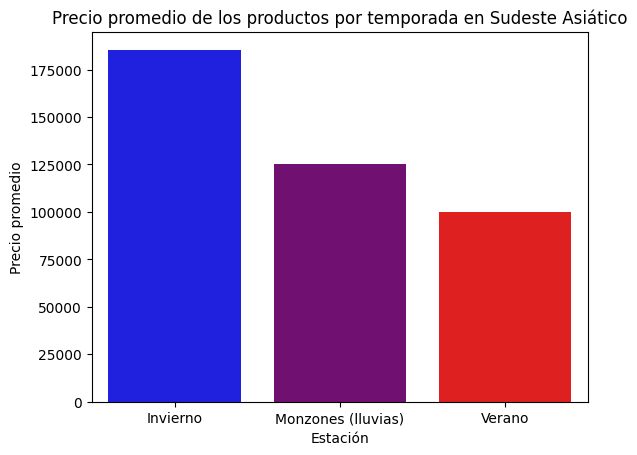

In [ ]:
g2 = sns.barplot(x=ventas_prom_precios_por_estacion_sud_asia['Estación'], y=ventas_prom_precios_por_estacion_sud_asia['USD_Total_Amount'],\
                 orient='v', palette=['blue', 'purple', 'red'])
g2.set_title('Precio promedio de los productos por temporada en Sudeste Asiático')
g2.set_xlabel('Estación')
g2.set_ylabel('Precio promedio')

In [ ]:
ventas_prom_precios_por_estacion_sud_asia['USD_Total_Amount'] = ventas_prom_precios_por_estacion_sud_asia['USD_Total_Amount'] / 1000

In [ ]:
trace1  = go.Scatter(
        mode='lines+markers',
        x = ventas_prom_precios_por_estacion_sud_asia['Estación'],
        y = ventas_prom_precios_por_estacion_sud_asia['USD_Total_Amount'],
        name="‰ de precio promedio (eje y derecha)",
        marker_color='#de4c8a'
    )

trace2 = go.Bar(
        x = ventas_prom_precios_por_estacion_sud_asia['Estación'],
        y = ventas_prom_precios_por_estacion_sud_asia['Stage'],
        name="Cantidad de productos vendidos (eje y izquierda)",
        yaxis='y2',
        marker_color ='#23ebc3',
        marker_line_width=1.5,
        marker_line_color='rgb(8,48,107)',
        opacity=0.5
    )

data = [trace1, trace2]

layout = go.Layout(
    title_text='Sudeste Asiático: Comparación cantidad productos vendidos vs. precio promedio por estación',
    yaxis=dict(
        range = [0, 200],
        side = 'right'
    ),
    yaxis2=dict(
        overlaying='y',
        anchor='y3',
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-axes-double')

Sudeste asiático: la época con más ventas es la de Monzones (lluvias) que a su vez es una época con precios cercanos a los menores.
A pesar de que el Verano es la estación con precios más bajos, también es la estación con menos ventas.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Cantidad vendida')

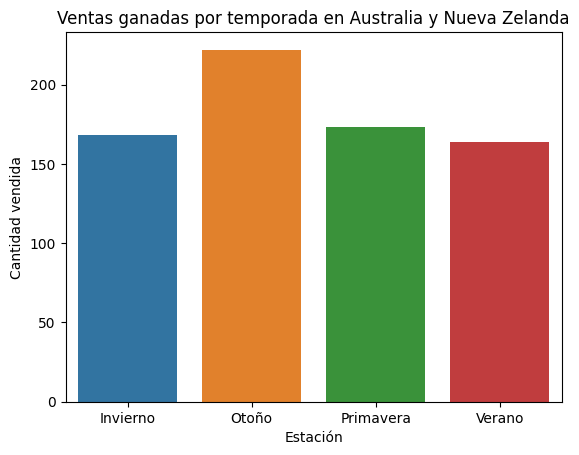

In [ ]:
# australia_y_n_zelanda['Delivery_Quarter'].replace(['Q1', 'Q2', 'Q3', 'Q4'], ['Frío', 'Calor', 'Calor', 'Frío'], inplace = True)
australia_y_n_zelanda['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],\
                                       ['Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno', 'Invierno',\
                                        'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano'], inplace = True)
del australia_y_n_zelanda['Territory']
australia_y_n_zelanda.columns = ['Estación', 'Stage', 'USD_Total_Amount']
ventas_prom_precios_por_estacion_aust_nz = australia_y_n_zelanda.groupby('Estación').agg({'Stage' : 'count', 'USD_Total_Amount' : 'mean'})
ventas_prom_precios_por_estacion_aust_nz.reset_index(inplace = True)

g = sns.barplot(x=ventas_prom_precios_por_estacion_aust_nz['Estación'], y=ventas_prom_precios_por_estacion_aust_nz['Stage'], orient='v')
g.set_title('Ventas ganadas por temporada en Australia y Nueva Zelanda')
g.set_xlabel('Estación')
g.set_ylabel('Cantidad vendida')

Text(0, 0.5, 'Precio promedio')

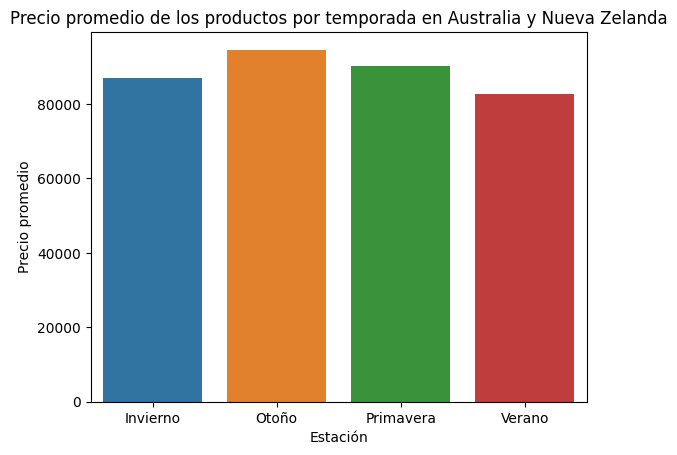

In [ ]:
g2 = sns.barplot(x=ventas_prom_precios_por_estacion_aust_nz['Estación'], y=ventas_prom_precios_por_estacion_aust_nz['USD_Total_Amount'], orient='v')
g2.set_title('Precio promedio de los productos por temporada en Australia y Nueva Zelanda')
g2.set_xlabel('Estación')
g2.set_ylabel('Precio promedio')

In [ ]:
ventas_prom_precios_por_estacion_aust_nz['USD_Total_Amount'] = ventas_prom_precios_por_estacion_aust_nz['USD_Total_Amount'] / 1000

In [ ]:
trace1  = go.Scatter(
        mode='lines+markers',
        x = ventas_prom_precios_por_estacion_aust_nz['Estación'],
        y = ventas_prom_precios_por_estacion_aust_nz['USD_Total_Amount'],
        name="‰ de precio promedio (eje y derecha)",
        marker_color='#de4c8a'
    )

trace2 = go.Bar(
        x = ventas_prom_precios_por_estacion_aust_nz['Estación'],
        y = ventas_prom_precios_por_estacion_aust_nz['Stage'],
        name="Cantidad de productos vendidos (eje y izquierda)",
        yaxis='y2',
        marker_color ='#23ebc3',
        marker_line_width=1.5,
        marker_line_color='rgb(8,48,107)',
        opacity=0.5
    )

data = [trace1, trace2]

layout = go.Layout(
    title_text='Australia y Nueva Zelanda: Comparación cantidad productos vendidos vs. precio promedio por estación',
    yaxis=dict(
        range = [0, 100],
        side = 'right'
    ),
    yaxis2=dict(
        overlaying='y',
        anchor='y3',
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-axes-double')

Australia y Nueza Zelanda: se puede ver que a lo largo del año los precios se mantienen dentro de todo parejos (entre los 80 y 100 % del precio promedio).
Contrario a lo pensado, y si bien los precios son parejos, el pico de los precios coincide con la época de mayores ventas (otoño).

Ahora haremos lo mismo pero juntando todo:

In [ ]:
ventas_prom_precios_por_estacion_america['Region'] = 'América del Norte'
ventas_prom_precios_por_estacion_japon['Region'] = 'Japón'
ventas_prom_precios_por_estacion_mid_east['Region'] = 'Medio Oriente'
ventas_prom_precios_por_estacion_emea['Region'] = 'EMEA'
ventas_prom_precios_por_estacion_sud_asia['Region'] = 'Sudeste asiático'
ventas_prom_precios_por_estacion_aust_nz['Region'] = 'Australia y Nueva Zelanda'

In [ ]:
ventas_regiones = ventas_prom_precios_por_estacion_america.append(ventas_prom_precios_por_estacion_japon)\
                                                          .append(ventas_prom_precios_por_estacion_mid_east)\
                                                          .append(ventas_prom_precios_por_estacion_emea)\
                                                          .append(ventas_prom_precios_por_estacion_aust_nz)\
                                                          .append(ventas_prom_precios_por_estacion_sud_asia)

Text(0, 0.5, 'Cantidad vendida')

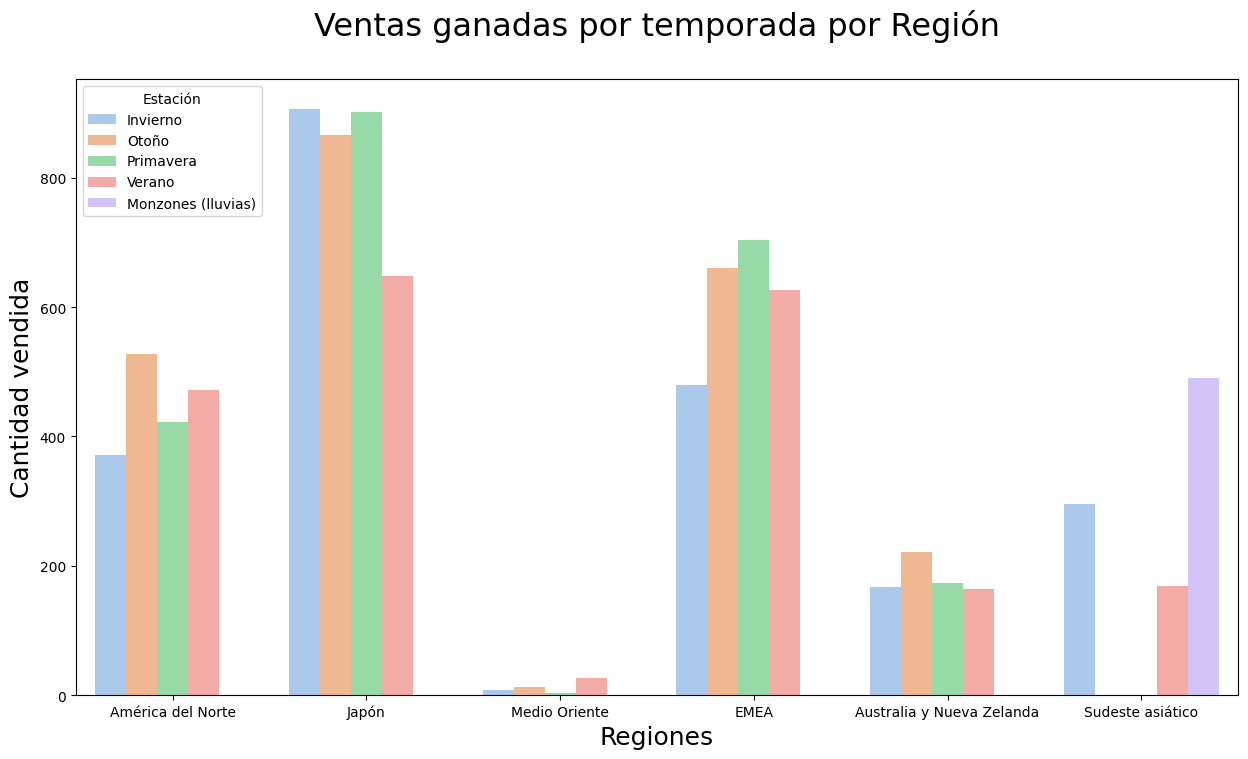

In [ ]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(x=ventas_regiones['Region'], y=ventas_regiones['Stage'], hue=ventas_regiones['Estación'], orient='v', ax=ax, palette='pastel')
g.set_title('Ventas ganadas por temporada por Región\n', fontsize = 23)
g.set_xlabel('Regiones', fontsize = 18)
g.set_ylabel('Cantidad vendida', fontsize = 18)

Text(0.5, 1.0, 'Comparación cantidad productos vendidos por estación vs. precio promedio por estación')

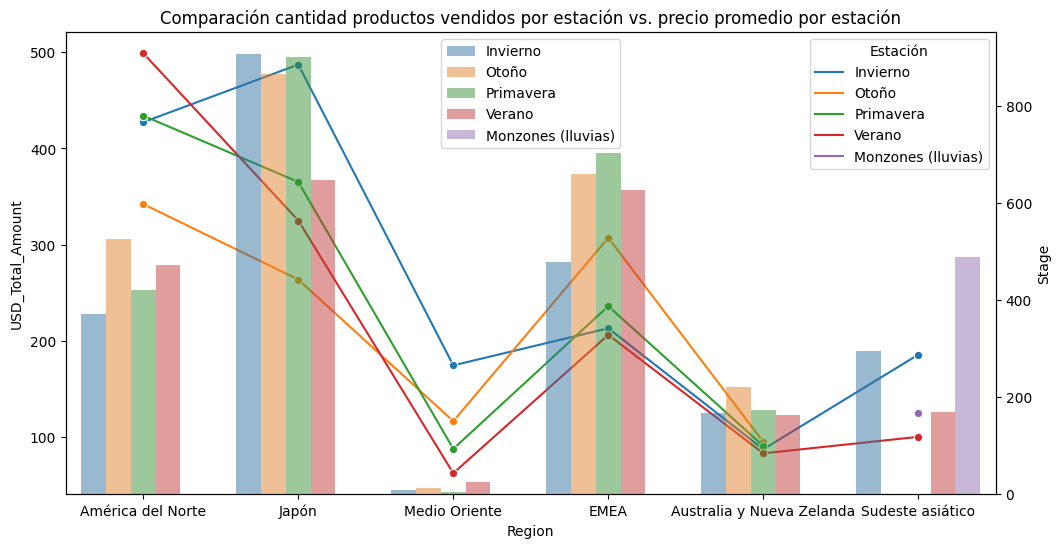

In [ ]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(x=ventas_regiones['Region'], y=ventas_regiones['USD_Total_Amount'], hue=ventas_regiones['Estación'],\
             marker='o', sort = False, ax=ax1)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2 = ax1.twinx()


g = sns.barplot(x=ventas_regiones['Region'], y=ventas_regiones['Stage'], hue=ventas_regiones['Estación'],\
                orient='v', alpha=0.5, ax=ax2)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)     #Para poner afuera el cuadrito
plt.legend(loc=0)
g.set_title('Comparación cantidad productos vendidos por estación vs. precio promedio por estación')

Mundo: 

1) Se puede ver claramente que sólo en Japón se vende más que en las otras regiones (que son conjuntos de países)

2) Ver las conclusiones individuales. Las conclusiones de cada región aplican igual acá.

Ahora trabajar con **Source**. 

Se interpreta "Source" como la fuente de la oportunidad, *siendo esta, por ejemplo, la campaña que originó la oportunidad*.

In [ ]:
df_frio_frio['Source'].value_counts()

None         9497
Source_7     2965
Source_9     1459
Source_11    1421
Source_13     786
Source_3      418
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source, dtype: int64

In [ ]:
# Reemplazamos los None por "No declarado"
df_frio_frio['Source'].replace({'None' : 'No declarado'}, inplace=True)

Ya acá se puede ver que Source_7 aporta mucha cantidad de oportunidades

In [ ]:
# vemos si cada oportunidad proviene únicamente de una sola fuente
oport_sources = df_frio_frio.groupby('Opportunity_ID').agg({'Source' : 'value_counts'})
oport_sources.columns = ['Cantidad_productos_opotunidad']
oport_sources.reset_index(inplace=True)
oport_sources['Opportunity_ID'].is_unique

True

Podemos ver que cada oportunidad proviene únicamente de una sola fuente

Veamos los porcentajes de oportunidades con sources declaradas y no declaradas que hay.

In [ ]:
cant_no_declaradas = oport_sources[oport_sources['Source'] == 'No declarado']['Source'].count()
cant_declaradas = oport_sources[oport_sources['Source'] != 'No declarado']['Source'].count()

# El gráfico de esto es el 1ero de: https://infogram.com/source-1h7z2l8pwloel6o?live

Veamos cuáles son las fuentes declaradas que más oportunidades traen

In [ ]:
# veamos cuáles son las fuentes declaradas que más oportunidades traen
oport_sources_declaradas = oport_sources[oport_sources['Source'] != 'No declarado']
cant_oportunidades_por_source = oport_sources_declaradas['Source'].value_counts().to_frame()
cant_oportunidades_por_source.columns = ['Cantidad_de_oportunidades']
cant_oportunidades_por_source = cant_oportunidades_por_source.nlargest(13, 'Cantidad_de_oportunidades')
cant_oportunidades_por_source

,Cantidad_de_oportunidades
Source_7,2069
Source_9,873
Source_11,847
Source_13,536
Source_3,305
Source_10,89
Source_1,88
Source_2,68
Source_4,32
Source_6,17


El gráfico de la tabla anterior se encuentra en el link: https://infogram.com/cantidad-de-oportunidades-por-source-1h7z2l8p7xjqy6o?live

Se puede ver que la fuente que más *oportunidades* aporta es Source_7

Ahora analizaremos los Stage para las distintas Sources

In [ ]:
# vemos si cada oportunidad tiene únicamente un solo Stage
oport_stage = df_frio_frio.groupby('Opportunity_ID').agg({'Stage' : 'value_counts'})
oport_stage.columns = ['Cant_productos_de_la_oportunidad']
oport_stage.reset_index(inplace=True)
oport_stage['Opportunity_ID'].is_unique

True

Vemos que cada oportunidad corresponde a un sólo Stage

In [ ]:
# vamos a buscar el stage de cada oportunidad
oport_source_stage = oport_sources_declaradas.merge(oport_stage, on='Opportunity_ID')

Ahora veremos la cantidad de oportunidades por Source para cada Stage

Text(0, 0.5, 'Cantidad oportunidades')

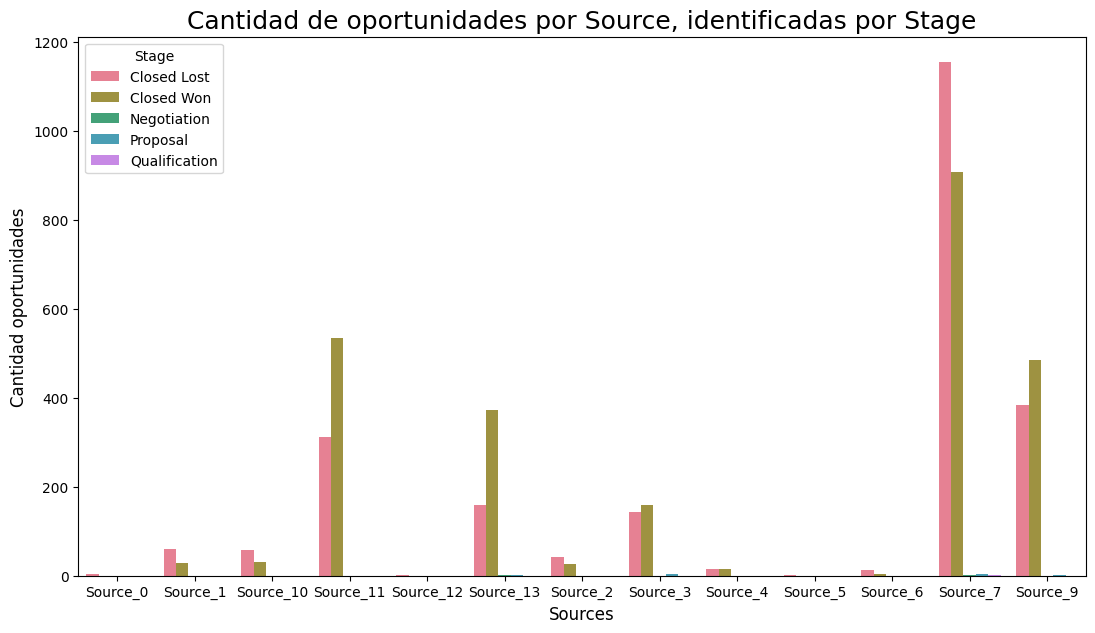

In [ ]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims)

agrupado_por_source = oport_source_stage.groupby(['Source', 'Stage']).agg({'Opportunity_ID' : 'count'})
agrupado_por_source.columns = ['Cantidad_oportunidades']
agrupado_por_source = agrupado_por_source.reset_index()

g = sns.barplot(x=agrupado_por_source['Source'], y=agrupado_por_source['Cantidad_oportunidades'], hue=agrupado_por_source['Stage'],\
                orient='v', ax=ax, palette='husl')
g.set_title('Cantidad de oportunidades por Source, identificadas por Stage', fontsize = 18)
g.set_xlabel('Sources', fontsize = 12)
g.set_ylabel('Cantidad oportunidades', fontsize = 12)

Ahora veremos si hay alguna fuente que tenga mayor cantidad de Closed Won

In [ ]:
# nos quedamos solo con las ventas Closed Won
oport_source_stage_won = oport_source_stage[oport_source_stage['Stage'] == 'Closed Won']

In [ ]:
# buscamos la cantidad de Closed Won para cada Source
cant_won_por_source = oport_source_stage_won.groupby('Source').agg({'Stage' : 'count'})
cant_won_por_source.columns = ['Cantidad_Closed_Won']
cant_won_por_source = cant_won_por_source.nlargest(10, 'Cantidad_Closed_Won')
cant_won_por_source

,Cantidad_Closed_Won
Source,
Source_7,908
Source_11,536
Source_9,486
Source_13,374
Source_3,159
Source_10,31
Source_1,28
Source_2,26
Source_4,16


El gráfico de lo anterior se encuentra en: https://infogram.com/cantidad-closed-won-por-source-1h7z2l8p7y10y6o?live

Podemos ver que por bastante diferencia, Source_7 (35.34%) es la fuente con más ventas ganadas, cuando la siguiente fuente con mayor cantidad de Closed Won es Source_11 con el 20.86%

Ahora vamos a buscar la Source declarada que más plata aporta a la empresa

In [ ]:
# vamos a buscar el precio total de cada oportunidad ganada
oport_amount = df_frio_frio.groupby('Opportunity_ID').agg({'USD_Total_Amount' : 'sum'})
oport_amount.reset_index(inplace=True)
oport_source_won_amount = oport_source_stage_won.merge(oport_amount, on='Opportunity_ID')
oport_source_won_amount = oport_source_won_amount[['Opportunity_ID', 'Source', 'USD_Total_Amount']]
oport_source_won_amount

,Opportunity_ID,Source,USD_Total_Amount
0,2,Source_7,8.386560e+04
1,7,Source_7,5.068800e+04
2,20,Source_7,1.213846e+05
3,34,Source_3,4.285809e+05
4,46,Source_7,2.474378e+06
...,...,...,...
2564,12788,Source_11,1.662508e+05
2565,12789,Source_11,1.313928e+05
2566,12797,Source_9,6.212151e+05
2567,12799,Source_9,4.717967e+05


In [ ]:
plata_aportada_por_source = oport_source_won_amount.groupby('Source').agg({'USD_Total_Amount' : 'sum'})
plata_aportada_por_source = plata_aportada_por_source.nlargest(13, 'USD_Total_Amount')
plata_aportada_por_source

,USD_Total_Amount
Source,
Source_11,3.098031e+08
Source_7,2.872102e+08
Source_9,1.342795e+08
Source_3,7.971901e+07
Source_13,3.430750e+07
Source_1,1.668291e+07
Source_10,8.030193e+06
Source_2,3.858177e+06
Source_4,3.730149e+06


El gráfico de lo anterior se puede ver en: https://infogram.com/plata-aportada-por-source-1h7j4dvzd1x0x4n?live

Ahora comparemos la cantidad de oportunidades aportadas con el dinero aportado.

In [ ]:
# Ahora comparemos la cantidad de oportunidades aportadas con el dinero aportado
# Colocamos los dataframes como necesitamos
plata_aportada_por_source = plata_aportada_por_source.reset_index()
cant_won_por_source = cant_won_por_source.reset_index()
plata_aportada_y_cant_won_por_source = plata_aportada_por_source.merge(cant_won_por_source, on='Source')

Text(0.5, 1.0, 'Comparación dinero aportado por source (línea) vs. cantidad de oportunidades ganadas por source (barras)')

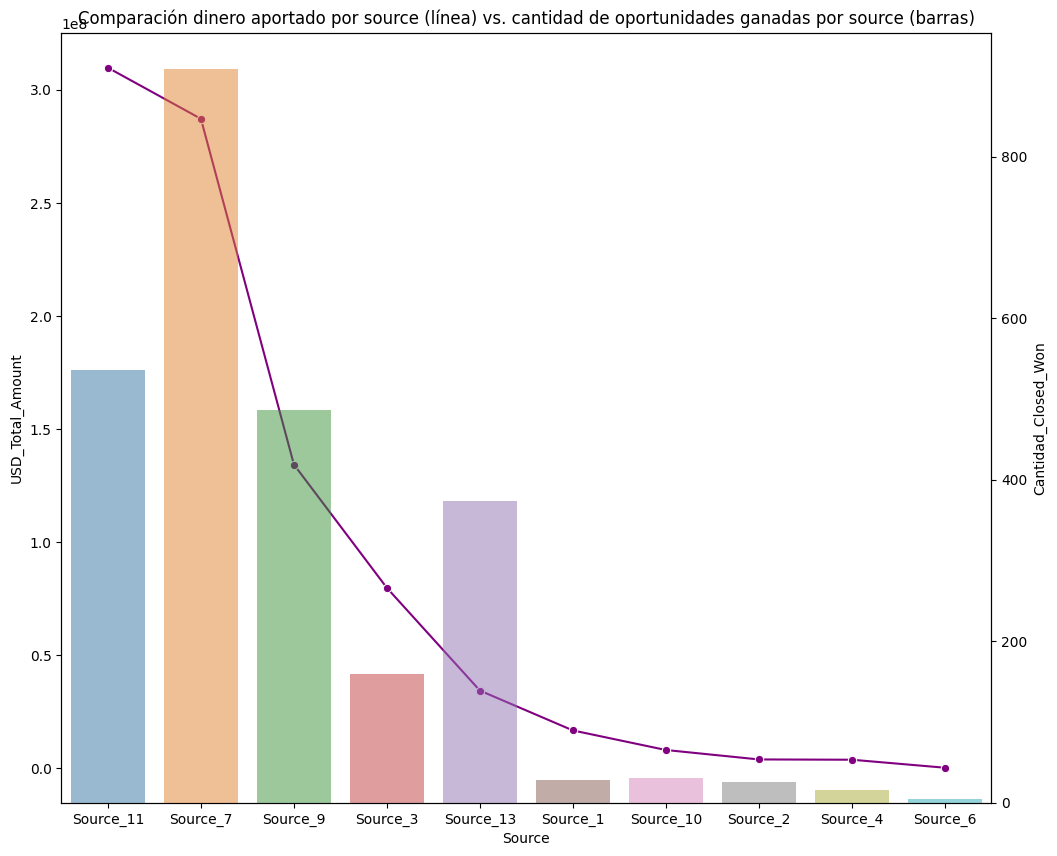

In [ ]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,10))

sns.lineplot(x=plata_aportada_y_cant_won_por_source['Source'], y=plata_aportada_y_cant_won_por_source['USD_Total_Amount'],\
             marker='o', sort = False, ax=ax1, color='purple')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2 = ax1.twinx()


g = sns.barplot(x=plata_aportada_y_cant_won_por_source['Source'], y=plata_aportada_y_cant_won_por_source['Cantidad_Closed_Won'],\
                orient='v', alpha=0.5, ax=ax2)

g.set_title('Comparación dinero aportado por source (línea) vs. cantidad de oportunidades ganadas por source (barras)')

En el gráfico anterior vemos que a pesar de que la Source_11 aporta menos cantidad de ventas ganadas, el caudal de dinero aportado es mayor, es decir que pese a ser menos ventas, aporta más plata. En cambio, Source_7 es la fuente que más aporta en cantidad de ventas Closed Won, pero no es la que más dinero aporta a la empresa.

Algo similar para con Source_3, que si bien no aporta mucha cantidad de ventas ganadas, aporta más dinero que otra fuente como Source_13, que si bien aporta mayor cantidad de ventas, también aporta menor cantidad de dinero.

Sobre las últimas fuentes del gráfico, al mismo tiempo que desciende la cantidad de oportunidades, desciende el dinero aportado.

A continuación se muestra la relación entre la cantidad de oportunidades por source y el dinero aportado por esa source (suma de los totales de oportunidades). 

Text(0, 0.5, 'Cantidad de oportunidades por source')

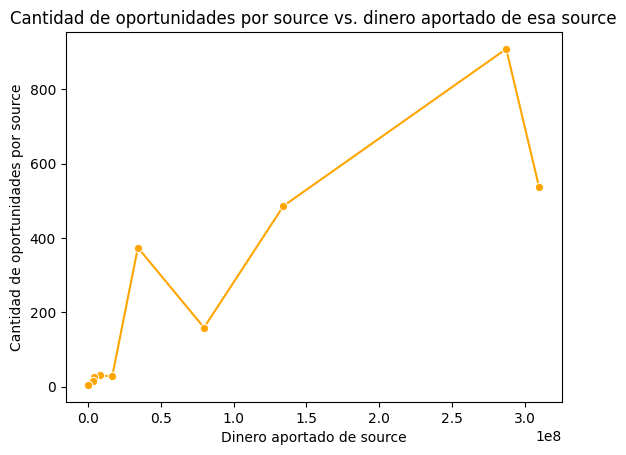

In [ ]:
g = sns.lineplot(x=plata_aportada_y_cant_won_por_source['USD_Total_Amount'], y=plata_aportada_y_cant_won_por_source['Cantidad_Closed_Won'],\
             marker='o', sort = False, color='orange')
g.set_title('Cantidad de oportunidades por source vs. dinero aportado de esa source')
g.set_xlabel('Dinero aportado de source')
g.set_ylabel('Cantidad de oportunidades por source')

Ahora analizaremos los **Account_Name**

In [ ]:
#Queremos analizar el comportamiento de los clientes, quienes son los mas frecuentes y cuales reportaron mas ganancias

df_clientes0 = df_frio_frio[['Account_Name','USD_Total_Amount','Stage']]
#filtramos lo que no nos interesa
filtro_clientes = (df_clientes0['Stage'] == "Closed Won") & (df_clientes0['USD_Total_Amount'] > 0)
df_clientes = df_clientes0[filtro_clientes].set_index('Account_Name')
df_clientes

,USD_Total_Amount,Stage
Account_Name,,
Account_Name_619,5.664614e+04,Closed Won
Account_Name_1794,8.386560e+04,Closed Won
Account_Name_1794,5.068800e+04,Closed Won
Account_Name_1147,1.621851e+06,Closed Won
Account_Name_263,1.213846e+05,Closed Won
...,...,...
Account_Name_533,4.855383e+05,Closed Won
Account_Name_533,4.717967e+05,Closed Won
Account_Name_726,1.213846e+05,Closed Won


### Vamos a analizar una serie de topicos. Queremos saber quienes son los clientes que mas le compraron a la empresa, y quienes los que mas veces compraron, y ver si estan relacionados.

In [ ]:
#¿Quienes son los 5 que compraron los productos mas caros
df_clientes.USD_Total_Amount.nlargest(5)

Account_Name
Account_Name_1723    27315253.35
Account_Name_1662    16432416.00
Account_Name_1662    15080039.00
Account_Name_1723    14519969.10
Account_Name_1662    14430065.00
Name: USD_Total_Amount, dtype: float64

In [ ]:
#queremos ver la cantidad de productos comrpados por cada cliente
df_suma_compras = df_clientes.groupby('Account_Name').agg({'Stage' : 'value_counts'})
df_suma_compras

,,Stage
Account_Name,Stage,
Account_Name_0,Closed Won,1
Account_Name_100,Closed Won,1
Account_Name_1001,Closed Won,1
Account_Name_1002,Closed Won,1
Account_Name_1006,Closed Won,2
...,...,...
Account_Name_1044,Closed Won,1
Account_Name_1175,Closed Won,5
Account_Name_405,Closed Won,1


In [ ]:
#Cuantos clientes hay
len(df_suma_compras)

664

In [ ]:
df_suma_compras.nlargest(10,'Stage')

,,Stage
Account_Name,Stage,
Account_Name_1888,Closed Won,1018
Account_Name_1836,Closed Won,795
Account_Name_25,Closed Won,539
Account_Name_1991,Closed Won,520
Account_Name_1508,Closed Won,323
Account_Name_1440,Closed Won,267
Account_Name_263,Closed Won,205
Account_Name_1642,Closed Won,204
Account_Name_931,Closed Won,203


In [ ]:
#Consideramos frecuentes a los clientes que compraron mas de 30 productos. Analizamos el comportamiento de estos ultimos
filtro_compras = df_suma_compras['Stage'] > 30
frecuentes = df_suma_compras[filtro_compras]
frecuentes_cant = frecuentes.nlargest(len(frecuentes),'Stage')
frecuentes_cant

,,Stage
Account_Name,Stage,
Account_Name_1888,Closed Won,1018
Account_Name_1836,Closed Won,795
Account_Name_25,Closed Won,539
Account_Name_1991,Closed Won,520
Account_Name_1508,Closed Won,323
Account_Name_1440,Closed Won,267
Account_Name_263,Closed Won,205
Account_Name_1642,Closed Won,204
Account_Name_931,Closed Won,203


In [ ]:
#Ahora veremos los clientes que mas ingresos en dolares le reportaron a la empresa
df_suma_precios = df_clientes.groupby('Account_Name').agg({'USD_Total_Amount' : 'sum'})
df_suma_precios

,USD_Total_Amount
Account_Name,
Account_Name_0,2.652000e+04
Account_Name_100,7.849050e+04
Account_Name_1001,1.126250e+04
Account_Name_1002,9.167424e+05
Account_Name_1006,8.136744e+05
...,...
Account_Name_1044,2.600000e+04
Account_Name_1175,4.409698e+04
Account_Name_405,5.668889e+06


In [ ]:
#Nuevamente nos quedamos con los mas frecuentes, que son los que calculamos antes
frecuentes_precio = df_suma_precios.nlargest(len(frecuentes),'USD_Total_Amount')
frecuentes_precio

,USD_Total_Amount
Account_Name,
Account_Name_25,1.817189e+08
Account_Name_1662,1.360671e+08
Account_Name_606,1.062366e+08
Account_Name_1409,9.399949e+07
Account_Name_1723,4.183522e+07
Account_Name_1378,3.519376e+07
Account_Name_492,3.234862e+07
Account_Name_827,3.175209e+07
Account_Name_1313,3.159345e+07


Text(0, 0.5, 'Cantidad de productos comprados')

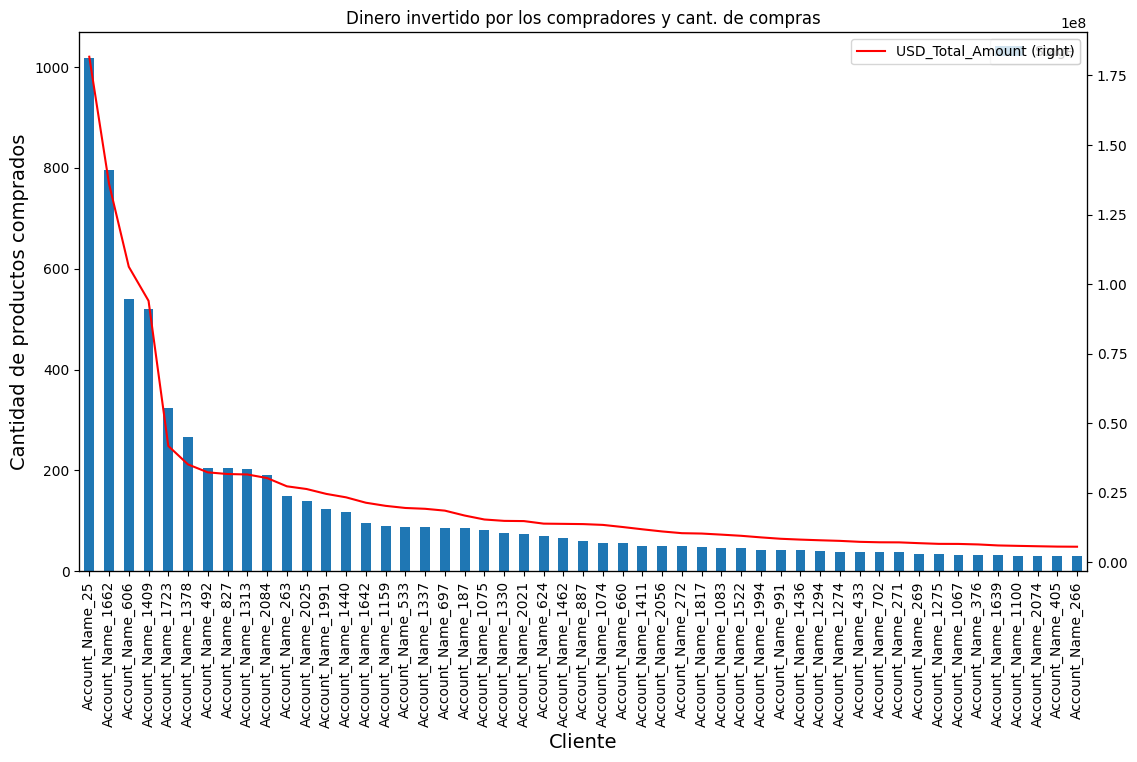

In [ ]:
#Observamos la relacion con un grafico

fig, ax = plt.subplots()
ax2 = ax.twinx()

frecuentes_cant.plot(ax=ax,kind="bar",figsize=(13,7))
frecuentes_precio.plot(ax=ax2, style='r-', secondary_y=True,figsize=(13,7))
ax.set_title("Dinero invertido por los compradores y cant. de compras")
ax.set_xlabel("Cliente", fontsize=14)
ax.set_ylabel("Cantidad de productos comprados", fontsize=14)



Como podriamos haber esperado, existe una relacion directamente proporcional entre el dinero invertido por los clientes en la empresa y la cantidad de productos que compraron. Es decir, los que compraron mas, gastaron mas, así como los que compraron menos gastaron menos.

# **Analisis de aprobación**

In [ ]:
df_by_opportunity = df_frio_frio.groupby(['Opportunity_ID']).agg({'Pricing, Delivery_Terms_Quote_Appr': 'sum'})
df_by_opportunity['Needs approval'] = np.where(df_by_opportunity['Pricing, Delivery_Terms_Quote_Appr']==0, \
                                               'No necesita aprobación', 'Necesita aprobación')
count_approval = df_by_opportunity.groupby('Needs approval').count().reset_index()
count_approval

,Needs approval,"Pricing, Delivery_Terms_Quote_Appr"
0,Necesita aprobación,7514
1,No necesita aprobación,2327


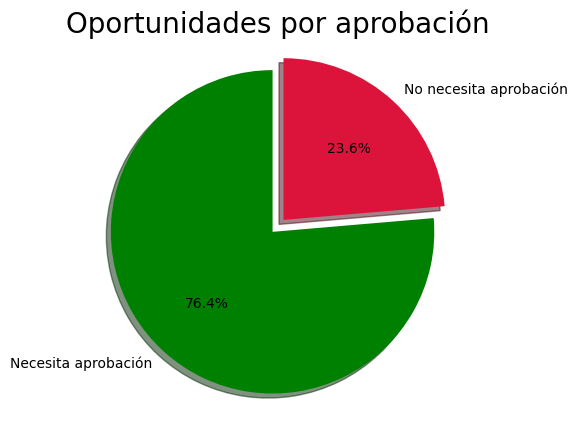

In [ ]:
colors = ['green','crimson']
plt.pie(count_approval['Pricing, Delivery_Terms_Quote_Appr'], labels=count_approval['Needs approval'],\
        autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.05,0.05], startangle=90)
plt.title('Oportunidades por aprobación', size=20)
plt.axis('equal')
plt.show()


In [ ]:
no_necesitan_aprobacion = df_frio_frio[df_frio_frio['Pricing, Delivery_Terms_Quote_Appr'] == 0]
no_need_by_opportunity = no_necesitan_aprobacion[['Opportunity_ID','Region', 'Stage']].drop_duplicates()
won_lost_by_no_need = no_need_by_opportunity.groupby('Stage').agg({'Opportunity_ID': 'count'}).reset_index().head(2)
won_lost_by_no_need

,Stage,Opportunity_ID
0,Closed Lost,880
1,Closed Won,1447


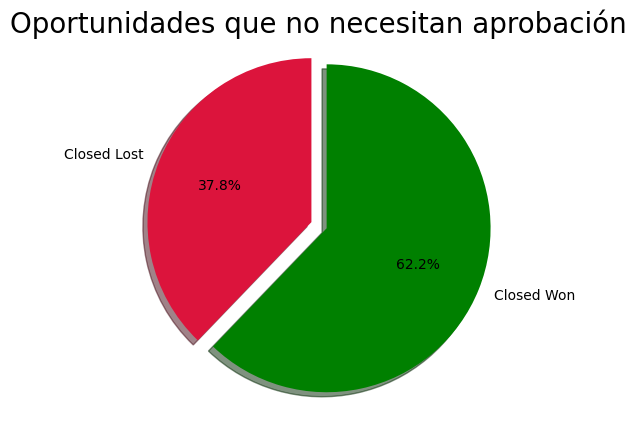

In [ ]:
colors = ['crimson','green']
plt.pie(won_lost_by_no_need['Opportunity_ID'], labels=won_lost_by_no_need['Stage'],\
        autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.05,0.05], startangle=90)
plt.title('Oportunidades que no necesitan aprobación', size=20)
plt.axis('equal')
plt.show()

In [ ]:
necesitan_aprobacion = df_frio_frio[df_frio_frio['Pricing, Delivery_Terms_Quote_Appr'] == 1]
need_by_opportunity = necesitan_aprobacion[['Opportunity_ID', 'Pricing, Delivery_Terms_Approved', 'Region','Stage']].drop_duplicates()
won_lost_by_need = need_by_opportunity.groupby(['Stage'])\
.agg({'Opportunity_ID': 'count'}).reset_index()
won_lost_by_need = won_lost_by_need[(won_lost_by_need['Stage'] == 'Closed Won') | (won_lost_by_need['Stage'] == 'Closed Lost')]
won_lost_by_need

,Stage,Opportunity_ID
0,Closed Lost,3839
1,Closed Won,3625


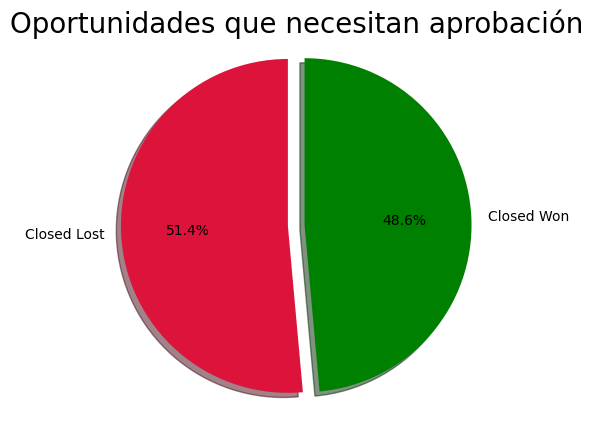

In [ ]:
colors = ['crimson','green']
plt.pie(won_lost_by_need['Opportunity_ID'], labels=won_lost_by_need['Stage'],\
        autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.05,0.05], startangle=90)
plt.title('Oportunidades que necesitan aprobación', size=20)
plt.axis('equal')
plt.show()

In [ ]:
won_lost_by_approval = need_by_opportunity.groupby(['Pricing, Delivery_Terms_Approved','Stage'])\
.agg({'Opportunity_ID': 'count'}).reset_index()
won_lost_by_approval = won_lost_by_approval[won_lost_by_approval['Opportunity_ID']>30]
won_lost_by_approval

,"Pricing, Delivery_Terms_Approved",Stage,Opportunity_ID
0,0,Closed Lost,1521
1,0,Closed Won,559
5,1,Closed Lost,2318
6,1,Closed Won,3066


In [ ]:
won_lost_by_approval_by_region = need_by_opportunity.groupby(['Region','Pricing, Delivery_Terms_Approved','Stage'])\
.agg({'Opportunity_ID': 'count'}).reset_index()
won_lost_by_approval_by_region = won_lost_by_approval_by_region[((won_lost_by_approval_by_region['Stage'] == 'Closed Won') | (won_lost_by_approval_by_region['Stage'] == 'Closed Lost'))]

In [ ]:
won_by_approval_by_region = won_lost_by_approval_by_region[won_lost_by_approval_by_region['Stage'] == 'Closed Won']\
.rename(columns={'Opportunity_ID': 'Won'})
won_by_approval_by_region

,Region,"Pricing, Delivery_Terms_Approved",Stage,Won
1,APAC,0,Closed Won,118
6,APAC,1,Closed Won,614
11,Americas,0,Closed Won,171
16,Americas,1,Closed Won,484
21,EMEA,0,Closed Won,212
26,EMEA,1,Closed Won,837
31,Japan,0,Closed Won,53
36,Japan,1,Closed Won,1103
41,Middle East,0,Closed Won,5
46,Middle East,1,Closed Won,28


In [ ]:
lost_by_approval_by_region = won_lost_by_approval_by_region[won_lost_by_approval_by_region['Stage'] == 'Closed Lost']\
.rename(columns={'Opportunity_ID': 'Lost'})
lost_by_approval_by_region

,Region,"Pricing, Delivery_Terms_Approved",Stage,Lost
0,APAC,0,Closed Lost,305
5,APAC,1,Closed Lost,362
10,Americas,0,Closed Lost,448
15,Americas,1,Closed Lost,649
20,EMEA,0,Closed Lost,365
25,EMEA,1,Closed Lost,1044
30,Japan,0,Closed Lost,384
35,Japan,1,Closed Lost,177
40,Middle East,0,Closed Lost,19
45,Middle East,1,Closed Lost,86


In [ ]:
percentage_by_approval_by_region = pd.merge(won_by_approval_by_region, lost_by_approval_by_region,\
         on=['Region', 'Pricing, Delivery_Terms_Approved'], how='right')
percentage_by_approval_by_region['Percentage'] = percentage_by_approval_by_region['Won']/\
(percentage_by_approval_by_region['Won'] + percentage_by_approval_by_region['Lost'])*100

In [ ]:
percentage_by_approval_by_region = percentage_by_approval_by_region.pivot(index='Region', values='Percentage', columns='Pricing, Delivery_Terms_Approved')
percentage_by_approval_by_region = percentage_by_approval_by_region.rename(columns={0: 'Desaprobado', 1: 'Aprobado'})
percentage_by_approval_by_region

"Pricing, Delivery_Terms_Approved",Desaprobado,Aprobado
Region,,
APAC,27.895981,62.909836
Americas,27.625202,42.718447
EMEA,36.741768,44.497608
Japan,12.128146,86.171875
Middle East,20.833333,24.561404


Text(0.5, 1.0, 'Porcentaje de Ganancia por Aprobación por Region\n')

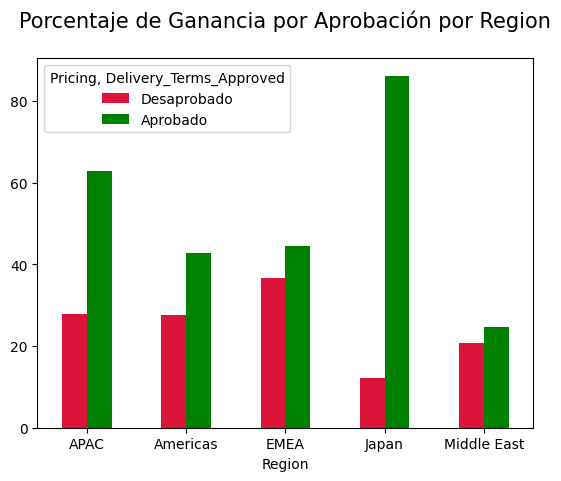

In [ ]:
ax = percentage_by_approval_by_region.plot.bar(rot=0, color=('crimson','green'))
ax.set_title('Porcentaje de Ganancia por Aprobación por Region\n', size=15)

In [ ]:
no_need_by_opportunity_by_region = no_need_by_opportunity.groupby(['Region','Stage']).count().reset_index()
no_need_by_opportunity_by_region = no_need_by_opportunity_by_region[(no_need_by_opportunity_by_region['Stage'] == 'Closed Won') | (no_need_by_opportunity_by_region['Stage'] == 'Closed Lost')]
no_need_by_opportunity_by_region = no_need_by_opportunity_by_region.pivot(index='Region', columns='Stage', values='Opportunity_ID')
no_need_by_opportunity_by_region.columns = no_need_by_opportunity_by_region.columns.add_categories(['Percentage'])

In [ ]:
no_need_by_opportunity_by_region['Percentage'] = no_need_by_opportunity_by_region['Closed Won']/\
(no_need_by_opportunity_by_region['Closed Won'] + no_need_by_opportunity_by_region['Closed Lost'])*100
no_need_by_opportunity_by_region

Stage,Closed Lost,Closed Won,Percentage
Region,,,
APAC,257.0,423.0,62.205882
Americas,261.0,439.0,62.714286
EMEA,328.0,451.0,57.894737
Japan,34.0,134.0,79.761905
Middle East,NaN,NaN,NaN


Text(0.5, 1.0, 'Porcentaje de Ganancia por Region\n')

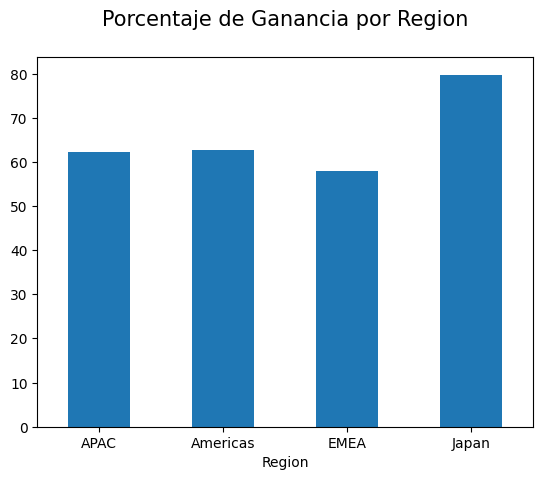

In [ ]:
no_need_by_opportunity_by_region = no_need_by_opportunity_by_region.head(4)

ax = no_need_by_opportunity_by_region[['Percentage']].plot.bar(rot=0, legend=None)
ax.set_title('Porcentaje de Ganancia por Region\n', size=15)

In [ ]:
approval_by_need = need_by_opportunity.groupby(['Pricing, Delivery_Terms_Approved'])\
.agg({'Opportunity_ID': 'count'}).reset_index()
approval_by_need = approval_by_need[approval_by_need['Opportunity_ID']>30]
approval_by_need

,"Pricing, Delivery_Terms_Approved",Opportunity_ID
0,0,2098
1,1,5416


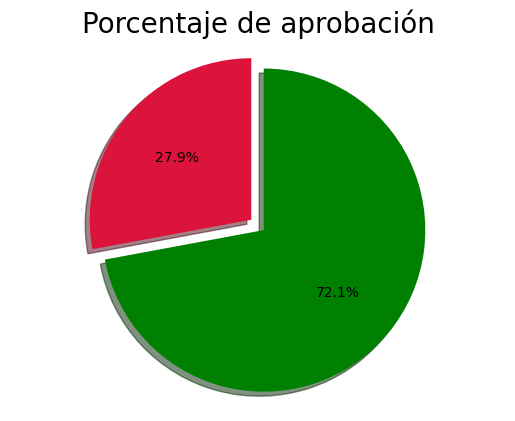

In [ ]:
colors = ['crimson','green']
plt.pie(approval_by_need['Opportunity_ID'],\
        autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.05,0.05], startangle=90)
plt.title('Porcentaje de aprobación', size=20)
plt.axis('equal')
plt.show()

In [ ]:
precio_by_oportunidad = df_frio_frio.groupby('Opportunity_ID').agg({'Total_Amount': 'sum'}).reset_index()
df_with_opportunity = df_frio_frio[['Opportunity_ID','Opportunity_Owner', 'Region','Stage']]
df_opportunity = pd.merge(precio_by_oportunidad, df_with_opportunity, on='Opportunity_ID').drop_duplicates()

price_by_approval = pd.merge(df_opportunity,df_by_opportunity, on='Opportunity_ID')
price_by_approval[['Opportunity_ID', 'Total_Amount', 'Region', 'Needs approval', 'Stage']]

,Opportunity_ID,Total_Amount,Region,Needs approval,Stage
0,0,5272800.00,EMEA,Necesita aprobación,Closed Lost
1,1,48230.00,EMEA,No necesita aprobación,Closed Won
2,2,83865.60,Americas,No necesita aprobación,Closed Won
3,3,7421881.50,Americas,Necesita aprobación,Closed Lost
4,4,13357192.50,Americas,Necesita aprobación,Closed Lost
...,...,...,...,...,...
9836,12799,401700.00,EMEA,Necesita aprobación,Closed Won
9837,12800,21332500.00,Americas,Necesita aprobación,Closed Lost
9838,12801,299715.00,EMEA,Necesita aprobación,Closed Won
9839,12802,2346796.88,Americas,Necesita aprobación,Closed Lost


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



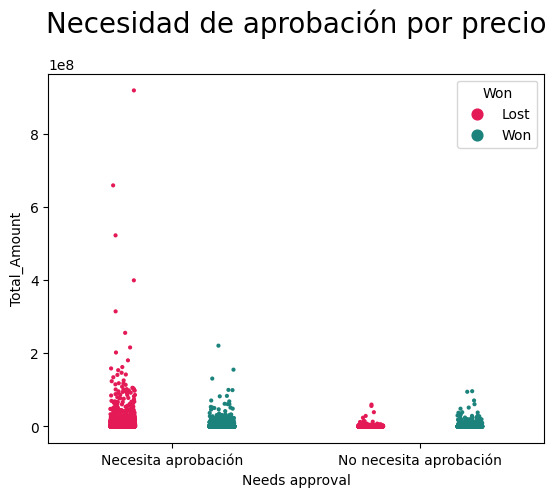

In [ ]:
price_by_approval_won_lost = price_by_approval[((price_by_approval['Stage'] == 'Closed Won') | (price_by_approval['Stage'] == 'Closed Lost'))]
price_by_approval_won_lost['Won'] = np.where(price_by_approval_won_lost['Stage'] == 'Closed Won', 'Won','Lost')

ax2 = sns.stripplot(x='Needs approval',
                    y='Total_Amount',
                    hue='Won',
                    data=price_by_approval_won_lost, 
                    dodge=True, 
                    palette=sns.husl_palette(2, l=0.5, s=.95), 
                    size=3).set_title("Necesidad de aprobación por precio\n", size=20)

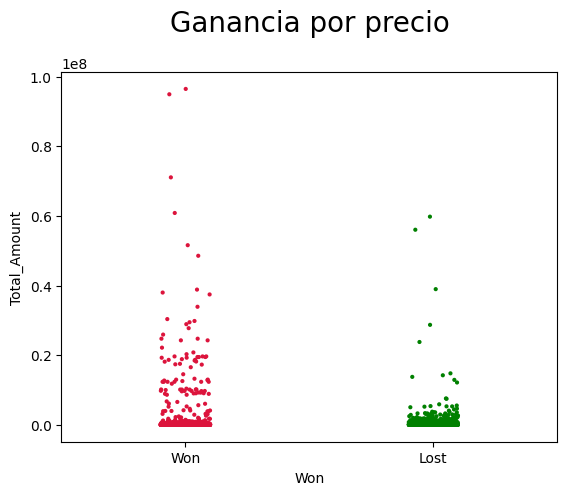

In [ ]:
no_need_price_by_approval_won_lost = price_by_approval_won_lost[price_by_approval_won_lost['Needs approval'] == 'No necesita aprobación']

ax2 = sns.stripplot(x='Won',
                    y='Total_Amount',
                    data=no_need_price_by_approval_won_lost, 
                    dodge=True, 
                    palette={'crimson', 'g'}, 
                    size=3).set_title("Ganancia por precio\n", size=20)


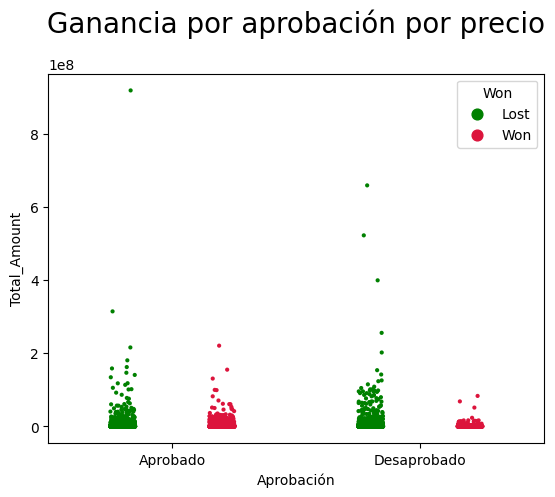

In [ ]:
need_price_by_approval_won_lost = price_by_approval_won_lost[price_by_approval_won_lost['Needs approval'] == 'Necesita aprobación']
need_price_by_approval_won_lost = pd.merge(need_price_by_approval_won_lost, need_by_opportunity[['Opportunity_ID', 'Pricing, Delivery_Terms_Approved']], on='Opportunity_ID')
need_price_by_approval_won_lost['Aprobación'] = np.where(need_price_by_approval_won_lost['Pricing, Delivery_Terms_Approved'] == 1, 'Aprobado', 'Desaprobado')

ax2 = sns.stripplot(x='Aprobación',
                    y='Total_Amount',
                    hue='Won',
                    data=need_price_by_approval_won_lost, 
                    dodge=True, 
                    palette={'crimson', 'green'}, 
                    size=3).set_title("Ganancia por aprobación por precio\n", size=20)